In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [3]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)


v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)

In [4]:
df['Abstraction'] = w['Usage']
df['D4N0834'] = w[' D4N0834']
df['D4N0130'] = w[' D4N0130']
df['2525DD00044'] = w[' 2525DD00044']
df['D4N0687'] = w[' D4N0687']
df['D4N0832'] = w[' D4N0832']
df['D4N0835'] = w[' D4N0835']

In [5]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  D4N0834  D4N0130  \
year_month                                                            
1950-01-01                NaN                 NaN      NaN      NaN   
1950-02-01                NaN                 NaN      NaN      NaN   
1950-03-01                NaN                 NaN      NaN      NaN   
1950-04-01                NaN                 NaN      NaN      NaN   
1950-05-01                NaN                 NaN      NaN      NaN   
...                       ...                 ...      ...      ...   
2019-08-01                NaN                 NaN      NaN      NaN   
2019-09-01                NaN                 NaN      NaN      NaN   
2019-10-01                NaN                 NaN      NaN      NaN   
2019-11-01                NaN                 NaN      NaN      NaN   
2019-12-01                NaN                 NaN      NaN      NaN   

            2525DD00044  D4N0687  D4N0832  D4N0835  
year_month                                          
1950-01-01          NaN      NaN      NaN      NaN  
1950-02-01          NaN      NaN      NaN      NaN  
1950-03-01          NaN      NaN      NaN      NaN  
1950-04-01          NaN      NaN      NaN      NaN  
1950-05-01          NaN      NaN      NaN      NaN  
...                 ...      ...      ...      ...  
2019-08-0

In [6]:
df = df[['D4N0834', 'D4N0832' ,'D4N0835' ,'D4N0687','D4N0130','2525DD00044' ,'Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [7]:
df

D4N0834  D4N0832  D4N0835  D4N0687  D4N0130  2525DD00044  \
year_month                                                             
1950-01-01      NaN      NaN      NaN      NaN      NaN          NaN   
1950-02-01      NaN      NaN      NaN      NaN      NaN          NaN   
1950-03-01      NaN      NaN      NaN      NaN      NaN          NaN   
1950-04-01      NaN      NaN      NaN      NaN      NaN          NaN   
1950-05-01      NaN      NaN      NaN      NaN      NaN          NaN   
...             ...      ...      ...      ...      ...          ...   
2019-08-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-09-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-10-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-11-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-12-01      NaN      NaN      NaN      NaN      NaN          NaN   

            Temperature  precip_trend  Discharge  Abstraction  
year_month                                                     
1950-01-01        23.90           NaN        NaN          NaN  
1950-02-01        25.10           NaN        NaN          NaN  
1950-03-01        23.75           NaN        NaN          NaN  
1950-04-01        19.65           NaN        NaN          NaN  
1950-05-01        14.60           NaN        NaN          NaN  
...                 ...           ...        ...          ...  
2019-08-01          NaN           NaN        NaN          NaN  
2019-09-01          NaN           NaN        NaN          NaN  
2019-10-01          NaN           NaN        NaN          NaN  
2019-11-01          NaN           NaN        NaN          NaN  
2019-12-01          NaN           NaN        NaN          NaN  

[840 rows x 10 columns]

In [8]:
f = lambda x: -x; 
gwls = df[['D4N0834', 'D4N0832' ,'D4N0835' ,'D4N0687','D4N0130','2525DD00044']].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [9]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0834    D4N0832    D4N0835    D4N0687    D4N0130 2525DD00044
0 1986-09-01 1986-09-01 1986-09-01 1985-03-01 1976-04-01  1975-08-01
1 2005-01-01 2004-03-01 2005-01-01 2012-01-01 2002-12-01  2016-05-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [10]:

gwls = gwls[gwls.index > '1985-04-01']  
gwls = gwls[gwls.index < '2012-01-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

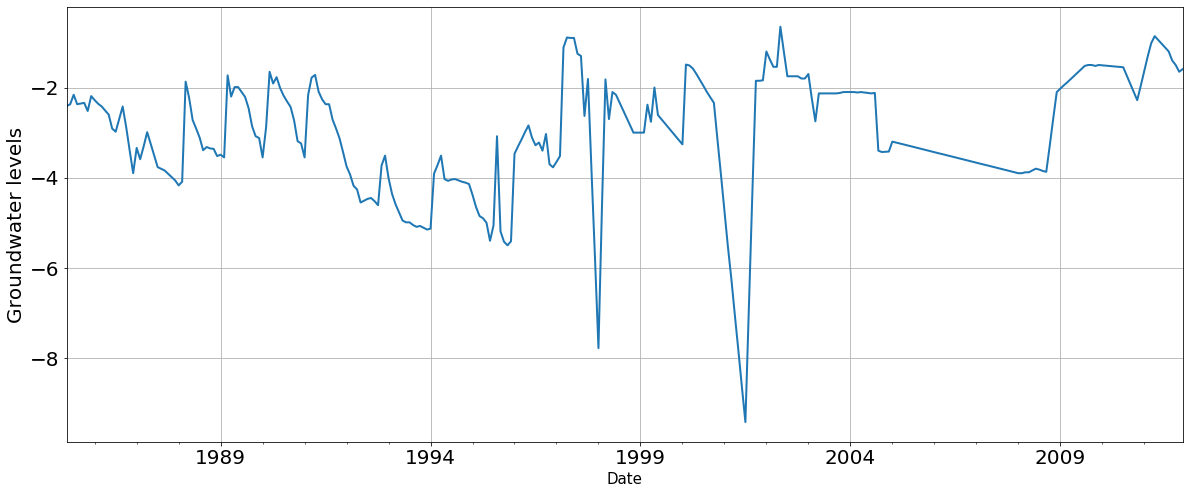

In [11]:
#visual illustration just to show all groundwater levels 

gwls['D4N0687'].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [12]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

D4N0834  D4N0832  D4N0835   D4N0687    D4N0130  2525DD00044  \
year_month                                                                
1985-05-01      NaN      NaN      NaN -2.410000 -13.850000    -4.920000   
1985-06-01      NaN      NaN      NaN -2.370000 -13.830000    -5.020000   
1985-07-01      NaN      NaN      NaN -2.160000 -13.790000    -5.150000   
1985-08-01      NaN      NaN      NaN -2.370000 -13.815000    -5.730000   
1985-09-01      NaN      NaN      NaN -2.354754 -13.881066    -5.803689   
...             ...      ...      ...       ...        ...          ...   
2011-08-01      NaN      NaN      NaN -1.200000        NaN   -13.420000   
2011-09-01      NaN      NaN      NaN -1.400000        NaN   -12.910000   
2011-10-01      NaN      NaN      NaN -1.500000        NaN   -13.290000   
2011-11-01      NaN      NaN      NaN -1.650000        NaN   -13.054130   
2011-12-01      NaN      NaN      NaN -1.590984        NaN   -12.825870   

            Temperature  precip_trend  Discharge   Abstraction  
year_month                                                      
1985-05-01        15.90     31.891667        NaN  9.076117e+05  
1985-06-01        13.20     35.312500        NaN  9.076117e+05  
1985-07-01        12.55     36.491667        NaN  9.076117e+05  
1985-08-01        16.20     34.645833        NaN  9.076117e+05  
1985-09-01        19.85     34.679167        NaN  9.076117e+05  
...                 ...           ...        ...           ...  
2011-08-01        12.90     50.033333      0.667  2.424806e+06  
2011-09-01        18.05     49.000000      0.657  2.424806e+06  
2011-10-01        19.30     44.183333      0.644  2.424806e+06  
2011-11-01        21.50     38.333333      0.633  2.424806e+06  
2011-12-01        22.00     35.783333      0.629  2.424806e+06  

[320 rows x 10 columns]

### Reframing length of dataset based on bhid D4N0037 start and end dates 

In [13]:
pima = gwls.filter(['D4N0687', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])
#pima = pima[pima.index > '1976-05-01']  
pima = pima[pima.index < '2004-02-01'] 

In [14]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0687          0
Temperature      7
precip_trend     0
Discharge       42
Abstraction      0
dtype: int64

#### Interpolating independant varibales only 

In [15]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['precip_trend']= pima['precip_trend'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

#### Calculating start and end dates for new dataframa

In [16]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0687 Temperature precip_trend  Discharge Abstraction
0 1985-05-01  1985-05-01   1985-05-01 1985-05-01  1985-05-01
1 2004-01-01  2004-01-01   2004-01-01 2004-01-01  2004-01-01

### Mutual information stats

In [17]:
from sklearn.feature_selection import mutual_info_regression

In [18]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['D4N0687']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [19]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.064209
precip_trend    0.512151
Discharge       0.911182
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [20]:
precip037  = pima.filter(['D4N0687', 'precip_trend'])
discha037  = pima.filter(['D4N0687', 'Discharge'])
temp037    = pima.filter(['D4N0687', 'Temperature'])
abstr037   = pima.filter(['D4N0687', 'Abstraction'])

In [21]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip0037 = precip037.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip037[[ 'precip_trend']].shift(t) for t in lags for col in precip037})
# disharge
discha0037 = discha037.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha037[[ 'Discharge']].shift(t) for t in lags for col in discha037})
# temperature
temp0037 = temp037.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp037[[ 'Temperature']].shift(t) for t in lags for col in temp037})
# abstraction
abstr0037 = abstr037.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr037[[ 'Abstraction']].shift(t) for t in lags for col in abstr037})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

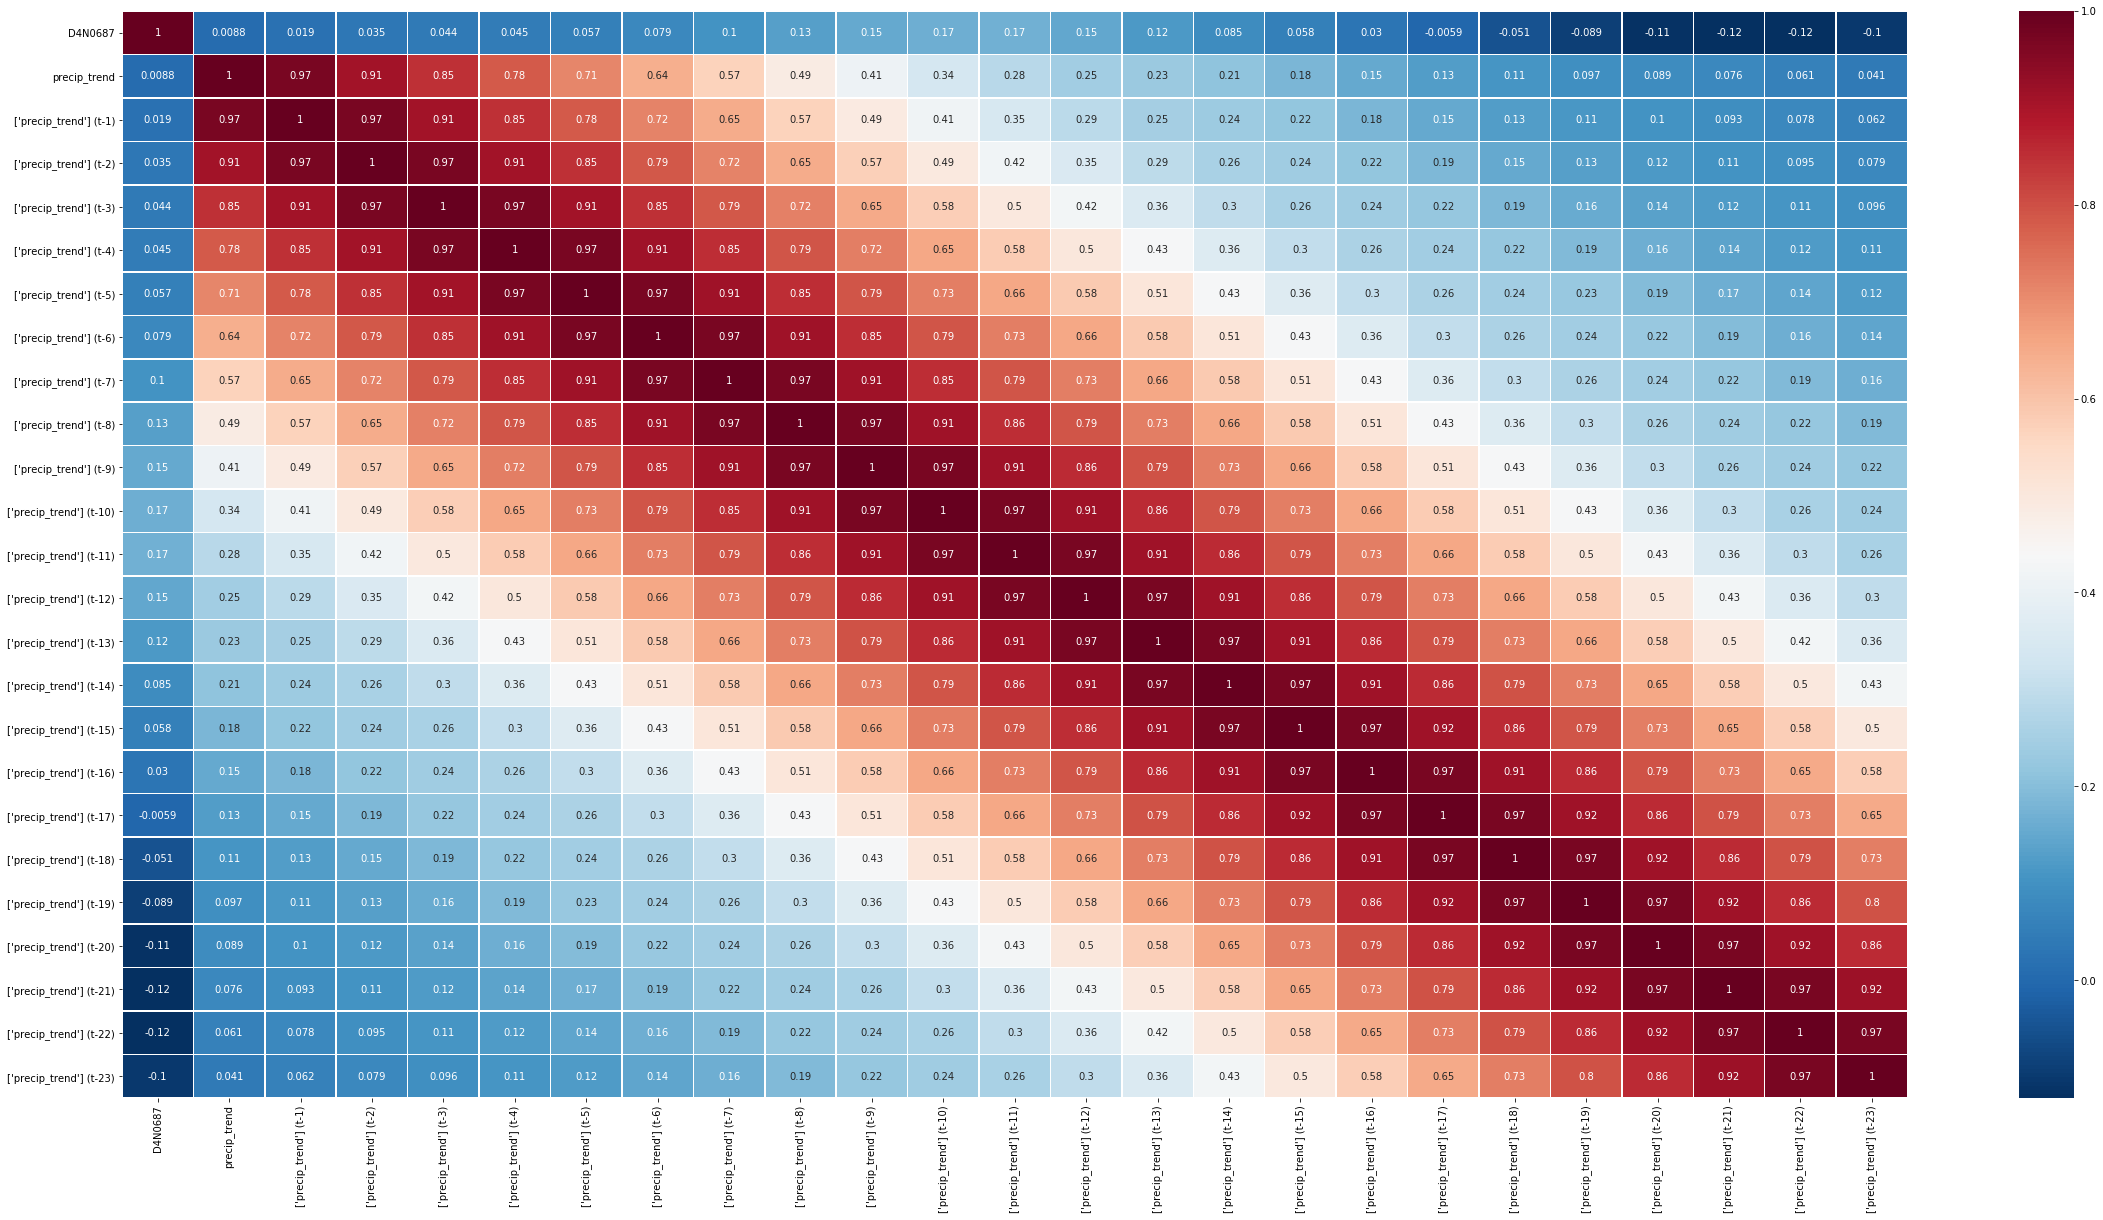

In [22]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip0037.corr(method = 'spearman')
corrm2 = precip0037.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Discharge

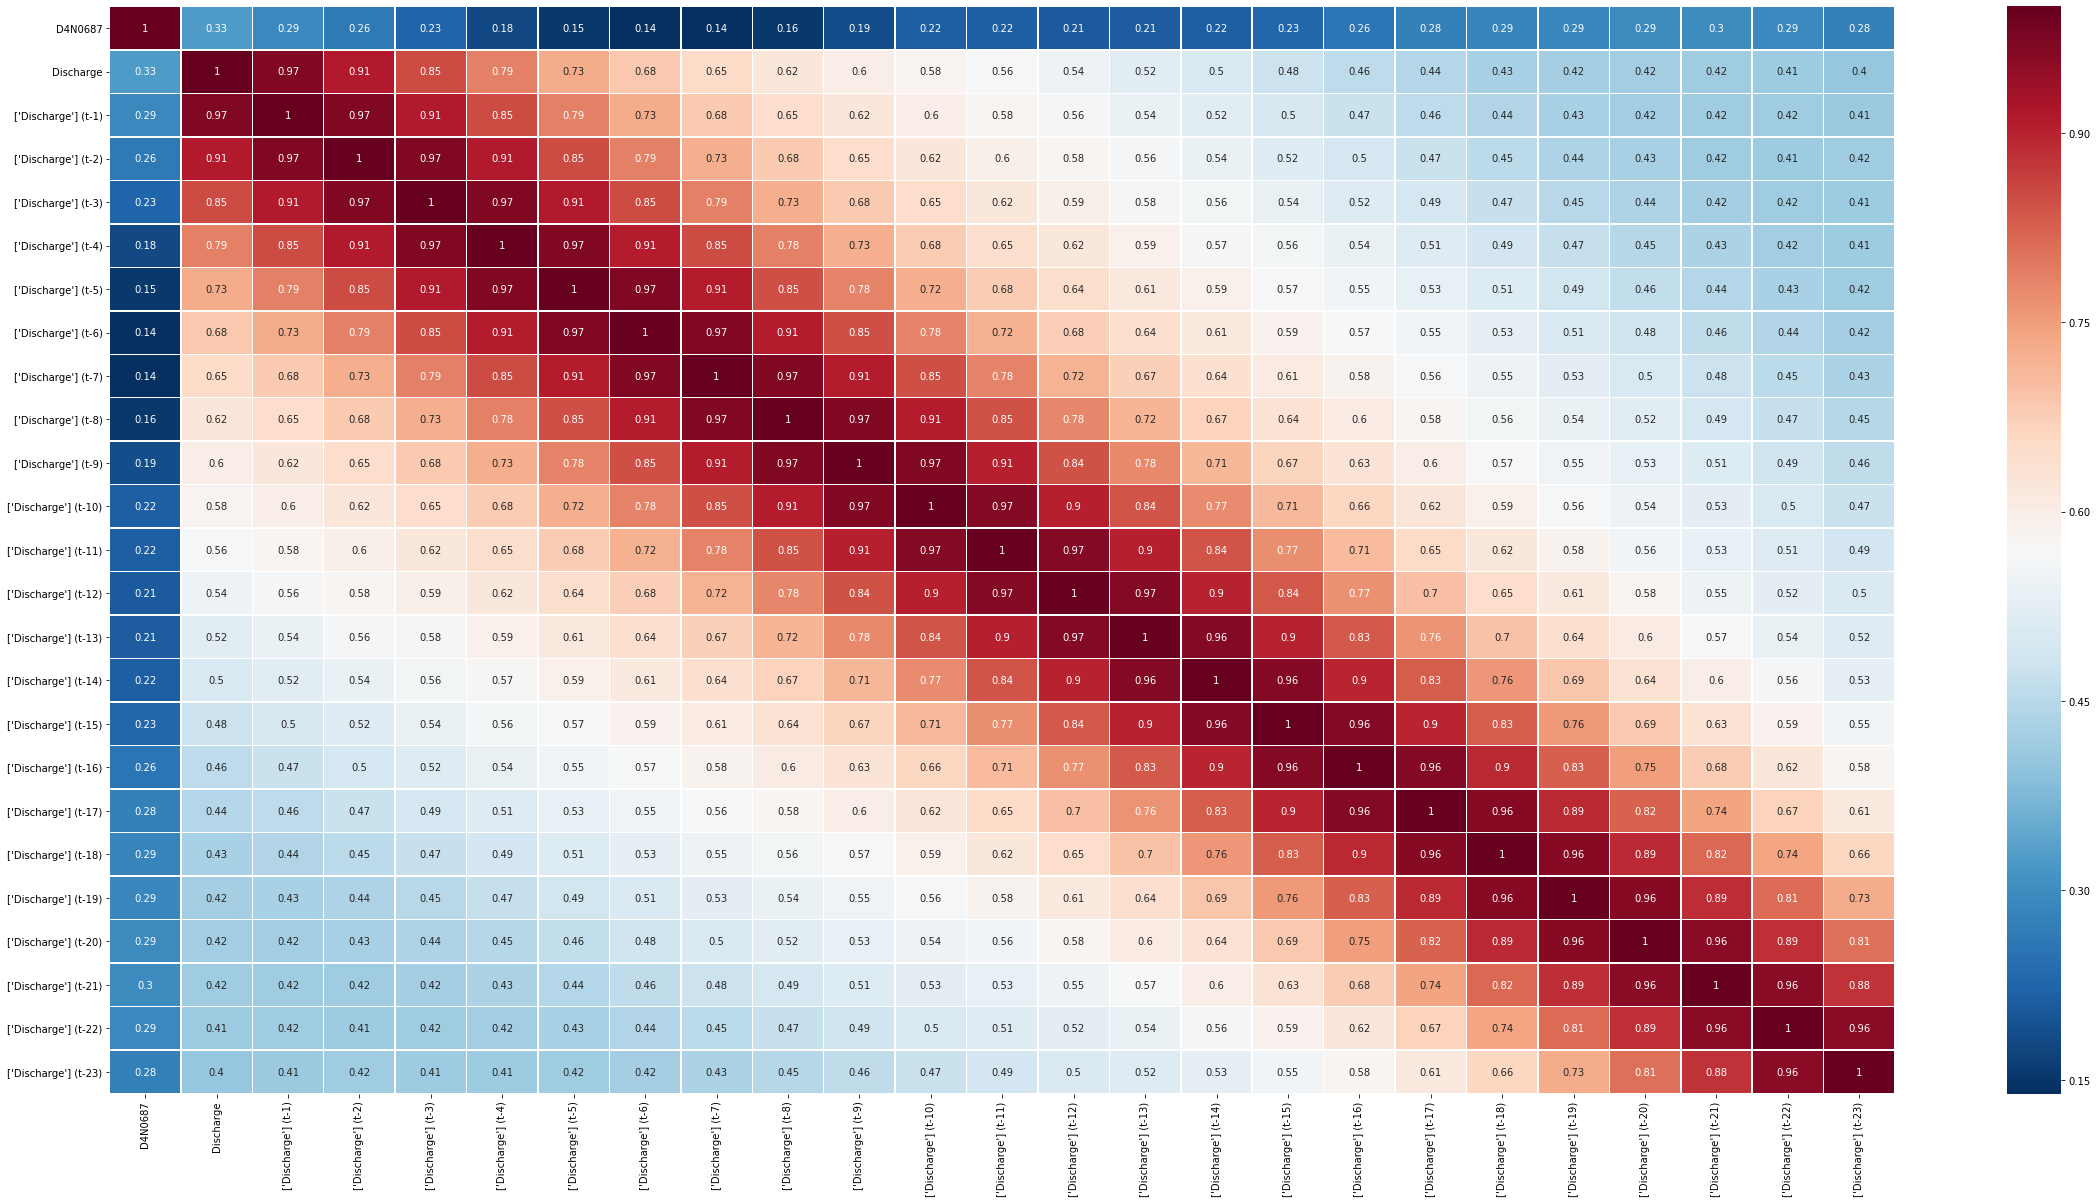

In [23]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = discha0037.corr(method = 'spearman')
corrm2 = discha0037.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

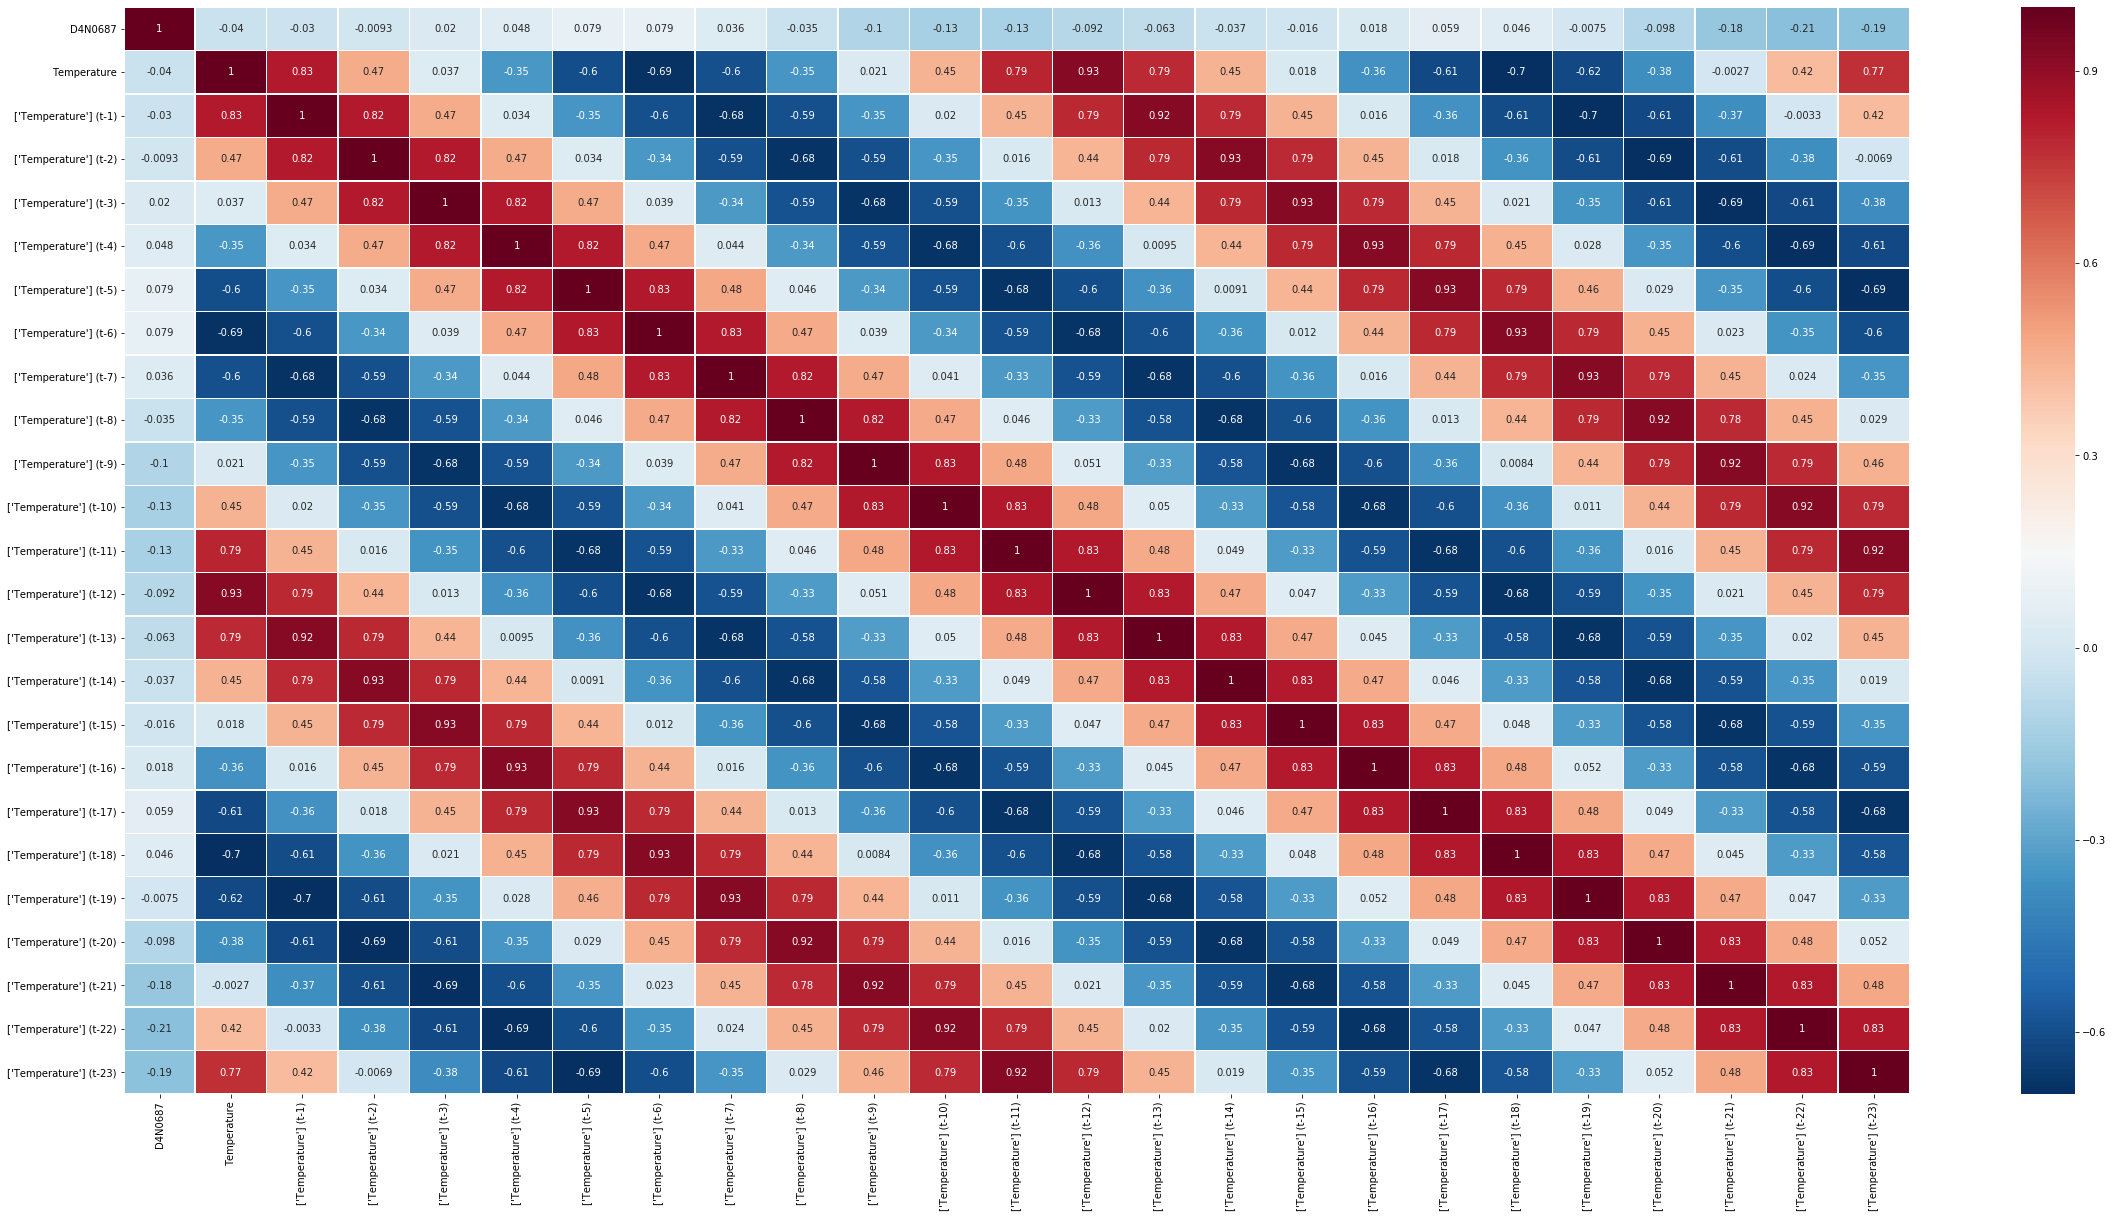

In [24]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp0037.corr(method = 'spearman')
corrm2 = temp0037.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [25]:
#pima=pima.drop(['Temperature (t-4)'], axis=1)
#pima=pima.drop(['precip_trend (t-3)'], axis=1)
#pima

In [26]:
pima['Temperature (t-3)'] = pima.Temperature.shift(0)
pima['precip_trend (t-3)'] = pima.precip_trend.shift(0)
#pima = pima['Discharge (t-6)'].drop(axis=1)
pima

D4N0687  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                 
1985-05-01 -2.410000        15.90     31.891667      0.233  9.076117e+05   
1985-06-01 -2.370000        13.20     35.312500      0.233  9.076117e+05   
1985-07-01 -2.160000        12.55     36.491667      0.233  9.076117e+05   
1985-08-01 -2.370000        16.20     34.645833      0.233  9.076117e+05   
1985-09-01 -2.354754        19.85     34.679167      0.233  9.076117e+05   
...              ...          ...           ...        ...           ...   
2003-09-01 -2.130000        18.70     50.304891      0.407  2.735368e+06   
2003-10-01 -2.120000        21.30     57.896558      0.410  2.735368e+06   
2003-11-01 -2.100000        21.80     58.746558      0.401  2.735368e+06   
2003-12-01 -2.100000        24.05     58.728261      0.393  2.735368e+06   
2004-01-01 -2.100000        23.00     58.521649      0.400  2.572182e+06   

            Temperature (t-3)  precip_trend (t-3)  
year_month                                         
1985-05-01              15.90           31.891667  
1985-06-01              13.20           35.312500  
1985-07-01              12.55           36.491667  
1985-08-01              16.20           34.645833  
1985-09-01              19.85           34.679167  
...                       ...                 ...  
2003-09-01              18.70           50.304891  
2003-10-01              21.30           57.896558  
2003-11-01              21.80           58.746558  
2003-12-01              24.05           58.728261  
2004-01-01              23.00           58.521649  

[225 rows x 7 columns]

In [30]:
X = pima[['Temperature (t-3)', 'precip_trend (t-3)', 'Discharge','Abstraction']] # Features
y = pima[['D4N0687']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [31]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [32]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-3)     0.069543
precip_trend (t-3)    0.516023
Discharge             0.917576
Abstraction           1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [34]:
rainfall = X['precip_trend (t-3)']
temperature = X['Temperature (t-3)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['D4N0687']

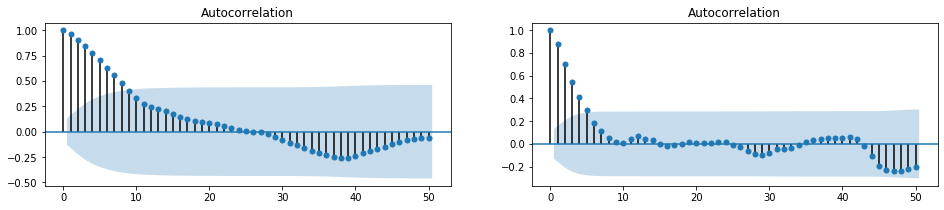

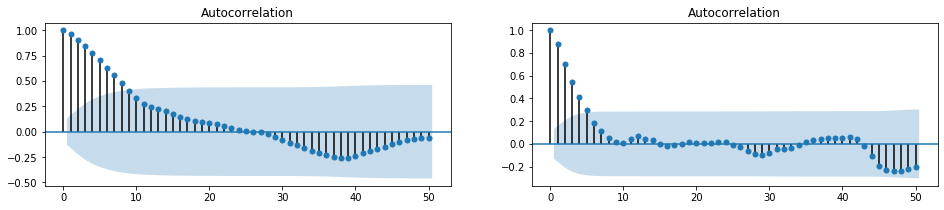

In [35]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

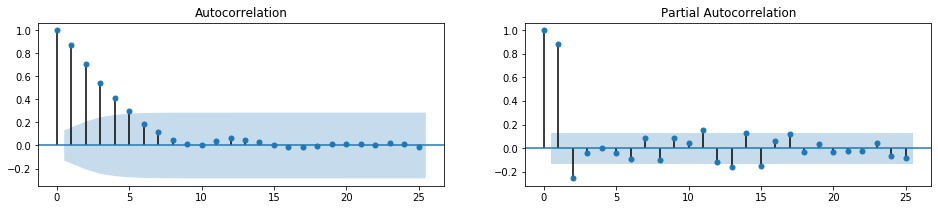

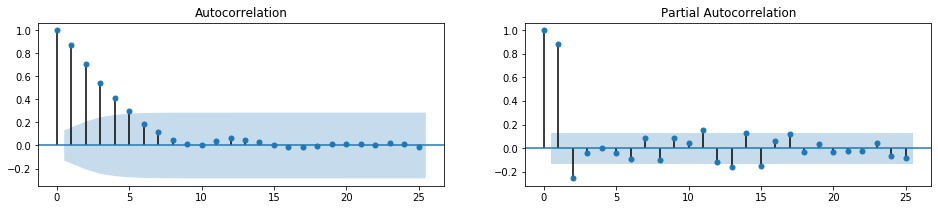

In [36]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

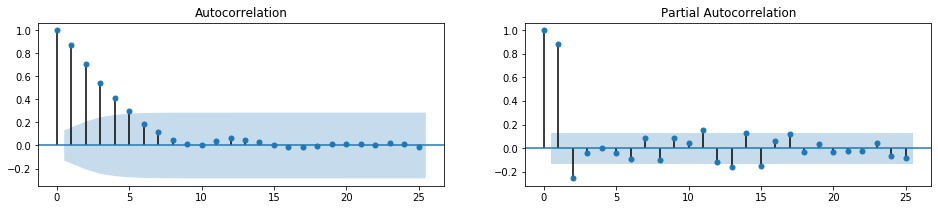

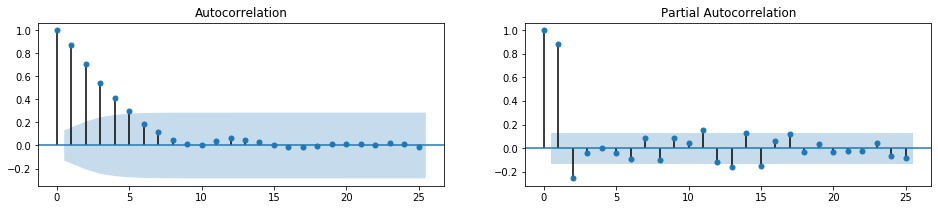

In [37]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

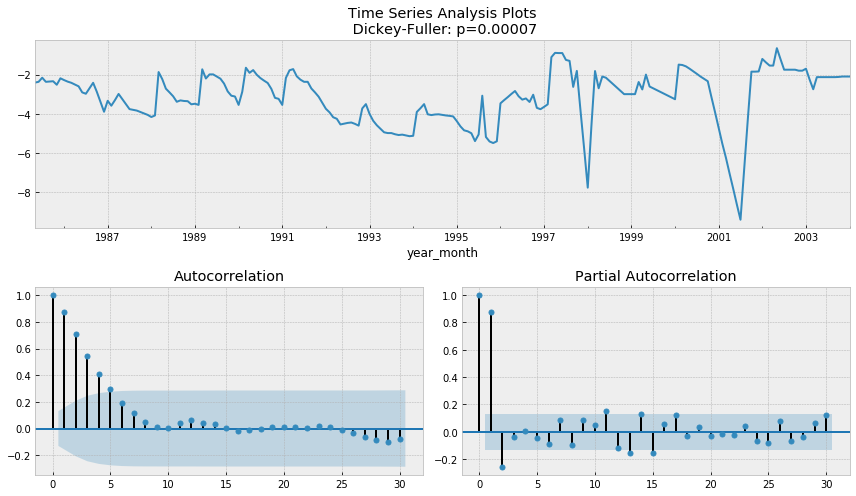

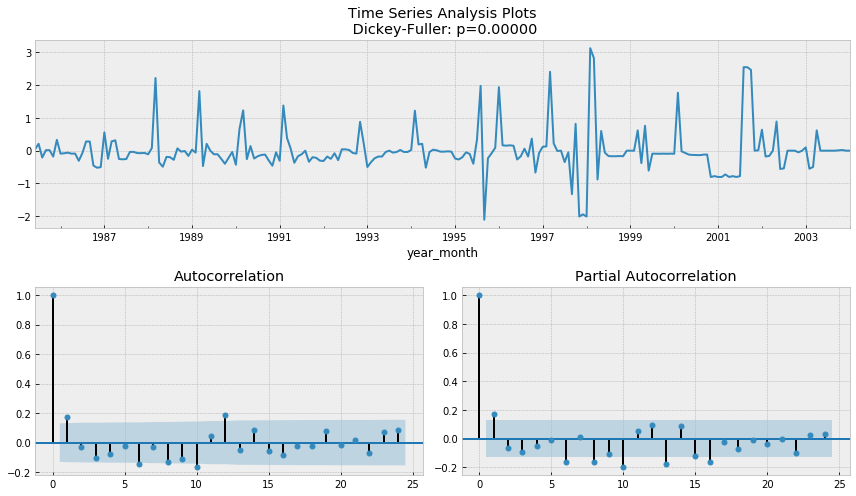

In [38]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0037_diff = bhid - bhid.shift(1)

tsplot(D4N0037_diff[1:], lags=24)

#### Rainfall

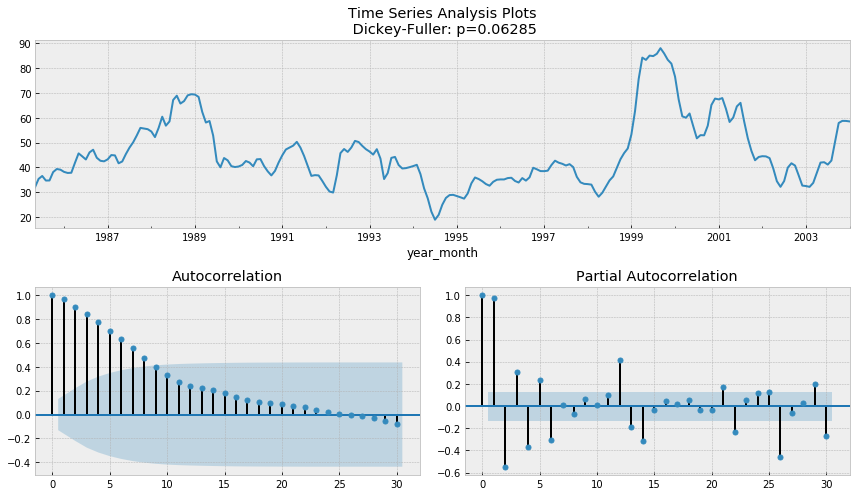

In [39]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

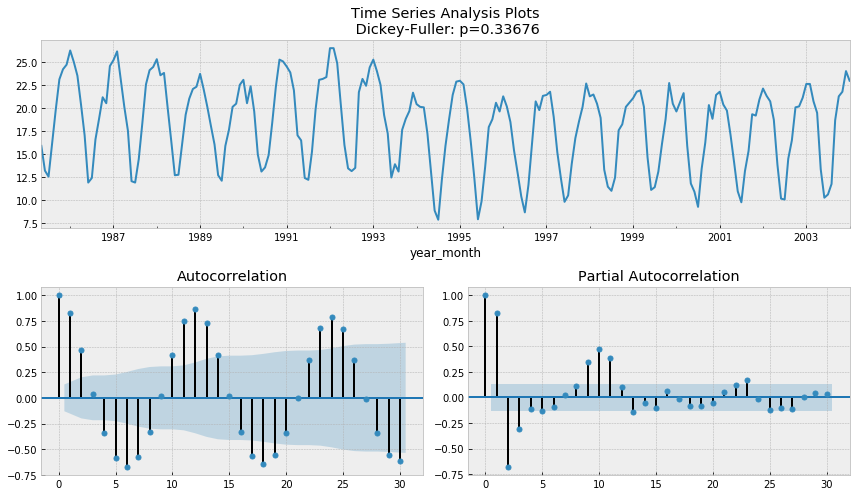

In [40]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)


#### Discharge

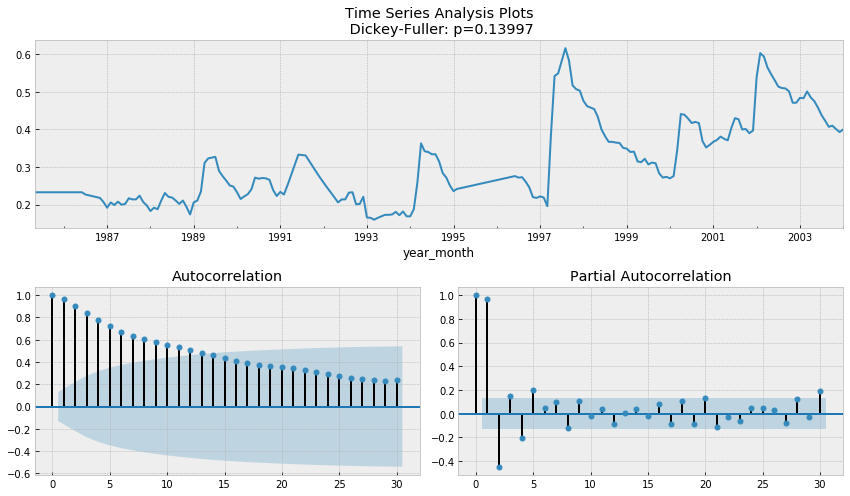

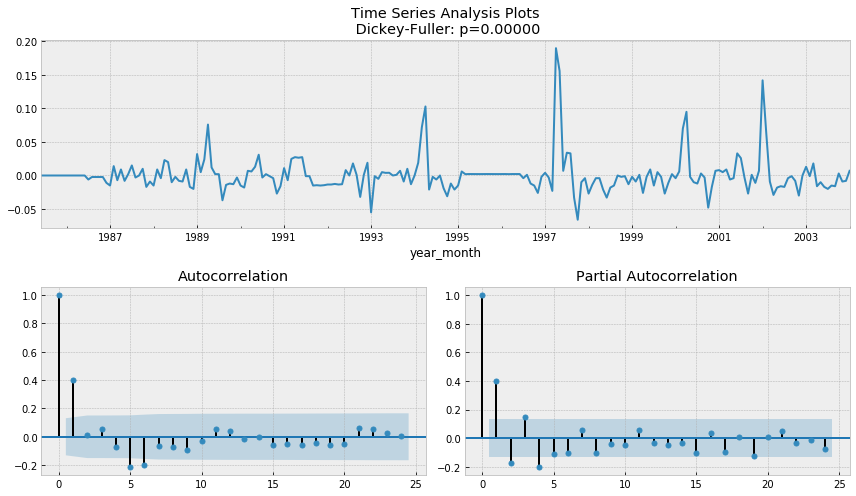

In [41]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

# Take the first difference to remove to make the process stationary
dis_diff = discharge - discharge.shift(1)

tsplot(dis_diff[1:], lags=24)

#### Usage

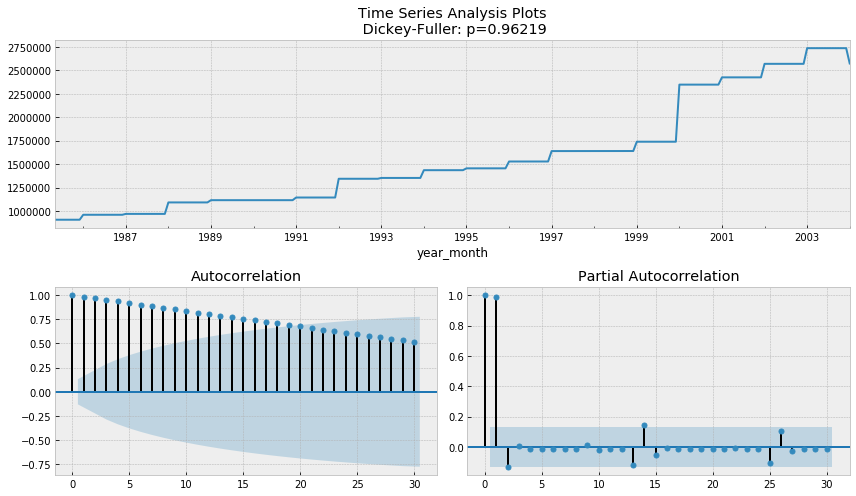

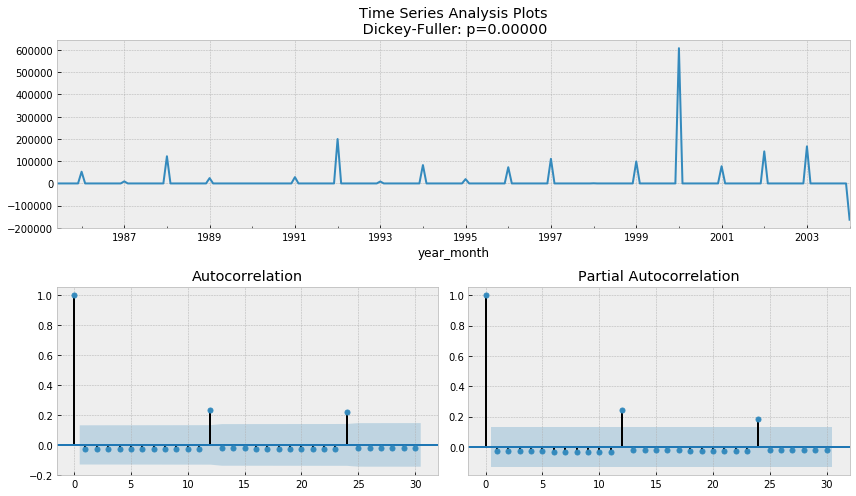

In [42]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [43]:
pima_diff = pd.DataFrame({'D4N0037': D4N0037_diff ,'Temperature': temperature,  'Rainfall': rainfall,  'Discharge': dis_diff, 'Abstraction': usage_diff}, columns=['D4N0037','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0037           1
Temperature       0
precip_trend    225
Discharge         1
Abstraction       1
dtype: int64

In [44]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

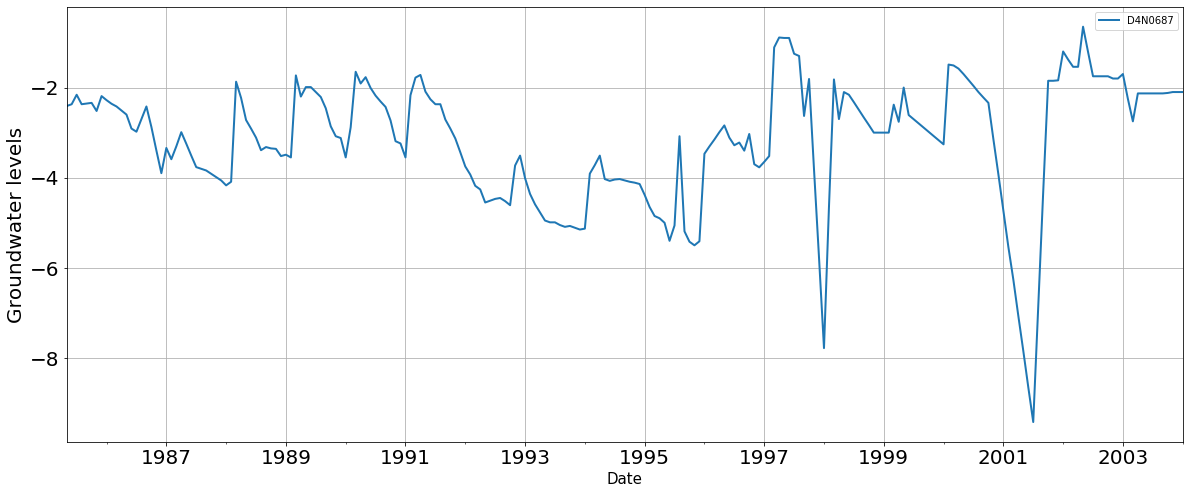

In [45]:
pima[['D4N0687']].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


### Model Parameters

In [46]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-3)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-3)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

In [47]:
pima

D4N0687  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                 
1985-05-01 -2.410000        15.90     31.891667      0.233  9.076117e+05   
1985-06-01 -2.370000        13.20     35.312500      0.233  9.076117e+05   
1985-07-01 -2.160000        12.55     36.491667      0.233  9.076117e+05   
1985-08-01 -2.370000        16.20     34.645833      0.233  9.076117e+05   
1985-09-01 -2.354754        19.85     34.679167      0.233  9.076117e+05   
...              ...          ...           ...        ...           ...   
2003-09-01 -2.130000        18.70     50.304891      0.407  2.735368e+06   
2003-10-01 -2.120000        21.30     57.896558      0.410  2.735368e+06   
2003-11-01 -2.100000        21.80     58.746558      0.401  2.735368e+06   
2003-12-01 -2.100000        24.05     58.728261      0.393  2.735368e+06   
2004-01-01 -2.100000        23.00     58.521649      0.400  2.572182e+06   

            Temperature (t-3)  precip_trend (t-3)  precip_trend_log  \
year_month                                                            
1985-05-01              15.90           31.891667          4.493219   
1985-06-01              13.20           35.312500          4.592162   
1985-07-01              12.55           36.491667          4.624119   
1985-08-01              16.20           34.645833          4.573632   
1985-09-01              19.85           34.679167          4.574567   
...                       ...                 ...               ...   
2003-09-01              18.70           50.304891          4.937786   
2003-10-01              21.30           57.896558          5.075783   
2003-11-01              21.80           58.746558          5.090112   
2003-12-01              24.05           58.728261          5.089805   
2004-01-01              23.00           58.521649          5.086340   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1985-05-01         3.827314       1.209450        14.718573  
1985-06-01         3.653242       1.209450        14.718573  
1985-07-01         3.606387       1.209450        14.718573  
1985-08-01         3.844909       1.209450        14.718573  
1985-09-01         4.037354       1.209450        14.718573  
...                     ...            ...              ...  
2003-09-01         3.980619       1.341460        15.821777  
2003-10-01         4.104587       1.343590        15.821777  
2003-11-01         4.126761       1.337186        15.821777  
2003-12-01         4.220874       1.331460        15.821777  
2004-01-01         4.178054       1.336472        15.760266  

[225 rows x 11 columns]

In [48]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima.D4N0687.shift(obs)
pima.fillna(0, inplace=True)

In [49]:
pima

D4N0687  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                 
1985-05-01 -2.410000        15.90     31.891667      0.233  9.076117e+05   
1985-06-01 -2.370000        13.20     35.312500      0.233  9.076117e+05   
1985-07-01 -2.160000        12.55     36.491667      0.233  9.076117e+05   
1985-08-01 -2.370000        16.20     34.645833      0.233  9.076117e+05   
1985-09-01 -2.354754        19.85     34.679167      0.233  9.076117e+05   
...              ...          ...           ...        ...           ...   
2003-09-01 -2.130000        18.70     50.304891      0.407  2.735368e+06   
2003-10-01 -2.120000        21.30     57.896558      0.410  2.735368e+06   
2003-11-01 -2.100000        21.80     58.746558      0.401  2.735368e+06   
2003-12-01 -2.100000        24.05     58.728261      0.393  2.735368e+06   
2004-01-01 -2.100000        23.00     58.521649      0.400  2.572182e+06   

            Temperature (t-3)  precip_trend (t-3)  precip_trend_log  \
year_month                                                            
1985-05-01              15.90           31.891667          4.493219   
1985-06-01              13.20           35.312500          4.592162   
1985-07-01              12.55           36.491667          4.624119   
1985-08-01              16.20           34.645833          4.573632   
1985-09-01              19.85           34.679167          4.574567   
...                       ...                 ...               ...   
2003-09-01              18.70           50.304891          4.937786   
2003-10-01              21.30           57.896558          5.075783   
2003-11-01              21.80           58.746558          5.090112   
2003-12-01              24.05           58.728261          5.089805   
2004-01-01              23.00           58.521649          5.086340   

            Temperature_log  Discharge_log  Abstraction_log   t_1   t_2   t_3  \
year_month                                                                      
1985-05-01         3.827314       1.209450        14.718573  0.00  0.00  0.00   
1985-06-01         3.653242       1.209450        14.718573 -2.41  0.00  0.00   
1985-07-01         3.606387       1.209450        14.718573 -2.37 -2.41  0.00   
1985-08-01         3.844909       1.209450        14.718573 -2.16 -2.37 -2.41   
1985-09-01         4.037354       1.209450        14.718573 -2.37 -2.16 -2.37   
...                     ...            ...              ...   ...   ...   ...   
2003-09-01         3.980619       1.341460        15.821777 -2.13 -2.13 -2.13   
2003-10-01         4.104587       1.343590        15.821777 -2.13 -2.13 -2.13   
2003-11-01         4.126761       1.337186        15.821777 -2.12 -2.13 -2.13   
2003-12-01         4.220874       1.331460        15.821777 -2.10 -2.12 -2.13   
2004-01-01         4.178054       1.336472        15.760266 -2.10 -2.10 -2.12   

             t_4  
year_month        
1985-05-01  0.00  
1985-06-01  0.00  
1985-07-01  0.00  
1985-08-01  0.00  
1985-09-01 -2.41  
...          ...  
2003-09-01 -2.13  
2003-10-01 -2.13  
2003-11-01 -2.13  
2003-12-01 -2.13  
2004-01-01 -2.13  

[225 rows x 15 columns]

In [50]:
pima.shape

(225, 15)

In [51]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0687']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [52]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['D4N0687']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.059364
precip_trend_log    0.294299
Discharge_log       0.573389
Abstraction_log     0.642836
t_1                 1.000000
t_2                 0.652149
dtype: float64

In [53]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['D4N0687'].values
y = y.reshape(-1,1)

In [54]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(188, 6) (188, 1)
(37, 6) (37, 1)


In [55]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

In [57]:
y_test[0]

array([-1.11517948])

### LSTM

In [60]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

In [61]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(37, 6)

    #running function
    gwl = -1.11517948
    test_forecast = X_test
    steps_ahead = 37
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(188, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 188 samples, validate on 37 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1000
 96/188 [==============>...............] - ETA: 2s - loss: 0.7354 - mean_squared_error: 0.7354
Epoch 00001: val_loss improved from inf to 2.64567, saving model to model.h5
188/188 [==============================] - 3s 15ms/sample - loss: 0.6163 - mean_squared_error: 0.6163 - val_loss: 2.6457 - val_mean_squared_error: 2.6457
Epoch 2/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.5702 - mean_squared_error: 0.5702
Epoch 00002: val_loss improved from 2.64567 to 2.56847, saving model to model.h5
188/188 [==============================] - 0s 394us/sample - loss: 0.5744 - mean_squared_error: 0.5744 - val_loss: 2.5685 - val_mean_squared_error: 2.5685
Epoch 3/1000
 96/188 [==============

188/188 [==============================] - 0s 328us/sample - loss: 0.3264 - mean_squared_error: 0.3264 - val_loss: 1.8409 - val_mean_squared_error: 1.8409
Epoch 23/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3944 - mean_squared_error: 0.3944
Epoch 00023: val_loss improved from 1.84094 to 1.81359, saving model to model.h5
188/188 [==============================] - 0s 319us/sample - loss: 0.3280 - mean_squared_error: 0.3280 - val_loss: 1.8136 - val_mean_squared_error: 1.8136
Epoch 24/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2180 - mean_squared_error: 0.2180
Epoch 00024: val_loss improved from 1.81359 to 1.78790, saving model to model.h5
188/188 [==============================] - 0s 266us/sample - loss: 0.3206 - mean_squared_error: 0.3206 - val_loss: 1.7879 - val_mean_squared_error: 1.7879
Epoch 25/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3673 - mean_squared_error: 0.3673
Epoch 00025: val_loss improved from 1.78790 to

 96/188 [==============>...............] - ETA: 0s - loss: 0.1800 - mean_squared_error: 0.1800
Epoch 00046: val_loss improved from 1.36057 to 1.34473, saving model to model.h5
188/188 [==============================] - 0s 231us/sample - loss: 0.2508 - mean_squared_error: 0.2508 - val_loss: 1.3447 - val_mean_squared_error: 1.3447
Epoch 47/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3400 - mean_squared_error: 0.3400
Epoch 00047: val_loss improved from 1.34473 to 1.32893, saving model to model.h5
188/188 [==============================] - 0s 226us/sample - loss: 0.2476 - mean_squared_error: 0.2476 - val_loss: 1.3289 - val_mean_squared_error: 1.3289
Epoch 48/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1977 - mean_squared_error: 0.1977
Epoch 00048: val_loss improved from 1.32893 to 1.31804, saving model to model.h5
188/188 [==============================] - 0s 208us/sample - loss: 0.2526 - mean_squared_error: 0.2526 - val_loss: 1.3180 - val_mean_s

Epoch 70/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2623 - mean_squared_error: 0.2623
Epoch 00070: val_loss improved from 1.10766 to 1.10138, saving model to model.h5
188/188 [==============================] - 0s 234us/sample - loss: 0.2315 - mean_squared_error: 0.2315 - val_loss: 1.1014 - val_mean_squared_error: 1.1014
Epoch 71/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2557 - mean_squared_error: 0.2557
Epoch 00071: val_loss improved from 1.10138 to 1.09252, saving model to model.h5
188/188 [==============================] - 0s 244us/sample - loss: 0.2215 - mean_squared_error: 0.2215 - val_loss: 1.0925 - val_mean_squared_error: 1.0925
Epoch 72/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1715 - mean_squared_error: 0.1715
Epoch 00072: val_loss improved from 1.09252 to 1.08524, saving model to model.h5
188/188 [==============================] - 0s 225us/sample - loss: 0.2172 - mean_squared_error: 0.2172 - val_loss: 1.085

Epoch 94/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1408 - mean_squared_error: 0.1408
Epoch 00094: val_loss did not improve from 0.93156
188/188 [==============================] - 0s 142us/sample - loss: 0.2012 - mean_squared_error: 0.2012 - val_loss: 0.9325 - val_mean_squared_error: 0.9325
Epoch 95/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1842 - mean_squared_error: 0.1842
Epoch 00095: val_loss improved from 0.93156 to 0.93032, saving model to model.h5
188/188 [==============================] - 0s 263us/sample - loss: 0.1966 - mean_squared_error: 0.1966 - val_loss: 0.9303 - val_mean_squared_error: 0.9303
Epoch 96/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1540 - mean_squared_error: 0.1540
Epoch 00096: val_loss improved from 0.93032 to 0.92642, saving model to model.h5
188/188 [==============================] - 0s 211us/sample - loss: 0.1942 - mean_squared_error: 0.1942 - val_loss: 0.9264 - val_mean_squared_error: 0.

 96/188 [==============>...............] - ETA: 0s - loss: 0.1373 - mean_squared_error: 0.1373
Epoch 00118: val_loss did not improve from 0.84549
188/188 [==============================] - 0s 118us/sample - loss: 0.1906 - mean_squared_error: 0.1906 - val_loss: 0.8455 - val_mean_squared_error: 0.8455
Epoch 119/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1732 - mean_squared_error: 0.1732
Epoch 00119: val_loss improved from 0.84549 to 0.83945, saving model to model.h5
188/188 [==============================] - 0s 219us/sample - loss: 0.1849 - mean_squared_error: 0.1849 - val_loss: 0.8394 - val_mean_squared_error: 0.8394
Epoch 120/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1480 - mean_squared_error: 0.1480
Epoch 00120: val_loss improved from 0.83945 to 0.83222, saving model to model.h5
188/188 [==============================] - 0s 215us/sample - loss: 0.1792 - mean_squared_error: 0.1792 - val_loss: 0.8322 - val_mean_squared_error: 0.8322
Epoch 1

 96/188 [==============>...............] - ETA: 0s - loss: 0.1438 - mean_squared_error: 0.1438
Epoch 00143: val_loss did not improve from 0.81997
188/188 [==============================] - 0s 128us/sample - loss: 0.1835 - mean_squared_error: 0.1835 - val_loss: 0.8245 - val_mean_squared_error: 0.8245
Epoch 144/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1290 - mean_squared_error: 0.1290
Epoch 00144: val_loss did not improve from 0.81997
188/188 [==============================] - 0s 148us/sample - loss: 0.1920 - mean_squared_error: 0.1920 - val_loss: 0.8287 - val_mean_squared_error: 0.8287
Epoch 145/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2084 - mean_squared_error: 0.2084
Epoch 00145: val_loss did not improve from 0.81997
188/188 [==============================] - 0s 239us/sample - loss: 0.1806 - mean_squared_error: 0.1806 - val_loss: 0.8285 - val_mean_squared_error: 0.8285
Epoch 146/1000
 96/188 [==============>...............] - ETA: 0s -

Epoch 169/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2214 - mean_squared_error: 0.2214
Epoch 00169: val_loss did not improve from 0.81997
188/188 [==============================] - 0s 207us/sample - loss: 0.1726 - mean_squared_error: 0.1726 - val_loss: 0.8615 - val_mean_squared_error: 0.8615
Epoch 170/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 00170: val_loss did not improve from 0.81997
188/188 [==============================] - 0s 153us/sample - loss: 0.1697 - mean_squared_error: 0.1697 - val_loss: 0.8587 - val_mean_squared_error: 0.8587
Epoch 171/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1793 - mean_squared_error: 0.1793
Epoch 00171: val_loss did not improve from 0.81997
188/188 [==============================] - 0s 142us/sample - loss: 0.1753 - mean_squared_error: 0.1753 - val_loss: 0.8576 - val_mean_squared_error: 0.8576
Epoch 172/1000
 96/188 [==============>.............

Epoch 195/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1683 - mean_squared_error: 0.1683
Epoch 00195: val_loss did not improve from 0.81997
188/188 [==============================] - 0s 131us/sample - loss: 0.1648 - mean_squared_error: 0.1648 - val_loss: 0.8616 - val_mean_squared_error: 0.8616
Epoch 196/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1628 - mean_squared_error: 0.1628
Epoch 00196: val_loss did not improve from 0.81997
188/188 [==============================] - 0s 148us/sample - loss: 0.1690 - mean_squared_error: 0.1690 - val_loss: 0.8608 - val_mean_squared_error: 0.8608
Epoch 197/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1798 - mean_squared_error: 0.1798
Epoch 00197: val_loss did not improve from 0.81997
188/188 [==============================] - 0s 140us/sample - loss: 0.1679 - mean_squared_error: 0.1679 - val_loss: 0.8626 - val_mean_squared_error: 0.8626
Epoch 198/1000
 96/188 [==============>.............

Epoch 221/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1883 - mean_squared_error: 0.1883
Epoch 00221: val_loss did not improve from 0.81997
188/188 [==============================] - 0s 158us/sample - loss: 0.1661 - mean_squared_error: 0.1661 - val_loss: 0.9535 - val_mean_squared_error: 0.9535
Epoch 222/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2062 - mean_squared_error: 0.2062
Epoch 00222: val_loss did not improve from 0.81997
188/188 [==============================] - 0s 212us/sample - loss: 0.1644 - mean_squared_error: 0.1644 - val_loss: 0.9578 - val_mean_squared_error: 0.9578
Epoch 223/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1604 - mean_squared_error: 0.1604
Epoch 00223: val_loss did not improve from 0.81997
188/188 [==============================] - 0s 151us/sample - loss: 0.1682 - mean_squared_error: 0.1682 - val_loss: 0.9637 - val_mean_squared_error: 0.9637
Epoch 224/1000
 96/188 [==============>.............

Epoch 12/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4991 - mean_squared_error: 0.4991
Epoch 00012: val_loss improved from 2.26902 to 2.23138, saving model to model.h5
188/188 [==============================] - 0s 332us/sample - loss: 0.4802 - mean_squared_error: 0.4802 - val_loss: 2.2314 - val_mean_squared_error: 2.2314
Epoch 13/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3466 - mean_squared_error: 0.3466
Epoch 00013: val_loss improved from 2.23138 to 2.19475, saving model to model.h5
188/188 [==============================] - 0s 279us/sample - loss: 0.4674 - mean_squared_error: 0.4674 - val_loss: 2.1947 - val_mean_squared_error: 2.1947
Epoch 14/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3801 - mean_squared_error: 0.3801
Epoch 00014: val_loss improved from 2.19475 to 2.15764, saving model to model.h5
188/188 [==============================] - 0s 320us/sample - loss: 0.4528 - mean_squared_error: 0.4528 - val_loss: 2.157

Epoch 36/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2513 - mean_squared_error: 0.2513
Epoch 00036: val_loss improved from 1.57438 to 1.55300, saving model to model.h5
188/188 [==============================] - 0s 216us/sample - loss: 0.2868 - mean_squared_error: 0.2868 - val_loss: 1.5530 - val_mean_squared_error: 1.5530
Epoch 37/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4253 - mean_squared_error: 0.4253
Epoch 00037: val_loss improved from 1.55300 to 1.53407, saving model to model.h5
188/188 [==============================] - 0s 222us/sample - loss: 0.2871 - mean_squared_error: 0.2871 - val_loss: 1.5341 - val_mean_squared_error: 1.5341
Epoch 38/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2013 - mean_squared_error: 0.2013
Epoch 00038: val_loss improved from 1.53407 to 1.51639, saving model to model.h5
188/188 [==============================] - 0s 222us/sample - loss: 0.2794 - mean_squared_error: 0.2794 - val_loss: 1.516

Epoch 60/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2690 - mean_squared_error: 0.2690
Epoch 00060: val_loss improved from 1.26002 to 1.24949, saving model to model.h5
188/188 [==============================] - 0s 283us/sample - loss: 0.2401 - mean_squared_error: 0.2401 - val_loss: 1.2495 - val_mean_squared_error: 1.2495
Epoch 61/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1712 - mean_squared_error: 0.1712
Epoch 00061: val_loss improved from 1.24949 to 1.24528, saving model to model.h5
188/188 [==============================] - 0s 245us/sample - loss: 0.2478 - mean_squared_error: 0.2478 - val_loss: 1.2453 - val_mean_squared_error: 1.2453
Epoch 62/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3045 - mean_squared_error: 0.3045
Epoch 00062: val_loss improved from 1.24528 to 1.23712, saving model to model.h5
188/188 [==============================] - 0s 240us/sample - loss: 0.2400 - mean_squared_error: 0.2400 - val_loss: 1.237

Epoch 84/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1872 - mean_squared_error: 0.1872
Epoch 00084: val_loss improved from 1.09382 to 1.09341, saving model to model.h5
188/188 [==============================] - 0s 302us/sample - loss: 0.2223 - mean_squared_error: 0.2223 - val_loss: 1.0934 - val_mean_squared_error: 1.0934
Epoch 85/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1822 - mean_squared_error: 0.1822
Epoch 00085: val_loss did not improve from 1.09341
188/188 [==============================] - 0s 170us/sample - loss: 0.2157 - mean_squared_error: 0.2157 - val_loss: 1.0941 - val_mean_squared_error: 1.0941
Epoch 86/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2162 - mean_squared_error: 0.2162
Epoch 00086: val_loss improved from 1.09341 to 1.08827, saving model to model.h5
188/188 [==============================] - 0s 221us/sample - loss: 0.2128 - mean_squared_error: 0.2128 - val_loss: 1.0883 - val_mean_squared_error: 1.

 96/188 [==============>...............] - ETA: 0s - loss: 0.2308 - mean_squared_error: 0.2308
Epoch 00108: val_loss improved from 1.00865 to 1.00428, saving model to model.h5
188/188 [==============================] - 0s 211us/sample - loss: 0.2000 - mean_squared_error: 0.2000 - val_loss: 1.0043 - val_mean_squared_error: 1.0043
Epoch 109/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2143 - mean_squared_error: 0.2143
Epoch 00109: val_loss improved from 1.00428 to 1.00351, saving model to model.h5
188/188 [==============================] - 0s 206us/sample - loss: 0.2033 - mean_squared_error: 0.2033 - val_loss: 1.0035 - val_mean_squared_error: 1.0035
Epoch 110/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1641 - mean_squared_error: 0.1641
Epoch 00110: val_loss improved from 1.00351 to 1.00314, saving model to model.h5
188/188 [==============================] - 0s 228us/sample - loss: 0.1941 - mean_squared_error: 0.1941 - val_loss: 1.0031 - val_mean

Epoch 133/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2037 - mean_squared_error: 0.2037
Epoch 00133: val_loss did not improve from 0.95562
188/188 [==============================] - 0s 132us/sample - loss: 0.1849 - mean_squared_error: 0.1849 - val_loss: 0.9627 - val_mean_squared_error: 0.9627
Epoch 134/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2136 - mean_squared_error: 0.2136
Epoch 00134: val_loss did not improve from 0.95562
188/188 [==============================] - 0s 130us/sample - loss: 0.1757 - mean_squared_error: 0.1757 - val_loss: 0.9680 - val_mean_squared_error: 0.9680
Epoch 135/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1718 - mean_squared_error: 0.1718
Epoch 00135: val_loss did not improve from 0.95562
188/188 [==============================] - 0s 131us/sample - loss: 0.1840 - mean_squared_error: 0.1840 - val_loss: 0.9665 - val_mean_squared_error: 0.9665
Epoch 136/1000
 96/188 [==============>.............

Epoch 159/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1985 - mean_squared_error: 0.1985
Epoch 00159: val_loss did not improve from 0.95323
188/188 [==============================] - 0s 120us/sample - loss: 0.1764 - mean_squared_error: 0.1764 - val_loss: 0.9887 - val_mean_squared_error: 0.9887
Epoch 160/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2113 - mean_squared_error: 0.2113
Epoch 00160: val_loss did not improve from 0.95323
188/188 [==============================] - 0s 174us/sample - loss: 0.1729 - mean_squared_error: 0.1729 - val_loss: 0.9891 - val_mean_squared_error: 0.9891
Epoch 161/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1945 - mean_squared_error: 0.1945
Epoch 00161: val_loss did not improve from 0.95323
188/188 [==============================] - 0s 125us/sample - loss: 0.1766 - mean_squared_error: 0.1766 - val_loss: 0.9882 - val_mean_squared_error: 0.9882
Epoch 162/1000
 96/188 [==============>.............

Epoch 185/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1614 - mean_squared_error: 0.1614
Epoch 00185: val_loss did not improve from 0.95323
188/188 [==============================] - 0s 161us/sample - loss: 0.1771 - mean_squared_error: 0.1771 - val_loss: 1.0056 - val_mean_squared_error: 1.0056
Epoch 186/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1709 - mean_squared_error: 0.1709
Epoch 00186: val_loss did not improve from 0.95323
188/188 [==============================] - 0s 172us/sample - loss: 0.1683 - mean_squared_error: 0.1683 - val_loss: 1.0025 - val_mean_squared_error: 1.0025
Epoch 187/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1782 - mean_squared_error: 0.1782
Epoch 00187: val_loss did not improve from 0.95323
188/188 [==============================] - 0s 167us/sample - loss: 0.1720 - mean_squared_error: 0.1720 - val_loss: 1.0019 - val_mean_squared_error: 1.0019
Epoch 188/1000
 96/188 [==============>.............

Epoch 211/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1633 - mean_squared_error: 0.1633
Epoch 00211: val_loss did not improve from 0.95323
188/188 [==============================] - 0s 210us/sample - loss: 0.1639 - mean_squared_error: 0.1639 - val_loss: 1.0478 - val_mean_squared_error: 1.0478
Epoch 212/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1550 - mean_squared_error: 0.1550
Epoch 00212: val_loss did not improve from 0.95323
188/188 [==============================] - 0s 212us/sample - loss: 0.1675 - mean_squared_error: 0.1675 - val_loss: 1.0499 - val_mean_squared_error: 1.0499
Epoch 213/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1625 - mean_squared_error: 0.1625
Epoch 00213: val_loss did not improve from 0.95323
188/188 [==============================] - 0s 137us/sample - loss: 0.1614 - mean_squared_error: 0.1614 - val_loss: 1.0391 - val_mean_squared_error: 1.0391
Epoch 214/1000
 96/188 [==============>.............

Epoch 237/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2140 - mean_squared_error: 0.2140
Epoch 00237: val_loss did not improve from 0.95323
188/188 [==============================] - 0s 174us/sample - loss: 0.1712 - mean_squared_error: 0.1712 - val_loss: 1.1029 - val_mean_squared_error: 1.1029
Epoch 238/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2160 - mean_squared_error: 0.2160
Epoch 00238: val_loss did not improve from 0.95323
188/188 [==============================] - 0s 163us/sample - loss: 0.1598 - mean_squared_error: 0.1598 - val_loss: 1.0979 - val_mean_squared_error: 1.0979
Epoch 239/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1734 - mean_squared_error: 0.1734
Epoch 00239: val_loss did not improve from 0.95323
188/188 [==============================] - 0s 151us/sample - loss: 0.1511 - mean_squared_error: 0.1511 - val_loss: 1.1142 - val_mean_squared_error: 1.1142
Epoch 240/1000
 96/188 [==============>.............

188/188 [==============================] - 0s 217us/sample - loss: 0.4457 - mean_squared_error: 0.4457 - val_loss: 2.2708 - val_mean_squared_error: 2.2708
Epoch 17/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4255 - mean_squared_error: 0.4255
Epoch 00017: val_loss improved from 2.27080 to 2.24080, saving model to model.h5
188/188 [==============================] - 0s 241us/sample - loss: 0.4360 - mean_squared_error: 0.4360 - val_loss: 2.2408 - val_mean_squared_error: 2.2408
Epoch 18/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4824 - mean_squared_error: 0.4824
Epoch 00018: val_loss improved from 2.24080 to 2.21257, saving model to model.h5
188/188 [==============================] - 0s 246us/sample - loss: 0.4250 - mean_squared_error: 0.4250 - val_loss: 2.2126 - val_mean_squared_error: 2.2126
Epoch 19/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4621 - mean_squared_error: 0.4621
Epoch 00019: val_loss improved from 2.21257 to

 96/188 [==============>...............] - ETA: 0s - loss: 0.2084 - mean_squared_error: 0.2084
Epoch 00040: val_loss improved from 1.68500 to 1.66312, saving model to model.h5
188/188 [==============================] - 0s 225us/sample - loss: 0.2947 - mean_squared_error: 0.2947 - val_loss: 1.6631 - val_mean_squared_error: 1.6631
Epoch 41/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2981 - mean_squared_error: 0.2981
Epoch 00041: val_loss improved from 1.66312 to 1.64081, saving model to model.h5
188/188 [==============================] - 0s 231us/sample - loss: 0.2888 - mean_squared_error: 0.2888 - val_loss: 1.6408 - val_mean_squared_error: 1.6408
Epoch 42/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2413 - mean_squared_error: 0.2413
Epoch 00042: val_loss improved from 1.64081 to 1.61828, saving model to model.h5
188/188 [==============================] - 0s 223us/sample - loss: 0.2898 - mean_squared_error: 0.2898 - val_loss: 1.6183 - val_mean_s

Epoch 64/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1824 - mean_squared_error: 0.1824
Epoch 00064: val_loss improved from 1.33329 to 1.33042, saving model to model.h5
188/188 [==============================] - 0s 270us/sample - loss: 0.2526 - mean_squared_error: 0.2526 - val_loss: 1.3304 - val_mean_squared_error: 1.3304
Epoch 65/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3371 - mean_squared_error: 0.3371
Epoch 00065: val_loss improved from 1.33042 to 1.32503, saving model to model.h5
188/188 [==============================] - 0s 231us/sample - loss: 0.2508 - mean_squared_error: 0.2508 - val_loss: 1.3250 - val_mean_squared_error: 1.3250
Epoch 66/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2478 - mean_squared_error: 0.2478
Epoch 00066: val_loss improved from 1.32503 to 1.31913, saving model to model.h5
188/188 [==============================] - 0s 230us/sample - loss: 0.2535 - mean_squared_error: 0.2535 - val_loss: 1.319

Epoch 88/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1106 - mean_squared_error: 0.1106
Epoch 00088: val_loss improved from 1.19742 to 1.19252, saving model to model.h5
188/188 [==============================] - 0s 227us/sample - loss: 0.2254 - mean_squared_error: 0.2254 - val_loss: 1.1925 - val_mean_squared_error: 1.1925
Epoch 89/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1487 - mean_squared_error: 0.1487
Epoch 00089: val_loss improved from 1.19252 to 1.18702, saving model to model.h5
188/188 [==============================] - 0s 212us/sample - loss: 0.2246 - mean_squared_error: 0.2246 - val_loss: 1.1870 - val_mean_squared_error: 1.1870
Epoch 90/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2786 - mean_squared_error: 0.2786
Epoch 00090: val_loss improved from 1.18702 to 1.17907, saving model to model.h5
188/188 [==============================] - 0s 228us/sample - loss: 0.2199 - mean_squared_error: 0.2199 - val_loss: 1.179

Epoch 112/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1427 - mean_squared_error: 0.1427
Epoch 00112: val_loss improved from 1.07711 to 1.07202, saving model to model.h5
188/188 [==============================] - 0s 247us/sample - loss: 0.2039 - mean_squared_error: 0.2039 - val_loss: 1.0720 - val_mean_squared_error: 1.0720
Epoch 113/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 00113: val_loss did not improve from 1.07202
188/188 [==============================] - 0s 126us/sample - loss: 0.2051 - mean_squared_error: 0.2051 - val_loss: 1.0721 - val_mean_squared_error: 1.0721
Epoch 114/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1929 - mean_squared_error: 0.1929
Epoch 00114: val_loss improved from 1.07202 to 1.07088, saving model to model.h5
188/188 [==============================] - 0s 317us/sample - loss: 0.2080 - mean_squared_error: 0.2080 - val_loss: 1.0709 - val_mean_squared_error:

Epoch 136/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2323 - mean_squared_error: 0.2323
Epoch 00136: val_loss did not improve from 0.99039
188/188 [==============================] - 0s 178us/sample - loss: 0.1899 - mean_squared_error: 0.1899 - val_loss: 0.9910 - val_mean_squared_error: 0.9910
Epoch 137/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2187 - mean_squared_error: 0.2187
Epoch 00137: val_loss improved from 0.99039 to 0.98595, saving model to model.h5
188/188 [==============================] - 0s 217us/sample - loss: 0.1850 - mean_squared_error: 0.1850 - val_loss: 0.9860 - val_mean_squared_error: 0.9860
Epoch 138/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2362 - mean_squared_error: 0.2362
Epoch 00138: val_loss improved from 0.98595 to 0.98443, saving model to model.h5
188/188 [==============================] - 0s 234us/sample - loss: 0.1872 - mean_squared_error: 0.1872 - val_loss: 0.9844 - val_mean_squared_error:

 96/188 [==============>...............] - ETA: 0s - loss: 0.1976 - mean_squared_error: 0.1976
Epoch 00161: val_loss did not improve from 0.96728
188/188 [==============================] - 0s 185us/sample - loss: 0.1858 - mean_squared_error: 0.1858 - val_loss: 0.9857 - val_mean_squared_error: 0.9857
Epoch 162/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1757 - mean_squared_error: 0.1757
Epoch 00162: val_loss did not improve from 0.96728
188/188 [==============================] - 0s 364us/sample - loss: 0.1772 - mean_squared_error: 0.1772 - val_loss: 0.9859 - val_mean_squared_error: 0.9859
Epoch 163/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1965 - mean_squared_error: 0.1965
Epoch 00163: val_loss did not improve from 0.96728
188/188 [==============================] - 0s 190us/sample - loss: 0.1748 - mean_squared_error: 0.1748 - val_loss: 0.9773 - val_mean_squared_error: 0.9773
Epoch 164/1000
 96/188 [==============>...............] - ETA: 0s -

Epoch 187/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1908 - mean_squared_error: 0.1908
Epoch 00187: val_loss did not improve from 0.96728
188/188 [==============================] - 0s 170us/sample - loss: 0.1830 - mean_squared_error: 0.1830 - val_loss: 0.9889 - val_mean_squared_error: 0.9889
Epoch 188/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1603 - mean_squared_error: 0.1603
Epoch 00188: val_loss did not improve from 0.96728
188/188 [==============================] - 0s 167us/sample - loss: 0.1688 - mean_squared_error: 0.1688 - val_loss: 0.9825 - val_mean_squared_error: 0.9825
Epoch 189/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2024 - mean_squared_error: 0.2024
Epoch 00189: val_loss did not improve from 0.96728
188/188 [==============================] - 0s 173us/sample - loss: 0.1826 - mean_squared_error: 0.1826 - val_loss: 0.9878 - val_mean_squared_error: 0.9878
Epoch 190/1000
 96/188 [==============>.............

Epoch 213/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1988 - mean_squared_error: 0.1988
Epoch 00213: val_loss did not improve from 0.96728
188/188 [==============================] - 0s 156us/sample - loss: 0.1765 - mean_squared_error: 0.1765 - val_loss: 1.0163 - val_mean_squared_error: 1.0163
Epoch 214/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1417 - mean_squared_error: 0.1417
Epoch 00214: val_loss did not improve from 0.96728
188/188 [==============================] - 0s 188us/sample - loss: 0.1846 - mean_squared_error: 0.1846 - val_loss: 1.0242 - val_mean_squared_error: 1.0242
Epoch 215/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2088 - mean_squared_error: 0.2088
Epoch 00215: val_loss did not improve from 0.96728
188/188 [==============================] - 0s 196us/sample - loss: 0.1726 - mean_squared_error: 0.1726 - val_loss: 1.0199 - val_mean_squared_error: 1.0199
Epoch 216/1000
 96/188 [==============>.............

Epoch 239/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1534 - mean_squared_error: 0.1534
Epoch 00239: val_loss did not improve from 0.96728
188/188 [==============================] - 0s 190us/sample - loss: 0.1721 - mean_squared_error: 0.1721 - val_loss: 1.0389 - val_mean_squared_error: 1.0389
Epoch 240/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1585 - mean_squared_error: 0.1585
Epoch 00240: val_loss did not improve from 0.96728
188/188 [==============================] - 0s 164us/sample - loss: 0.1679 - mean_squared_error: 0.1679 - val_loss: 1.0397 - val_mean_squared_error: 1.0397
Epoch 241/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2084 - mean_squared_error: 0.2084
Epoch 00241: val_loss did not improve from 0.96728
188/188 [==============================] - 0s 147us/sample - loss: 0.1708 - mean_squared_error: 0.1708 - val_loss: 1.0434 - val_mean_squared_error: 1.0434
Epoch 242/1000
 96/188 [==============>.............

Epoch 13/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3163 - mean_squared_error: 0.3163
Epoch 00013: val_loss improved from 2.21616 to 2.18676, saving model to model.h5
188/188 [==============================] - 0s 239us/sample - loss: 0.4328 - mean_squared_error: 0.4328 - val_loss: 2.1868 - val_mean_squared_error: 2.1868
Epoch 14/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3820 - mean_squared_error: 0.3820
Epoch 00014: val_loss improved from 2.18676 to 2.15851, saving model to model.h5
188/188 [==============================] - 0s 259us/sample - loss: 0.4231 - mean_squared_error: 0.4231 - val_loss: 2.1585 - val_mean_squared_error: 2.1585
Epoch 15/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4605 - mean_squared_error: 0.4605
Epoch 00015: val_loss improved from 2.15851 to 2.13276, saving model to model.h5
188/188 [==============================] - 0s 236us/sample - loss: 0.4120 - mean_squared_error: 0.4120 - val_loss: 2.132

Epoch 37/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2259 - mean_squared_error: 0.2259
Epoch 00037: val_loss improved from 1.65150 to 1.63050, saving model to model.h5
188/188 [==============================] - 0s 244us/sample - loss: 0.2796 - mean_squared_error: 0.2796 - val_loss: 1.6305 - val_mean_squared_error: 1.6305
Epoch 38/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2860 - mean_squared_error: 0.2860
Epoch 00038: val_loss improved from 1.63050 to 1.61255, saving model to model.h5
188/188 [==============================] - 0s 219us/sample - loss: 0.2811 - mean_squared_error: 0.2811 - val_loss: 1.6125 - val_mean_squared_error: 1.6125
Epoch 39/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3484 - mean_squared_error: 0.3484
Epoch 00039: val_loss improved from 1.61255 to 1.59377, saving model to model.h5
188/188 [==============================] - 0s 270us/sample - loss: 0.2718 - mean_squared_error: 0.2718 - val_loss: 1.593

Epoch 61/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1912 - mean_squared_error: 0.1912
Epoch 00061: val_loss improved from 1.35873 to 1.35317, saving model to model.h5
188/188 [==============================] - 0s 314us/sample - loss: 0.2470 - mean_squared_error: 0.2470 - val_loss: 1.3532 - val_mean_squared_error: 1.3532
Epoch 62/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2312 - mean_squared_error: 0.2312
Epoch 00062: val_loss improved from 1.35317 to 1.34471, saving model to model.h5
188/188 [==============================] - 0s 268us/sample - loss: 0.2385 - mean_squared_error: 0.2385 - val_loss: 1.3447 - val_mean_squared_error: 1.3447
Epoch 63/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2021 - mean_squared_error: 0.2021
Epoch 00063: val_loss improved from 1.34471 to 1.33141, saving model to model.h5
188/188 [==============================] - 0s 332us/sample - loss: 0.2304 - mean_squared_error: 0.2304 - val_loss: 1.331

Epoch 85/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1940 - mean_squared_error: 0.1940
Epoch 00085: val_loss improved from 1.19871 to 1.19496, saving model to model.h5
188/188 [==============================] - 0s 325us/sample - loss: 0.2150 - mean_squared_error: 0.2150 - val_loss: 1.1950 - val_mean_squared_error: 1.1950
Epoch 86/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2140 - mean_squared_error: 0.2140
Epoch 00086: val_loss improved from 1.19496 to 1.18594, saving model to model.h5
188/188 [==============================] - 0s 303us/sample - loss: 0.2090 - mean_squared_error: 0.2090 - val_loss: 1.1859 - val_mean_squared_error: 1.1859
Epoch 87/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1784 - mean_squared_error: 0.1784
Epoch 00087: val_loss improved from 1.18594 to 1.18526, saving model to model.h5
188/188 [==============================] - 0s 310us/sample - loss: 0.2199 - mean_squared_error: 0.2199 - val_loss: 1.185

Epoch 109/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2423 - mean_squared_error: 0.2423
Epoch 00109: val_loss improved from 1.09584 to 1.08674, saving model to model.h5
188/188 [==============================] - 0s 296us/sample - loss: 0.1972 - mean_squared_error: 0.1972 - val_loss: 1.0867 - val_mean_squared_error: 1.0867
Epoch 110/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2179 - mean_squared_error: 0.2179
Epoch 00110: val_loss improved from 1.08674 to 1.08225, saving model to model.h5
188/188 [==============================] - 0s 295us/sample - loss: 0.1911 - mean_squared_error: 0.1911 - val_loss: 1.0822 - val_mean_squared_error: 1.0822
Epoch 111/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1853 - mean_squared_error: 0.1853
Epoch 00111: val_loss improved from 1.08225 to 1.08101, saving model to model.h5
188/188 [==============================] - 0s 277us/sample - loss: 0.1916 - mean_squared_error: 0.1916 - val_loss: 1.

188/188 [==============================] - 0s 311us/sample - loss: 0.1864 - mean_squared_error: 0.1864 - val_loss: 1.0259 - val_mean_squared_error: 1.0259
Epoch 134/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1673 - mean_squared_error: 0.1673
Epoch 00134: val_loss did not improve from 1.02586
188/188 [==============================] - 0s 136us/sample - loss: 0.1871 - mean_squared_error: 0.1871 - val_loss: 1.0321 - val_mean_squared_error: 1.0321
Epoch 135/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1976 - mean_squared_error: 0.1976
Epoch 00135: val_loss did not improve from 1.02586
188/188 [==============================] - 0s 168us/sample - loss: 0.1842 - mean_squared_error: 0.1842 - val_loss: 1.0288 - val_mean_squared_error: 1.0288
Epoch 136/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1817 - mean_squared_error: 0.1817
Epoch 00136: val_loss did not improve from 1.02586
188/188 [==============================] - 0s 282us/

 96/188 [==============>...............] - ETA: 0s - loss: 0.2230 - mean_squared_error: 0.2230
Epoch 00159: val_loss did not improve from 1.02229
188/188 [==============================] - 0s 236us/sample - loss: 0.1758 - mean_squared_error: 0.1758 - val_loss: 1.0351 - val_mean_squared_error: 1.0351
Epoch 160/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2240 - mean_squared_error: 0.2240
Epoch 00160: val_loss did not improve from 1.02229
188/188 [==============================] - 0s 184us/sample - loss: 0.1698 - mean_squared_error: 0.1698 - val_loss: 1.0342 - val_mean_squared_error: 1.0342
Epoch 161/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2054 - mean_squared_error: 0.2054
Epoch 00161: val_loss did not improve from 1.02229
188/188 [==============================] - 0s 144us/sample - loss: 0.1770 - mean_squared_error: 0.1770 - val_loss: 1.0279 - val_mean_squared_error: 1.0279
Epoch 162/1000
 96/188 [==============>...............] - ETA: 0s -

Epoch 185/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1927 - mean_squared_error: 0.1927
Epoch 00185: val_loss did not improve from 1.02229
188/188 [==============================] - 0s 368us/sample - loss: 0.1778 - mean_squared_error: 0.1778 - val_loss: 1.0771 - val_mean_squared_error: 1.0771
Epoch 186/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1769 - mean_squared_error: 0.1769
Epoch 00186: val_loss did not improve from 1.02229
188/188 [==============================] - 0s 346us/sample - loss: 0.1771 - mean_squared_error: 0.1771 - val_loss: 1.0774 - val_mean_squared_error: 1.0774
Epoch 187/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1758 - mean_squared_error: 0.1758
Epoch 00187: val_loss did not improve from 1.02229
188/188 [==============================] - 0s 342us/sample - loss: 0.1705 - mean_squared_error: 0.1705 - val_loss: 1.0765 - val_mean_squared_error: 1.0765
Epoch 188/1000
 96/188 [==============>.............

Epoch 211/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1503 - mean_squared_error: 0.1503
Epoch 00211: val_loss did not improve from 1.02229
188/188 [==============================] - 0s 269us/sample - loss: 0.1662 - mean_squared_error: 0.1662 - val_loss: 1.1174 - val_mean_squared_error: 1.1174
Epoch 212/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1752 - mean_squared_error: 0.1752
Epoch 00212: val_loss did not improve from 1.02229
188/188 [==============================] - 0s 586us/sample - loss: 0.1698 - mean_squared_error: 0.1698 - val_loss: 1.1253 - val_mean_squared_error: 1.1253
Epoch 213/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1658 - mean_squared_error: 0.1658
Epoch 00213: val_loss did not improve from 1.02229
188/188 [==============================] - 0s 775us/sample - loss: 0.1723 - mean_squared_error: 0.1723 - val_loss: 1.1382 - val_mean_squared_error: 1.1382
Epoch 214/1000
 96/188 [==============>.............

Epoch 237/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1414 - mean_squared_error: 0.1414
Epoch 00237: val_loss did not improve from 1.02229
188/188 [==============================] - 0s 335us/sample - loss: 0.1574 - mean_squared_error: 0.1574 - val_loss: 1.1907 - val_mean_squared_error: 1.1907
Epoch 238/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1390 - mean_squared_error: 0.1390
Epoch 00238: val_loss did not improve from 1.02229
188/188 [==============================] - 0s 205us/sample - loss: 0.1599 - mean_squared_error: 0.1599 - val_loss: 1.1948 - val_mean_squared_error: 1.1948
Epoch 239/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1728 - mean_squared_error: 0.1728
Epoch 00239: val_loss did not improve from 1.02229
188/188 [==============================] - 0s 235us/sample - loss: 0.1657 - mean_squared_error: 0.1657 - val_loss: 1.1954 - val_mean_squared_error: 1.1954
Epoch 240/1000
 96/188 [==============>.............

Epoch 14/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.5300 - mean_squared_error: 0.5300
Epoch 00014: val_loss improved from 2.13403 to 2.10104, saving model to model.h5
188/188 [==============================] - 0s 231us/sample - loss: 0.4431 - mean_squared_error: 0.4431 - val_loss: 2.1010 - val_mean_squared_error: 2.1010
Epoch 15/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4262 - mean_squared_error: 0.4262
Epoch 00015: val_loss improved from 2.10104 to 2.06858, saving model to model.h5
188/188 [==============================] - 0s 240us/sample - loss: 0.4364 - mean_squared_error: 0.4364 - val_loss: 2.0686 - val_mean_squared_error: 2.0686
Epoch 16/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4755 - mean_squared_error: 0.4755
Epoch 00016: val_loss improved from 2.06858 to 2.03583, saving model to model.h5
188/188 [==============================] - 0s 238us/sample - loss: 0.4203 - mean_squared_error: 0.4203 - val_loss: 2.035

Epoch 38/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3286 - mean_squared_error: 0.3286
Epoch 00038: val_loss improved from 1.51259 to 1.49394, saving model to model.h5
188/188 [==============================] - 0s 246us/sample - loss: 0.2822 - mean_squared_error: 0.2822 - val_loss: 1.4939 - val_mean_squared_error: 1.4939
Epoch 39/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3284 - mean_squared_error: 0.3284
Epoch 00039: val_loss improved from 1.49394 to 1.47573, saving model to model.h5
188/188 [==============================] - 0s 219us/sample - loss: 0.2763 - mean_squared_error: 0.2763 - val_loss: 1.4757 - val_mean_squared_error: 1.4757
Epoch 40/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2003 - mean_squared_error: 0.2003
Epoch 00040: val_loss improved from 1.47573 to 1.45974, saving model to model.h5
188/188 [==============================] - 0s 344us/sample - loss: 0.2769 - mean_squared_error: 0.2769 - val_loss: 1.459

Epoch 62/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1712 - mean_squared_error: 0.1712
Epoch 00062: val_loss improved from 1.22527 to 1.21962, saving model to model.h5
188/188 [==============================] - 0s 269us/sample - loss: 0.2394 - mean_squared_error: 0.2394 - val_loss: 1.2196 - val_mean_squared_error: 1.2196
Epoch 63/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3479 - mean_squared_error: 0.3479
Epoch 00063: val_loss improved from 1.21962 to 1.21055, saving model to model.h5
188/188 [==============================] - 0s 794us/sample - loss: 0.2404 - mean_squared_error: 0.2404 - val_loss: 1.2105 - val_mean_squared_error: 1.2105
Epoch 64/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1372 - mean_squared_error: 0.1372
Epoch 00064: val_loss improved from 1.21055 to 1.20372, saving model to model.h5
188/188 [==============================] - 0s 536us/sample - loss: 0.2360 - mean_squared_error: 0.2360 - val_loss: 1.203

Epoch 86/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2087 - mean_squared_error: 0.2087
Epoch 00086: val_loss improved from 1.06999 to 1.06639, saving model to model.h5
188/188 [==============================] - 0s 300us/sample - loss: 0.2199 - mean_squared_error: 0.2199 - val_loss: 1.0664 - val_mean_squared_error: 1.0664
Epoch 87/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2428 - mean_squared_error: 0.2428
Epoch 00087: val_loss improved from 1.06639 to 1.06513, saving model to model.h5
188/188 [==============================] - 0s 429us/sample - loss: 0.2136 - mean_squared_error: 0.2136 - val_loss: 1.0651 - val_mean_squared_error: 1.0651
Epoch 88/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2900 - mean_squared_error: 0.2900
Epoch 00088: val_loss improved from 1.06513 to 1.05931, saving model to model.h5
188/188 [==============================] - 0s 486us/sample - loss: 0.2147 - mean_squared_error: 0.2147 - val_loss: 1.059

Epoch 110/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2081 - mean_squared_error: 0.2081
Epoch 00110: val_loss improved from 0.97111 to 0.96753, saving model to model.h5
188/188 [==============================] - 0s 612us/sample - loss: 0.1955 - mean_squared_error: 0.1955 - val_loss: 0.9675 - val_mean_squared_error: 0.9675
Epoch 111/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1851 - mean_squared_error: 0.1851
Epoch 00111: val_loss improved from 0.96753 to 0.96287, saving model to model.h5
188/188 [==============================] - 0s 339us/sample - loss: 0.1992 - mean_squared_error: 0.1992 - val_loss: 0.9629 - val_mean_squared_error: 0.9629
Epoch 112/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1144 - mean_squared_error: 0.1144
Epoch 00112: val_loss did not improve from 0.96287
188/188 [==============================] - 0s 298us/sample - loss: 0.2018 - mean_squared_error: 0.2018 - val_loss: 0.9645 - val_mean_squared_error:

 96/188 [==============>...............] - ETA: 0s - loss: 0.1527 - mean_squared_error: 0.1527
Epoch 00134: val_loss did not improve from 0.90470
188/188 [==============================] - 0s 180us/sample - loss: 0.1871 - mean_squared_error: 0.1871 - val_loss: 0.9056 - val_mean_squared_error: 0.9056
Epoch 135/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1421 - mean_squared_error: 0.1421
Epoch 00135: val_loss improved from 0.90470 to 0.90359, saving model to model.h5
188/188 [==============================] - 0s 395us/sample - loss: 0.1862 - mean_squared_error: 0.1862 - val_loss: 0.9036 - val_mean_squared_error: 0.9036
Epoch 136/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2345 - mean_squared_error: 0.2345
Epoch 00136: val_loss improved from 0.90359 to 0.90317, saving model to model.h5
188/188 [==============================] - 0s 314us/sample - loss: 0.1887 - mean_squared_error: 0.1887 - val_loss: 0.9032 - val_mean_squared_error: 0.9032
Epoch 1

 96/188 [==============>...............] - ETA: 0s - loss: 0.2346 - mean_squared_error: 0.2346
Epoch 00159: val_loss did not improve from 0.87933
188/188 [==============================] - 0s 160us/sample - loss: 0.1822 - mean_squared_error: 0.1822 - val_loss: 0.8795 - val_mean_squared_error: 0.8795
Epoch 160/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2157 - mean_squared_error: 0.2157
Epoch 00160: val_loss did not improve from 0.87933
188/188 [==============================] - 0s 169us/sample - loss: 0.1807 - mean_squared_error: 0.1807 - val_loss: 0.8827 - val_mean_squared_error: 0.8827
Epoch 161/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1568 - mean_squared_error: 0.1568
Epoch 00161: val_loss did not improve from 0.87933
188/188 [==============================] - 0s 258us/sample - loss: 0.1873 - mean_squared_error: 0.1873 - val_loss: 0.8865 - val_mean_squared_error: 0.8865
Epoch 162/1000
 96/188 [==============>...............] - ETA: 0s -

Epoch 185/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2037 - mean_squared_error: 0.2037
Epoch 00185: val_loss did not improve from 0.87010
188/188 [==============================] - 0s 173us/sample - loss: 0.1780 - mean_squared_error: 0.1780 - val_loss: 0.8760 - val_mean_squared_error: 0.8760
Epoch 186/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1942 - mean_squared_error: 0.1942
Epoch 00186: val_loss did not improve from 0.87010
188/188 [==============================] - 0s 157us/sample - loss: 0.1825 - mean_squared_error: 0.1825 - val_loss: 0.8765 - val_mean_squared_error: 0.8765
Epoch 187/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1506 - mean_squared_error: 0.1506
Epoch 00187: val_loss did not improve from 0.87010
188/188 [==============================] - 0s 170us/sample - loss: 0.1716 - mean_squared_error: 0.1716 - val_loss: 0.8773 - val_mean_squared_error: 0.8773
Epoch 188/1000
 96/188 [==============>.............

Epoch 211/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2160 - mean_squared_error: 0.2160
Epoch 00211: val_loss did not improve from 0.87010
188/188 [==============================] - 0s 183us/sample - loss: 0.1736 - mean_squared_error: 0.1736 - val_loss: 0.8819 - val_mean_squared_error: 0.8819
Epoch 212/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1490 - mean_squared_error: 0.1490
Epoch 00212: val_loss did not improve from 0.87010
188/188 [==============================] - 0s 150us/sample - loss: 0.1714 - mean_squared_error: 0.1714 - val_loss: 0.8777 - val_mean_squared_error: 0.8777
Epoch 213/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2008 - mean_squared_error: 0.2008
Epoch 00213: val_loss did not improve from 0.87010
188/188 [==============================] - 0s 189us/sample - loss: 0.1747 - mean_squared_error: 0.1747 - val_loss: 0.8802 - val_mean_squared_error: 0.8802
Epoch 214/1000
 96/188 [==============>.............

Epoch 237/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2325 - mean_squared_error: 0.2325
Epoch 00237: val_loss did not improve from 0.86459
188/188 [==============================] - 0s 235us/sample - loss: 0.1789 - mean_squared_error: 0.1789 - val_loss: 0.9047 - val_mean_squared_error: 0.9047
Epoch 238/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1759 - mean_squared_error: 0.1759
Epoch 00238: val_loss did not improve from 0.86459
188/188 [==============================] - 0s 180us/sample - loss: 0.1649 - mean_squared_error: 0.1649 - val_loss: 0.9002 - val_mean_squared_error: 0.9002
Epoch 239/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1710 - mean_squared_error: 0.1710
Epoch 00239: val_loss did not improve from 0.86459
188/188 [==============================] - 0s 182us/sample - loss: 0.1781 - mean_squared_error: 0.1781 - val_loss: 0.9078 - val_mean_squared_error: 0.9078
Epoch 240/1000
 96/188 [==============>.............

Epoch 263/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 00263: val_loss did not improve from 0.86459
188/188 [==============================] - 0s 153us/sample - loss: 0.1666 - mean_squared_error: 0.1666 - val_loss: 0.9737 - val_mean_squared_error: 0.9737
Epoch 264/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1703 - mean_squared_error: 0.1703
Epoch 00264: val_loss did not improve from 0.86459
188/188 [==============================] - 0s 159us/sample - loss: 0.1659 - mean_squared_error: 0.1659 - val_loss: 0.9761 - val_mean_squared_error: 0.9761
Epoch 265/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1592 - mean_squared_error: 0.1592
Epoch 00265: val_loss did not improve from 0.86459
188/188 [==============================] - 0s 170us/sample - loss: 0.1663 - mean_squared_error: 0.1663 - val_loss: 0.9619 - val_mean_squared_error: 0.9619
Epoch 266/1000
 96/188 [==============>.............

Epoch 289/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 00289: val_loss did not improve from 0.86459
188/188 [==============================] - 0s 163us/sample - loss: 0.1650 - mean_squared_error: 0.1650 - val_loss: 1.0145 - val_mean_squared_error: 1.0145
Epoch 290/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1677 - mean_squared_error: 0.1677
Epoch 00290: val_loss did not improve from 0.86459
188/188 [==============================] - 0s 200us/sample - loss: 0.1643 - mean_squared_error: 0.1643 - val_loss: 1.0172 - val_mean_squared_error: 1.0172
Epoch 291/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1706 - mean_squared_error: 0.1706
Epoch 00291: val_loss did not improve from 0.86459
188/188 [==============================] - 0s 152us/sample - loss: 0.1616 - mean_squared_error: 0.1616 - val_loss: 1.0126 - val_mean_squared_error: 1.0126
Epoch 292/1000
 96/188 [==============>.............

Epoch 315/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1592 - mean_squared_error: 0.1592
Epoch 00315: val_loss did not improve from 0.86459
188/188 [==============================] - 0s 591us/sample - loss: 0.1636 - mean_squared_error: 0.1636 - val_loss: 1.0784 - val_mean_squared_error: 1.0784
Epoch 316/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1154 - mean_squared_error: 0.1154
Epoch 00316: val_loss did not improve from 0.86459
188/188 [==============================] - 0s 796us/sample - loss: 0.1582 - mean_squared_error: 0.1582 - val_loss: 1.0798 - val_mean_squared_error: 1.0798
Epoch 317/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1340 - mean_squared_error: 0.1340
Epoch 00317: val_loss did not improve from 0.86459
188/188 [==============================] - 0s 476us/sample - loss: 0.1602 - mean_squared_error: 0.1602 - val_loss: 1.0940 - val_mean_squared_error: 1.0940
Epoch 318/1000
 96/188 [==============>.............

 96/188 [==============>...............] - ETA: 0s - loss: 0.3750 - mean_squared_error: 0.3750
Epoch 00020: val_loss improved from 1.75646 to 1.73181, saving model to model.h5
188/188 [==============================] - 0s 263us/sample - loss: 0.3571 - mean_squared_error: 0.3571 - val_loss: 1.7318 - val_mean_squared_error: 1.7318
Epoch 21/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3534 - mean_squared_error: 0.3534
Epoch 00021: val_loss improved from 1.73181 to 1.70777, saving model to model.h5
188/188 [==============================] - 0s 259us/sample - loss: 0.3406 - mean_squared_error: 0.3406 - val_loss: 1.7078 - val_mean_squared_error: 1.7078
Epoch 22/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3995 - mean_squared_error: 0.3995
Epoch 00022: val_loss improved from 1.70777 to 1.68315, saving model to model.h5
188/188 [==============================] - 0s 404us/sample - loss: 0.3421 - mean_squared_error: 0.3421 - val_loss: 1.6831 - val_mean_s

Epoch 44/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2140 - mean_squared_error: 0.2140
Epoch 00044: val_loss improved from 1.31650 to 1.30540, saving model to model.h5
188/188 [==============================] - 0s 317us/sample - loss: 0.2588 - mean_squared_error: 0.2588 - val_loss: 1.3054 - val_mean_squared_error: 1.3054
Epoch 45/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3318 - mean_squared_error: 0.3318
Epoch 00045: val_loss improved from 1.30540 to 1.29761, saving model to model.h5
188/188 [==============================] - 0s 276us/sample - loss: 0.2575 - mean_squared_error: 0.2575 - val_loss: 1.2976 - val_mean_squared_error: 1.2976
Epoch 46/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2855 - mean_squared_error: 0.2855
Epoch 00046: val_loss improved from 1.29761 to 1.28356, saving model to model.h5
188/188 [==============================] - 0s 275us/sample - loss: 0.2466 - mean_squared_error: 0.2466 - val_loss: 1.283

Epoch 68/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2203 - mean_squared_error: 0.2203
Epoch 00068: val_loss improved from 1.13160 to 1.12309, saving model to model.h5
188/188 [==============================] - 0s 333us/sample - loss: 0.2271 - mean_squared_error: 0.2271 - val_loss: 1.1231 - val_mean_squared_error: 1.1231
Epoch 69/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1916 - mean_squared_error: 0.1916
Epoch 00069: val_loss improved from 1.12309 to 1.11331, saving model to model.h5
188/188 [==============================] - 0s 229us/sample - loss: 0.2238 - mean_squared_error: 0.2238 - val_loss: 1.1133 - val_mean_squared_error: 1.1133
Epoch 70/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3124 - mean_squared_error: 0.3124
Epoch 00070: val_loss improved from 1.11331 to 1.10629, saving model to model.h5
188/188 [==============================] - 0s 227us/sample - loss: 0.2212 - mean_squared_error: 0.2212 - val_loss: 1.106

Epoch 92/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1730 - mean_squared_error: 0.1730
Epoch 00092: val_loss did not improve from 0.98482
188/188 [==============================] - 0s 166us/sample - loss: 0.1976 - mean_squared_error: 0.1976 - val_loss: 0.9858 - val_mean_squared_error: 0.9858
Epoch 93/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1227 - mean_squared_error: 0.1227
Epoch 00093: val_loss did not improve from 0.98482
188/188 [==============================] - 0s 153us/sample - loss: 0.2024 - mean_squared_error: 0.2024 - val_loss: 0.9908 - val_mean_squared_error: 0.9908
Epoch 94/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2713 - mean_squared_error: 0.2713
Epoch 00094: val_loss improved from 0.98482 to 0.98402, saving model to model.h5
188/188 [==============================] - 0s 329us/sample - loss: 0.1990 - mean_squared_error: 0.1990 - val_loss: 0.9840 - val_mean_squared_error: 0.9840
Epoch 95/1000
 96/188 [==

Epoch 116/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1766 - mean_squared_error: 0.1766
Epoch 00116: val_loss improved from 0.90856 to 0.90114, saving model to model.h5
188/188 [==============================] - 0s 641us/sample - loss: 0.1803 - mean_squared_error: 0.1803 - val_loss: 0.9011 - val_mean_squared_error: 0.9011
Epoch 117/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2229 - mean_squared_error: 0.2229
Epoch 00117: val_loss did not improve from 0.90114
188/188 [==============================] - 0s 380us/sample - loss: 0.1969 - mean_squared_error: 0.1969 - val_loss: 0.9034 - val_mean_squared_error: 0.9034
Epoch 118/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1747 - mean_squared_error: 0.1747
Epoch 00118: val_loss did not improve from 0.90114
188/188 [==============================] - 0s 267us/sample - loss: 0.1888 - mean_squared_error: 0.1888 - val_loss: 0.9061 - val_mean_squared_error: 0.9061
Epoch 119/1000
 96/188

Epoch 141/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1276 - mean_squared_error: 0.1276
Epoch 00141: val_loss did not improve from 0.88353
188/188 [==============================] - 0s 208us/sample - loss: 0.1771 - mean_squared_error: 0.1771 - val_loss: 0.8840 - val_mean_squared_error: 0.8840
Epoch 142/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1220 - mean_squared_error: 0.1220
Epoch 00142: val_loss improved from 0.88353 to 0.88142, saving model to model.h5
188/188 [==============================] - 0s 460us/sample - loss: 0.1800 - mean_squared_error: 0.1800 - val_loss: 0.8814 - val_mean_squared_error: 0.8814
Epoch 143/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2517 - mean_squared_error: 0.2517
Epoch 00143: val_loss did not improve from 0.88142
188/188 [==============================] - 0s 197us/sample - loss: 0.1848 - mean_squared_error: 0.1848 - val_loss: 0.8827 - val_mean_squared_error: 0.8827
Epoch 144/1000
 96/188

Epoch 167/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1278 - mean_squared_error: 0.1278
Epoch 00167: val_loss did not improve from 0.87849
188/188 [==============================] - 0s 140us/sample - loss: 0.1777 - mean_squared_error: 0.1777 - val_loss: 0.9160 - val_mean_squared_error: 0.9160
Epoch 168/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 00168: val_loss did not improve from 0.87849
188/188 [==============================] - 0s 224us/sample - loss: 0.1704 - mean_squared_error: 0.1704 - val_loss: 0.9171 - val_mean_squared_error: 0.9171
Epoch 169/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2330 - mean_squared_error: 0.2330
Epoch 00169: val_loss did not improve from 0.87849
188/188 [==============================] - 0s 183us/sample - loss: 0.1841 - mean_squared_error: 0.1841 - val_loss: 0.9225 - val_mean_squared_error: 0.9225
Epoch 170/1000
 96/188 [==============>.............

Epoch 193/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1785 - mean_squared_error: 0.1785
Epoch 00193: val_loss did not improve from 0.87849
188/188 [==============================] - 0s 153us/sample - loss: 0.1814 - mean_squared_error: 0.1814 - val_loss: 0.9706 - val_mean_squared_error: 0.9706
Epoch 194/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1247 - mean_squared_error: 0.1247
Epoch 00194: val_loss did not improve from 0.87849
188/188 [==============================] - 0s 166us/sample - loss: 0.1827 - mean_squared_error: 0.1827 - val_loss: 0.9809 - val_mean_squared_error: 0.9809
Epoch 195/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1991 - mean_squared_error: 0.1991
Epoch 00195: val_loss did not improve from 0.87849
188/188 [==============================] - 0s 264us/sample - loss: 0.1772 - mean_squared_error: 0.1772 - val_loss: 0.9731 - val_mean_squared_error: 0.9731
Epoch 196/1000
 96/188 [==============>.............

Epoch 219/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1334 - mean_squared_error: 0.1334
Epoch 00219: val_loss did not improve from 0.87849
188/188 [==============================] - 0s 319us/sample - loss: 0.1722 - mean_squared_error: 0.1722 - val_loss: 1.0208 - val_mean_squared_error: 1.0208
Epoch 220/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1300 - mean_squared_error: 0.1300
Epoch 00220: val_loss did not improve from 0.87849
188/188 [==============================] - 0s 401us/sample - loss: 0.1636 - mean_squared_error: 0.1636 - val_loss: 1.0098 - val_mean_squared_error: 1.0098
Epoch 221/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 00221: val_loss did not improve from 0.87849
188/188 [==============================] - 0s 244us/sample - loss: 0.1581 - mean_squared_error: 0.1581 - val_loss: 0.9926 - val_mean_squared_error: 0.9926
Epoch 222/1000
 96/188 [==============>.............

Epoch 245/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1388 - mean_squared_error: 0.1388
Epoch 00245: val_loss did not improve from 0.87849
188/188 [==============================] - 0s 173us/sample - loss: 0.1595 - mean_squared_error: 0.1595 - val_loss: 1.0500 - val_mean_squared_error: 1.0500
Epoch 246/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2036 - mean_squared_error: 0.2036
Epoch 00246: val_loss did not improve from 0.87849
188/188 [==============================] - 0s 177us/sample - loss: 0.1607 - mean_squared_error: 0.1607 - val_loss: 1.0489 - val_mean_squared_error: 1.0489
Epoch 247/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1642 - mean_squared_error: 0.1642
Epoch 00247: val_loss did not improve from 0.87849
188/188 [==============================] - 0s 150us/sample - loss: 0.1637 - mean_squared_error: 0.1637 - val_loss: 1.0580 - val_mean_squared_error: 1.0580
Epoch 248/1000
 96/188 [==============>.............

 96/188 [==============>...............] - ETA: 0s - loss: 0.4401 - mean_squared_error: 0.4401
Epoch 00018: val_loss improved from 2.21335 to 2.18485, saving model to model.h5
188/188 [==============================] - 0s 289us/sample - loss: 0.3960 - mean_squared_error: 0.3960 - val_loss: 2.1848 - val_mean_squared_error: 2.1848
Epoch 19/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4878 - mean_squared_error: 0.4878
Epoch 00019: val_loss improved from 2.18485 to 2.15541, saving model to model.h5
188/188 [==============================] - 0s 302us/sample - loss: 0.3881 - mean_squared_error: 0.3881 - val_loss: 2.1554 - val_mean_squared_error: 2.1554
Epoch 20/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3315 - mean_squared_error: 0.3315
Epoch 00020: val_loss improved from 2.15541 to 2.12726, saving model to model.h5
188/188 [==============================] - 0s 286us/sample - loss: 0.3729 - mean_squared_error: 0.3729 - val_loss: 2.1273 - val_mean_s

Epoch 42/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3264 - mean_squared_error: 0.3264
Epoch 00042: val_loss improved from 1.64195 to 1.62598, saving model to model.h5
188/188 [==============================] - 0s 290us/sample - loss: 0.2755 - mean_squared_error: 0.2755 - val_loss: 1.6260 - val_mean_squared_error: 1.6260
Epoch 43/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1464 - mean_squared_error: 0.1464
Epoch 00043: val_loss improved from 1.62598 to 1.60941, saving model to model.h5
188/188 [==============================] - 0s 344us/sample - loss: 0.2639 - mean_squared_error: 0.2639 - val_loss: 1.6094 - val_mean_squared_error: 1.6094
Epoch 44/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2860 - mean_squared_error: 0.2860
Epoch 00044: val_loss improved from 1.60941 to 1.59326, saving model to model.h5
188/188 [==============================] - 0s 343us/sample - loss: 0.2722 - mean_squared_error: 0.2722 - val_loss: 1.593

Epoch 66/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 00066: val_loss improved from 1.37622 to 1.36838, saving model to model.h5
188/188 [==============================] - 0s 311us/sample - loss: 0.2299 - mean_squared_error: 0.2299 - val_loss: 1.3684 - val_mean_squared_error: 1.3684
Epoch 67/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2038 - mean_squared_error: 0.2038
Epoch 00067: val_loss improved from 1.36838 to 1.35784, saving model to model.h5
188/188 [==============================] - 0s 269us/sample - loss: 0.2312 - mean_squared_error: 0.2312 - val_loss: 1.3578 - val_mean_squared_error: 1.3578
Epoch 68/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2354 - mean_squared_error: 0.2354
Epoch 00068: val_loss improved from 1.35784 to 1.35045, saving model to model.h5
188/188 [==============================] - 0s 269us/sample - loss: 0.2245 - mean_squared_error: 0.2245 - val_loss: 1.350

Epoch 90/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1523 - mean_squared_error: 0.1523
Epoch 00090: val_loss improved from 1.23610 to 1.22541, saving model to model.h5
188/188 [==============================] - 0s 292us/sample - loss: 0.2023 - mean_squared_error: 0.2023 - val_loss: 1.2254 - val_mean_squared_error: 1.2254
Epoch 91/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2001 - mean_squared_error: 0.2001
Epoch 00091: val_loss improved from 1.22541 to 1.21944, saving model to model.h5
188/188 [==============================] - 0s 255us/sample - loss: 0.1998 - mean_squared_error: 0.1998 - val_loss: 1.2194 - val_mean_squared_error: 1.2194
Epoch 92/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2093 - mean_squared_error: 0.2093
Epoch 00092: val_loss did not improve from 1.21944
188/188 [==============================] - 0s 140us/sample - loss: 0.2036 - mean_squared_error: 0.2036 - val_loss: 1.2221 - val_mean_squared_error: 1.

 96/188 [==============>...............] - ETA: 0s - loss: 0.2266 - mean_squared_error: 0.2266
Epoch 00114: val_loss improved from 1.14986 to 1.14401, saving model to model.h5
188/188 [==============================] - 0s 317us/sample - loss: 0.1874 - mean_squared_error: 0.1874 - val_loss: 1.1440 - val_mean_squared_error: 1.1440
Epoch 115/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2283 - mean_squared_error: 0.2283
Epoch 00115: val_loss did not improve from 1.14401
188/188 [==============================] - 0s 197us/sample - loss: 0.1877 - mean_squared_error: 0.1877 - val_loss: 1.1450 - val_mean_squared_error: 1.1450
Epoch 116/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 00116: val_loss improved from 1.14401 to 1.14313, saving model to model.h5
188/188 [==============================] - 0s 256us/sample - loss: 0.1947 - mean_squared_error: 0.1947 - val_loss: 1.1431 - val_mean_squared_error: 1.1431
Epoch 1

 96/188 [==============>...............] - ETA: 0s - loss: 0.1883 - mean_squared_error: 0.1883
Epoch 00139: val_loss improved from 1.11171 to 1.10828, saving model to model.h5
188/188 [==============================] - 0s 307us/sample - loss: 0.1782 - mean_squared_error: 0.1782 - val_loss: 1.1083 - val_mean_squared_error: 1.1083
Epoch 140/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2048 - mean_squared_error: 0.2048
Epoch 00140: val_loss did not improve from 1.10828
188/188 [==============================] - 0s 174us/sample - loss: 0.1781 - mean_squared_error: 0.1781 - val_loss: 1.1126 - val_mean_squared_error: 1.1126
Epoch 141/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 00141: val_loss did not improve from 1.10828
188/188 [==============================] - 0s 162us/sample - loss: 0.1816 - mean_squared_error: 0.1816 - val_loss: 1.1165 - val_mean_squared_error: 1.1165
Epoch 142/1000
 96/188 [=============

Epoch 165/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2256 - mean_squared_error: 0.2256
Epoch 00165: val_loss did not improve from 1.10828
188/188 [==============================] - 0s 125us/sample - loss: 0.1722 - mean_squared_error: 0.1722 - val_loss: 1.1199 - val_mean_squared_error: 1.1199
Epoch 166/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1355 - mean_squared_error: 0.1355
Epoch 00166: val_loss did not improve from 1.10828
188/188 [==============================] - 0s 141us/sample - loss: 0.1759 - mean_squared_error: 0.1759 - val_loss: 1.1321 - val_mean_squared_error: 1.1321
Epoch 167/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2291 - mean_squared_error: 0.2291
Epoch 00167: val_loss did not improve from 1.10828
188/188 [==============================] - 0s 160us/sample - loss: 0.1798 - mean_squared_error: 0.1798 - val_loss: 1.1448 - val_mean_squared_error: 1.1448
Epoch 168/1000
 96/188 [==============>.............

Epoch 191/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1293 - mean_squared_error: 0.1293
Epoch 00191: val_loss did not improve from 1.10828
188/188 [==============================] - 0s 226us/sample - loss: 0.1730 - mean_squared_error: 0.1730 - val_loss: 1.1917 - val_mean_squared_error: 1.1917
Epoch 192/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1588 - mean_squared_error: 0.1588
Epoch 00192: val_loss did not improve from 1.10828
188/188 [==============================] - 0s 159us/sample - loss: 0.1667 - mean_squared_error: 0.1667 - val_loss: 1.1834 - val_mean_squared_error: 1.1834
Epoch 193/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2046 - mean_squared_error: 0.2046
Epoch 00193: val_loss did not improve from 1.10828
188/188 [==============================] - 0s 178us/sample - loss: 0.1694 - mean_squared_error: 0.1694 - val_loss: 1.1881 - val_mean_squared_error: 1.1881
Epoch 194/1000
 96/188 [==============>.............

Epoch 217/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1872 - mean_squared_error: 0.1872
Epoch 00217: val_loss did not improve from 1.10828
188/188 [==============================] - 0s 182us/sample - loss: 0.1696 - mean_squared_error: 0.1696 - val_loss: 1.2318 - val_mean_squared_error: 1.2318
Epoch 218/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2200 - mean_squared_error: 0.2200
Epoch 00218: val_loss did not improve from 1.10828
188/188 [==============================] - 0s 145us/sample - loss: 0.1667 - mean_squared_error: 0.1667 - val_loss: 1.2340 - val_mean_squared_error: 1.2340
Epoch 219/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 00219: val_loss did not improve from 1.10828
188/188 [==============================] - 0s 158us/sample - loss: 0.1721 - mean_squared_error: 0.1721 - val_loss: 1.2397 - val_mean_squared_error: 1.2397
Epoch 220/1000
 96/188 [==============>.............

Epoch 4/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.6134 - mean_squared_error: 0.6134
Epoch 00004: val_loss improved from 2.63950 to 2.58762, saving model to model.h5
188/188 [==============================] - 0s 303us/sample - loss: 0.5475 - mean_squared_error: 0.5475 - val_loss: 2.5876 - val_mean_squared_error: 2.5876
Epoch 5/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.5113 - mean_squared_error: 0.5113
Epoch 00005: val_loss improved from 2.58762 to 2.54069, saving model to model.h5
188/188 [==============================] - 0s 250us/sample - loss: 0.5197 - mean_squared_error: 0.5197 - val_loss: 2.5407 - val_mean_squared_error: 2.5407
Epoch 6/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.5317 - mean_squared_error: 0.5317
Epoch 00006: val_loss improved from 2.54069 to 2.49753, saving model to model.h5
188/188 [==============================] - 0s 282us/sample - loss: 0.5103 - mean_squared_error: 0.5103 - val_loss: 2.4975 -

Epoch 28/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2034 - mean_squared_error: 0.2034
Epoch 00028: val_loss improved from 1.82952 to 1.80424, saving model to model.h5
188/188 [==============================] - 0s 360us/sample - loss: 0.3067 - mean_squared_error: 0.3067 - val_loss: 1.8042 - val_mean_squared_error: 1.8042
Epoch 29/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2634 - mean_squared_error: 0.2634
Epoch 00029: val_loss improved from 1.80424 to 1.77764, saving model to model.h5
188/188 [==============================] - 0s 252us/sample - loss: 0.3013 - mean_squared_error: 0.3013 - val_loss: 1.7776 - val_mean_squared_error: 1.7776
Epoch 30/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3044 - mean_squared_error: 0.3044
Epoch 00030: val_loss improved from 1.77764 to 1.75170, saving model to model.h5
188/188 [==============================] - 0s 291us/sample - loss: 0.2966 - mean_squared_error: 0.2966 - val_loss: 1.751

Epoch 52/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3400 - mean_squared_error: 0.3400
Epoch 00052: val_loss improved from 1.37225 to 1.35946, saving model to model.h5
188/188 [==============================] - 0s 289us/sample - loss: 0.2518 - mean_squared_error: 0.2518 - val_loss: 1.3595 - val_mean_squared_error: 1.3595
Epoch 53/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3081 - mean_squared_error: 0.3081
Epoch 00053: val_loss improved from 1.35946 to 1.35518, saving model to model.h5
188/188 [==============================] - 0s 277us/sample - loss: 0.2456 - mean_squared_error: 0.2456 - val_loss: 1.3552 - val_mean_squared_error: 1.3552
Epoch 54/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3343 - mean_squared_error: 0.3343
Epoch 00054: val_loss improved from 1.35518 to 1.34673, saving model to model.h5
188/188 [==============================] - 0s 301us/sample - loss: 0.2466 - mean_squared_error: 0.2466 - val_loss: 1.346

Epoch 76/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2084 - mean_squared_error: 0.2084
Epoch 00076: val_loss improved from 1.19841 to 1.19650, saving model to model.h5
188/188 [==============================] - 0s 324us/sample - loss: 0.2240 - mean_squared_error: 0.2240 - val_loss: 1.1965 - val_mean_squared_error: 1.1965
Epoch 77/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1980 - mean_squared_error: 0.1980
Epoch 00077: val_loss improved from 1.19650 to 1.18818, saving model to model.h5
188/188 [==============================] - 0s 438us/sample - loss: 0.2193 - mean_squared_error: 0.2193 - val_loss: 1.1882 - val_mean_squared_error: 1.1882
Epoch 78/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2605 - mean_squared_error: 0.2605
Epoch 00078: val_loss improved from 1.18818 to 1.18503, saving model to model.h5
188/188 [==============================] - 0s 326us/sample - loss: 0.2168 - mean_squared_error: 0.2168 - val_loss: 1.185

Epoch 100/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2131 - mean_squared_error: 0.2131
Epoch 00100: val_loss improved from 1.10363 to 1.09947, saving model to model.h5
188/188 [==============================] - 0s 407us/sample - loss: 0.2091 - mean_squared_error: 0.2091 - val_loss: 1.0995 - val_mean_squared_error: 1.0995
Epoch 101/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2626 - mean_squared_error: 0.2626
Epoch 00101: val_loss improved from 1.09947 to 1.09591, saving model to model.h5
188/188 [==============================] - 0s 277us/sample - loss: 0.2020 - mean_squared_error: 0.2020 - val_loss: 1.0959 - val_mean_squared_error: 1.0959
Epoch 102/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2646 - mean_squared_error: 0.2646
Epoch 00102: val_loss improved from 1.09591 to 1.09464, saving model to model.h5
188/188 [==============================] - 0s 420us/sample - loss: 0.1971 - mean_squared_error: 0.1971 - val_loss: 1.

Epoch 125/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2043 - mean_squared_error: 0.2043
Epoch 00125: val_loss did not improve from 1.02379
188/188 [==============================] - 0s 295us/sample - loss: 0.1892 - mean_squared_error: 0.1892 - val_loss: 1.0301 - val_mean_squared_error: 1.0301
Epoch 126/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2386 - mean_squared_error: 0.2386
Epoch 00126: val_loss did not improve from 1.02379
188/188 [==============================] - 0s 164us/sample - loss: 0.1935 - mean_squared_error: 0.1935 - val_loss: 1.0337 - val_mean_squared_error: 1.0337
Epoch 127/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2136 - mean_squared_error: 0.2136
Epoch 00127: val_loss did not improve from 1.02379
188/188 [==============================] - 0s 173us/sample - loss: 0.1827 - mean_squared_error: 0.1827 - val_loss: 1.0282 - val_mean_squared_error: 1.0282
Epoch 128/1000
 96/188 [==============>.............

 96/188 [==============>...............] - ETA: 0s - loss: 0.1930 - mean_squared_error: 0.1930
Epoch 00150: val_loss did not improve from 1.00309
188/188 [==============================] - 0s 302us/sample - loss: 0.1783 - mean_squared_error: 0.1783 - val_loss: 1.0056 - val_mean_squared_error: 1.0056
Epoch 151/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2052 - mean_squared_error: 0.2052
Epoch 00151: val_loss did not improve from 1.00309
188/188 [==============================] - 0s 244us/sample - loss: 0.1844 - mean_squared_error: 0.1844 - val_loss: 1.0060 - val_mean_squared_error: 1.0060
Epoch 152/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2441 - mean_squared_error: 0.2441
Epoch 00152: val_loss did not improve from 1.00309
188/188 [==============================] - 0s 130us/sample - loss: 0.1847 - mean_squared_error: 0.1847 - val_loss: 1.0088 - val_mean_squared_error: 1.0088
Epoch 153/1000
 96/188 [==============>...............] - ETA: 0s -

Epoch 176/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1759 - mean_squared_error: 0.1759
Epoch 00176: val_loss did not improve from 1.00309
188/188 [==============================] - 0s 168us/sample - loss: 0.1787 - mean_squared_error: 0.1787 - val_loss: 1.0109 - val_mean_squared_error: 1.0109
Epoch 177/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2198 - mean_squared_error: 0.2198
Epoch 00177: val_loss did not improve from 1.00309
188/188 [==============================] - 0s 238us/sample - loss: 0.1759 - mean_squared_error: 0.1759 - val_loss: 1.0163 - val_mean_squared_error: 1.0163
Epoch 178/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1421 - mean_squared_error: 0.1421
Epoch 00178: val_loss did not improve from 1.00309
188/188 [==============================] - 0s 208us/sample - loss: 0.1745 - mean_squared_error: 0.1745 - val_loss: 1.0236 - val_mean_squared_error: 1.0236
Epoch 179/1000
 96/188 [==============>.............

Epoch 202/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1780 - mean_squared_error: 0.1780
Epoch 00202: val_loss did not improve from 1.00309
188/188 [==============================] - 0s 174us/sample - loss: 0.1712 - mean_squared_error: 0.1712 - val_loss: 1.0471 - val_mean_squared_error: 1.0471
Epoch 203/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1732 - mean_squared_error: 0.1732
Epoch 00203: val_loss did not improve from 1.00309
188/188 [==============================] - 0s 182us/sample - loss: 0.1736 - mean_squared_error: 0.1736 - val_loss: 1.0555 - val_mean_squared_error: 1.0555
Epoch 204/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1767 - mean_squared_error: 0.1767
Epoch 00204: val_loss did not improve from 1.00309
188/188 [==============================] - 0s 176us/sample - loss: 0.1694 - mean_squared_error: 0.1694 - val_loss: 1.0474 - val_mean_squared_error: 1.0474
Epoch 205/1000
 96/188 [==============>.............

Epoch 228/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1110 - mean_squared_error: 0.1110
Epoch 00228: val_loss did not improve from 1.00309
188/188 [==============================] - 0s 161us/sample - loss: 0.1649 - mean_squared_error: 0.1649 - val_loss: 1.1303 - val_mean_squared_error: 1.1303
Epoch 229/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1718 - mean_squared_error: 0.1718
Epoch 00229: val_loss did not improve from 1.00309
188/188 [==============================] - 0s 148us/sample - loss: 0.1731 - mean_squared_error: 0.1731 - val_loss: 1.1365 - val_mean_squared_error: 1.1365
Epoch 230/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2015 - mean_squared_error: 0.2015
Epoch 00230: val_loss did not improve from 1.00309
188/188 [==============================] - 0s 147us/sample - loss: 0.1654 - mean_squared_error: 0.1654 - val_loss: 1.1391 - val_mean_squared_error: 1.1391
Epoch 231/1000
 96/188 [==============>.............

Epoch 5/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.6014 - mean_squared_error: 0.6014
Epoch 00005: val_loss improved from 2.49734 to 2.44752, saving model to model.h5
188/188 [==============================] - 0s 242us/sample - loss: 0.5352 - mean_squared_error: 0.5352 - val_loss: 2.4475 - val_mean_squared_error: 2.4475
Epoch 6/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.5430 - mean_squared_error: 0.5430
Epoch 00006: val_loss improved from 2.44752 to 2.39988, saving model to model.h5
188/188 [==============================] - 0s 258us/sample - loss: 0.5121 - mean_squared_error: 0.5121 - val_loss: 2.3999 - val_mean_squared_error: 2.3999
Epoch 7/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.5253 - mean_squared_error: 0.5253
Epoch 00007: val_loss improved from 2.39988 to 2.35532, saving model to model.h5
188/188 [==============================] - 0s 227us/sample - loss: 0.4970 - mean_squared_error: 0.4970 - val_loss: 2.3553 -

Epoch 29/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2814 - mean_squared_error: 0.2814
Epoch 00029: val_loss improved from 1.57611 to 1.54566, saving model to model.h5
188/188 [==============================] - 0s 372us/sample - loss: 0.2871 - mean_squared_error: 0.2871 - val_loss: 1.5457 - val_mean_squared_error: 1.5457
Epoch 30/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3224 - mean_squared_error: 0.3224
Epoch 00030: val_loss improved from 1.54566 to 1.51807, saving model to model.h5
188/188 [==============================] - 0s 251us/sample - loss: 0.2826 - mean_squared_error: 0.2826 - val_loss: 1.5181 - val_mean_squared_error: 1.5181
Epoch 31/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2985 - mean_squared_error: 0.2985
Epoch 00031: val_loss improved from 1.51807 to 1.49180, saving model to model.h5
188/188 [==============================] - 0s 305us/sample - loss: 0.2781 - mean_squared_error: 0.2781 - val_loss: 1.491

Epoch 53/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2424 - mean_squared_error: 0.2424
Epoch 00053: val_loss improved from 1.11513 to 1.10881, saving model to model.h5
188/188 [==============================] - 0s 252us/sample - loss: 0.2273 - mean_squared_error: 0.2273 - val_loss: 1.1088 - val_mean_squared_error: 1.1088
Epoch 54/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3085 - mean_squared_error: 0.3085
Epoch 00054: val_loss improved from 1.10881 to 1.09925, saving model to model.h5
188/188 [==============================] - 0s 298us/sample - loss: 0.2308 - mean_squared_error: 0.2308 - val_loss: 1.0993 - val_mean_squared_error: 1.0993
Epoch 55/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2461 - mean_squared_error: 0.2461
Epoch 00055: val_loss improved from 1.09925 to 1.09455, saving model to model.h5
188/188 [==============================] - 0s 288us/sample - loss: 0.2282 - mean_squared_error: 0.2282 - val_loss: 1.094

Epoch 77/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2894 - mean_squared_error: 0.2894
Epoch 00077: val_loss improved from 0.95983 to 0.94949, saving model to model.h5
188/188 [==============================] - 0s 316us/sample - loss: 0.2047 - mean_squared_error: 0.2047 - val_loss: 0.9495 - val_mean_squared_error: 0.9495
Epoch 78/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1493 - mean_squared_error: 0.1493
Epoch 00078: val_loss improved from 0.94949 to 0.94645, saving model to model.h5
188/188 [==============================] - 0s 327us/sample - loss: 0.2063 - mean_squared_error: 0.2063 - val_loss: 0.9464 - val_mean_squared_error: 0.9464
Epoch 79/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2061 - mean_squared_error: 0.2061
Epoch 00079: val_loss did not improve from 0.94645
188/188 [==============================] - 0s 146us/sample - loss: 0.2035 - mean_squared_error: 0.2035 - val_loss: 0.9471 - val_mean_squared_error: 0.

 96/188 [==============>...............] - ETA: 0s - loss: 0.2012 - mean_squared_error: 0.2012
Epoch 00101: val_loss did not improve from 0.88290
188/188 [==============================] - 0s 299us/sample - loss: 0.1945 - mean_squared_error: 0.1945 - val_loss: 0.8849 - val_mean_squared_error: 0.8849
Epoch 102/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1917 - mean_squared_error: 0.1917
Epoch 00102: val_loss did not improve from 0.88290
188/188 [==============================] - 0s 183us/sample - loss: 0.1919 - mean_squared_error: 0.1919 - val_loss: 0.8855 - val_mean_squared_error: 0.8855
Epoch 103/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1484 - mean_squared_error: 0.1484
Epoch 00103: val_loss did not improve from 0.88290
188/188 [==============================] - 0s 143us/sample - loss: 0.1824 - mean_squared_error: 0.1824 - val_loss: 0.8860 - val_mean_squared_error: 0.8860
Epoch 104/1000
 96/188 [==============>...............] - ETA: 0s -

Epoch 127/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1782 - mean_squared_error: 0.1782
Epoch 00127: val_loss did not improve from 0.88013
188/188 [==============================] - 0s 368us/sample - loss: 0.1782 - mean_squared_error: 0.1782 - val_loss: 0.8824 - val_mean_squared_error: 0.8824
Epoch 128/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1513 - mean_squared_error: 0.1513
Epoch 00128: val_loss did not improve from 0.88013
188/188 [==============================] - 0s 177us/sample - loss: 0.1853 - mean_squared_error: 0.1853 - val_loss: 0.8923 - val_mean_squared_error: 0.8923
Epoch 129/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1607 - mean_squared_error: 0.1607
Epoch 00129: val_loss did not improve from 0.88013
188/188 [==============================] - 0s 147us/sample - loss: 0.1794 - mean_squared_error: 0.1794 - val_loss: 0.8988 - val_mean_squared_error: 0.8988
Epoch 130/1000
 96/188 [==============>.............

Epoch 153/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2251 - mean_squared_error: 0.2251
Epoch 00153: val_loss did not improve from 0.87918
188/188 [==============================] - 0s 261us/sample - loss: 0.1738 - mean_squared_error: 0.1738 - val_loss: 0.9118 - val_mean_squared_error: 0.9118
Epoch 154/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1697 - mean_squared_error: 0.1697
Epoch 00154: val_loss did not improve from 0.87918
188/188 [==============================] - 0s 198us/sample - loss: 0.1761 - mean_squared_error: 0.1761 - val_loss: 0.9117 - val_mean_squared_error: 0.9117
Epoch 155/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2361 - mean_squared_error: 0.2361
Epoch 00155: val_loss did not improve from 0.87918
188/188 [==============================] - 0s 168us/sample - loss: 0.1752 - mean_squared_error: 0.1752 - val_loss: 0.9130 - val_mean_squared_error: 0.9130
Epoch 156/1000
 96/188 [==============>.............

Epoch 179/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1820 - mean_squared_error: 0.1820
Epoch 00179: val_loss did not improve from 0.87918
188/188 [==============================] - 0s 198us/sample - loss: 0.1689 - mean_squared_error: 0.1689 - val_loss: 0.9646 - val_mean_squared_error: 0.9646
Epoch 180/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1933 - mean_squared_error: 0.1933
Epoch 00180: val_loss did not improve from 0.87918
188/188 [==============================] - 0s 182us/sample - loss: 0.1680 - mean_squared_error: 0.1680 - val_loss: 0.9631 - val_mean_squared_error: 0.9631
Epoch 181/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1555 - mean_squared_error: 0.1555
Epoch 00181: val_loss did not improve from 0.87918
188/188 [==============================] - 0s 185us/sample - loss: 0.1639 - mean_squared_error: 0.1639 - val_loss: 0.9705 - val_mean_squared_error: 0.9705
Epoch 182/1000
 96/188 [==============>.............

Epoch 205/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1436 - mean_squared_error: 0.1436
Epoch 00205: val_loss did not improve from 0.87918
188/188 [==============================] - 0s 162us/sample - loss: 0.1680 - mean_squared_error: 0.1680 - val_loss: 1.0576 - val_mean_squared_error: 1.0576
Epoch 206/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1579 - mean_squared_error: 0.1579
Epoch 00206: val_loss did not improve from 0.87918
188/188 [==============================] - 0s 369us/sample - loss: 0.1657 - mean_squared_error: 0.1657 - val_loss: 1.0667 - val_mean_squared_error: 1.0667
Epoch 207/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 00207: val_loss did not improve from 0.87918
188/188 [==============================] - 0s 344us/sample - loss: 0.1676 - mean_squared_error: 0.1676 - val_loss: 1.0629 - val_mean_squared_error: 1.0629
Epoch 208/1000
 96/188 [==============>.............

Epoch 231/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1469 - mean_squared_error: 0.1469
Epoch 00231: val_loss did not improve from 0.87918
188/188 [==============================] - 0s 212us/sample - loss: 0.1636 - mean_squared_error: 0.1636 - val_loss: 1.1518 - val_mean_squared_error: 1.1518
Epoch 232/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1355 - mean_squared_error: 0.1355
Epoch 00232: val_loss did not improve from 0.87918
188/188 [==============================] - 0s 199us/sample - loss: 0.1623 - mean_squared_error: 0.1623 - val_loss: 1.1546 - val_mean_squared_error: 1.1546
Epoch 233/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1662 - mean_squared_error: 0.1662
Epoch 00233: val_loss did not improve from 0.87918
188/188 [==============================] - 0s 211us/sample - loss: 0.1606 - mean_squared_error: 0.1606 - val_loss: 1.1483 - val_mean_squared_error: 1.1483
Running fold 10
(188, 6)
Train on 188 samples, valid

Epoch 22/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2862 - mean_squared_error: 0.2862
Epoch 00022: val_loss improved from 1.81921 to 1.79396, saving model to model.h5
188/188 [==============================] - 0s 311us/sample - loss: 0.3508 - mean_squared_error: 0.3508 - val_loss: 1.7940 - val_mean_squared_error: 1.7940
Epoch 23/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3980 - mean_squared_error: 0.3980
Epoch 00023: val_loss improved from 1.79396 to 1.76729, saving model to model.h5
188/188 [==============================] - 0s 240us/sample - loss: 0.3468 - mean_squared_error: 0.3468 - val_loss: 1.7673 - val_mean_squared_error: 1.7673
Epoch 24/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3651 - mean_squared_error: 0.3651
Epoch 00024: val_loss improved from 1.76729 to 1.74164, saving model to model.h5
188/188 [==============================] - 0s 257us/sample - loss: 0.3351 - mean_squared_error: 0.3351 - val_loss: 1.741

Epoch 46/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3544 - mean_squared_error: 0.3544
Epoch 00046: val_loss improved from 1.35440 to 1.34164, saving model to model.h5
188/188 [==============================] - 0s 292us/sample - loss: 0.2580 - mean_squared_error: 0.2580 - val_loss: 1.3416 - val_mean_squared_error: 1.3416
Epoch 47/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2744 - mean_squared_error: 0.2744
Epoch 00047: val_loss improved from 1.34164 to 1.32904, saving model to model.h5
188/188 [==============================] - 0s 305us/sample - loss: 0.2610 - mean_squared_error: 0.2610 - val_loss: 1.3290 - val_mean_squared_error: 1.3290
Epoch 48/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1728 - mean_squared_error: 0.1728
Epoch 00048: val_loss improved from 1.32904 to 1.31632, saving model to model.h5
188/188 [==============================] - 0s 241us/sample - loss: 0.2572 - mean_squared_error: 0.2572 - val_loss: 1.316

Epoch 70/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2324 - mean_squared_error: 0.2324
Epoch 00070: val_loss improved from 1.12970 to 1.12142, saving model to model.h5
188/188 [==============================] - 0s 291us/sample - loss: 0.2296 - mean_squared_error: 0.2296 - val_loss: 1.1214 - val_mean_squared_error: 1.1214
Epoch 71/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2891 - mean_squared_error: 0.2891
Epoch 00071: val_loss improved from 1.12142 to 1.11468, saving model to model.h5
188/188 [==============================] - 0s 321us/sample - loss: 0.2321 - mean_squared_error: 0.2321 - val_loss: 1.1147 - val_mean_squared_error: 1.1147
Epoch 72/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1947 - mean_squared_error: 0.1947
Epoch 00072: val_loss improved from 1.11468 to 1.11153, saving model to model.h5
188/188 [==============================] - 0s 379us/sample - loss: 0.2238 - mean_squared_error: 0.2238 - val_loss: 1.111

Epoch 94/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2186 - mean_squared_error: 0.2186
Epoch 00094: val_loss improved from 0.97028 to 0.96855, saving model to model.h5
188/188 [==============================] - 0s 342us/sample - loss: 0.2010 - mean_squared_error: 0.2010 - val_loss: 0.9686 - val_mean_squared_error: 0.9686
Epoch 95/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2034 - mean_squared_error: 0.2034
Epoch 00095: val_loss improved from 0.96855 to 0.95931, saving model to model.h5
188/188 [==============================] - 0s 359us/sample - loss: 0.1984 - mean_squared_error: 0.1984 - val_loss: 0.9593 - val_mean_squared_error: 0.9593
Epoch 96/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1514 - mean_squared_error: 0.1514
Epoch 00096: val_loss improved from 0.95931 to 0.95257, saving model to model.h5
188/188 [==============================] - 0s 300us/sample - loss: 0.2003 - mean_squared_error: 0.2003 - val_loss: 0.952

 96/188 [==============>...............] - ETA: 0s - loss: 0.1757 - mean_squared_error: 0.1757
Epoch 00118: val_loss improved from 0.87338 to 0.87240, saving model to model.h5
188/188 [==============================] - 0s 308us/sample - loss: 0.1855 - mean_squared_error: 0.1855 - val_loss: 0.8724 - val_mean_squared_error: 0.8724
Epoch 119/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1909 - mean_squared_error: 0.1909
Epoch 00119: val_loss improved from 0.87240 to 0.87159, saving model to model.h5
188/188 [==============================] - 0s 488us/sample - loss: 0.1920 - mean_squared_error: 0.1920 - val_loss: 0.8716 - val_mean_squared_error: 0.8716
Epoch 120/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2188 - mean_squared_error: 0.2188
Epoch 00120: val_loss improved from 0.87159 to 0.87137, saving model to model.h5
188/188 [==============================] - 0s 312us/sample - loss: 0.1858 - mean_squared_error: 0.1858 - val_loss: 0.8714 - val_mean

 96/188 [==============>...............] - ETA: 0s - loss: 0.2049 - mean_squared_error: 0.2049
Epoch 00143: val_loss did not improve from 0.85464
188/188 [==============================] - 0s 469us/sample - loss: 0.1808 - mean_squared_error: 0.1808 - val_loss: 0.8605 - val_mean_squared_error: 0.8605
Epoch 144/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2224 - mean_squared_error: 0.2224
Epoch 00144: val_loss improved from 0.85464 to 0.85044, saving model to model.h5
188/188 [==============================] - 0s 327us/sample - loss: 0.1831 - mean_squared_error: 0.1831 - val_loss: 0.8504 - val_mean_squared_error: 0.8504
Epoch 145/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1915 - mean_squared_error: 0.1915
Epoch 00145: val_loss improved from 0.85044 to 0.84642, saving model to model.h5
188/188 [==============================] - 0s 671us/sample - loss: 0.1834 - mean_squared_error: 0.1834 - val_loss: 0.8464 - val_mean_squared_error: 0.8464
Epoch 1

Epoch 169/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2113 - mean_squared_error: 0.2113
Epoch 00169: val_loss did not improve from 0.83893
188/188 [==============================] - 0s 271us/sample - loss: 0.1758 - mean_squared_error: 0.1758 - val_loss: 0.8712 - val_mean_squared_error: 0.8712
Epoch 170/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1535 - mean_squared_error: 0.1535
Epoch 00170: val_loss did not improve from 0.83893
188/188 [==============================] - 0s 246us/sample - loss: 0.1810 - mean_squared_error: 0.1810 - val_loss: 0.8805 - val_mean_squared_error: 0.8805
Epoch 171/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1739 - mean_squared_error: 0.1739
Epoch 00171: val_loss did not improve from 0.83893
188/188 [==============================] - 0s 192us/sample - loss: 0.1798 - mean_squared_error: 0.1798 - val_loss: 0.8855 - val_mean_squared_error: 0.8855
Epoch 172/1000
 96/188 [==============>.............

Epoch 195/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1745 - mean_squared_error: 0.1745
Epoch 00195: val_loss did not improve from 0.83893
188/188 [==============================] - 0s 198us/sample - loss: 0.1693 - mean_squared_error: 0.1693 - val_loss: 0.8898 - val_mean_squared_error: 0.8898
Epoch 196/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2045 - mean_squared_error: 0.2045
Epoch 00196: val_loss did not improve from 0.83893
188/188 [==============================] - 0s 160us/sample - loss: 0.1743 - mean_squared_error: 0.1743 - val_loss: 0.9023 - val_mean_squared_error: 0.9023
Epoch 197/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1770 - mean_squared_error: 0.1770
Epoch 00197: val_loss did not improve from 0.83893
188/188 [==============================] - 0s 166us/sample - loss: 0.1763 - mean_squared_error: 0.1763 - val_loss: 0.9016 - val_mean_squared_error: 0.9016
Epoch 198/1000
 96/188 [==============>.............

Epoch 221/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1358 - mean_squared_error: 0.1358
Epoch 00221: val_loss did not improve from 0.83893
188/188 [==============================] - 0s 200us/sample - loss: 0.1649 - mean_squared_error: 0.1649 - val_loss: 0.9471 - val_mean_squared_error: 0.9471
Epoch 222/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1631 - mean_squared_error: 0.1631
Epoch 00222: val_loss did not improve from 0.83893
188/188 [==============================] - 0s 189us/sample - loss: 0.1701 - mean_squared_error: 0.1701 - val_loss: 0.9447 - val_mean_squared_error: 0.9447
Epoch 223/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1694 - mean_squared_error: 0.1694
Epoch 00223: val_loss did not improve from 0.83893
188/188 [==============================] - 0s 197us/sample - loss: 0.1656 - mean_squared_error: 0.1656 - val_loss: 0.9550 - val_mean_squared_error: 0.9550
Epoch 224/1000
 96/188 [==============>.............

Epoch 247/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1619 - mean_squared_error: 0.1619
Epoch 00247: val_loss did not improve from 0.83893
188/188 [==============================] - 0s 271us/sample - loss: 0.1645 - mean_squared_error: 0.1645 - val_loss: 1.0009 - val_mean_squared_error: 1.0009
Epoch 248/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1669 - mean_squared_error: 0.1669
Epoch 00248: val_loss did not improve from 0.83893
188/188 [==============================] - 0s 191us/sample - loss: 0.1649 - mean_squared_error: 0.1649 - val_loss: 1.0066 - val_mean_squared_error: 1.0066
Epoch 249/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1403 - mean_squared_error: 0.1403
Epoch 00249: val_loss did not improve from 0.83893
188/188 [==============================] - 0s 192us/sample - loss: 0.1612 - mean_squared_error: 0.1612 - val_loss: 1.0018 - val_mean_squared_error: 1.0018
Epoch 250/1000
 96/188 [==============>.............

In [62]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.606      0.778    0.778     0.495
1   Iteration_2     0.675      0.821    0.753     0.518
2   Iteration_3     0.673      0.821    0.753     0.506
3   Iteration_4     0.705      0.840    0.742     0.559
4   Iteration_5     0.632      0.795    0.769     0.504
5   Iteration_6     0.615      0.784    0.775     0.509
6   Iteration_7     0.716      0.846    0.738     0.544
7   Iteration_8     0.681      0.825    0.751     0.553
8   Iteration_9     0.649      0.806    0.762     0.507
9  Iteration_10     0.607      0.779    0.778     0.486

In [63]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:188, 6].values

In [64]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[188:225, 6].values

In [65]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:188]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[188:225]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.159
Root mean squared error is: 0.398
Mean absolute error is: 0.252
R^2 score is:  0.758

The model performance for the test set
--------------------------------------
R^2 score is:  0.76
Mean squared error is: 0.656
Root mean squared error is: 0.81
Mean absolute error is: 0.518
Stdv    0.018
dtype: float32


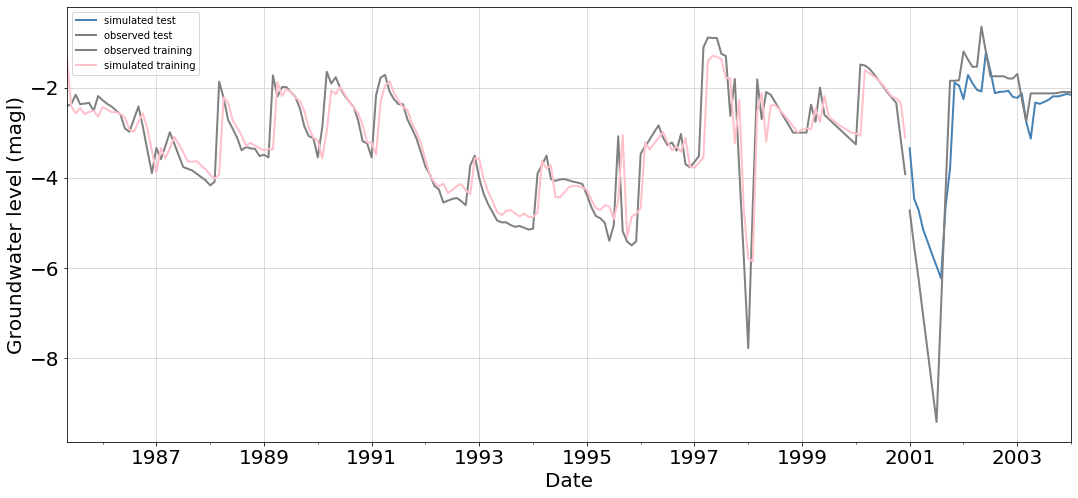

In [66]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))



df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[188:225].index)
df1['observed test']      = pima.iloc[188:225, 0].values

df2 = pd.DataFrame(pima.iloc[0:188, 0].values, columns = ['observed training'],index =pima.iloc[0:188].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [67]:
y_lstm = out_df['simulated test']

### GRU

In [68]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [69]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gru', 'rmse_gru', 'r2_gru','mae_gru'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(37, 6)

    #running function
    gwl = -1.11517948
    test_forecast = X_test
    steps_ahead = 37
    y_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_gru = np.array(y_gru)
    
    #metrics for test
    y_gru = y_gru
    test_pred.append(y_gru)
    mse_gru = mean_squared_error(y_test, y_gru)
    rmse_gru = np.sqrt(mse_gru)
    r2_gru = r2_score(y_test, y_gru)
    mae_gru = mean_absolute_error(y_test, y_gru)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gru,Round), round(rmse_gru,Round), round(r2_gru,Round),round(mae_gru,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(188, 6)
Train on 188 samples, validate on 37 samples
Epoch 1/1000
 96/188 [==============>...............] - ETA: 1s - loss: 0.6900 - mean_squared_error: 0.6900
Epoch 00001: val_loss improved from inf to 2.74101, saving model to model.h5
188/188 [==============================] - 5s 24ms/sample - loss: 0.6710 - mean_squared_error: 0.6710 - val_loss: 2.7410 - val_mean_squared_error: 2.7410
Epoch 2/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.6301 - mean_squared_error: 0.6301
Epoch 00002: val_loss improved from 2.74101 to 2.69981, saving model to model.h5
188/188 [==============================] - 0s 409us/sample - loss: 0.6671 - mean_squared_error: 0.6671 - val_loss: 2.6998 - val_mean_squared_error: 2.6998
Epoch 3/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.6669 - mean_squared_error: 0.6669
Epoch 00003: val_loss improved from 2.69981 to 2.66866, saving model to model.h5
188/188 [==============================] - 0s 470us/sample 

Epoch 25/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3931 - mean_squared_error: 0.3931
Epoch 00025: val_loss improved from 2.21074 to 2.18871, saving model to model.h5
188/188 [==============================] - 0s 223us/sample - loss: 0.3900 - mean_squared_error: 0.3900 - val_loss: 2.1887 - val_mean_squared_error: 2.1887
Epoch 26/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3263 - mean_squared_error: 0.3263
Epoch 00026: val_loss improved from 2.18871 to 2.16761, saving model to model.h5
188/188 [==============================] - 0s 210us/sample - loss: 0.3866 - mean_squared_error: 0.3866 - val_loss: 2.1676 - val_mean_squared_error: 2.1676
Epoch 27/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2661 - mean_squared_error: 0.2661
Epoch 00027: val_loss improved from 2.16761 to 2.14476, saving model to model.h5
188/188 [==============================] - 0s 236us/sample - loss: 0.3814 - mean_squared_error: 0.3814 - val_loss: 2.144

Epoch 49/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3386 - mean_squared_error: 0.3386
Epoch 00049: val_loss improved from 1.65404 to 1.63500, saving model to model.h5
188/188 [==============================] - 0s 244us/sample - loss: 0.2848 - mean_squared_error: 0.2848 - val_loss: 1.6350 - val_mean_squared_error: 1.6350
Epoch 50/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1945 - mean_squared_error: 0.1945
Epoch 00050: val_loss improved from 1.63500 to 1.61235, saving model to model.h5
188/188 [==============================] - 0s 266us/sample - loss: 0.2682 - mean_squared_error: 0.2682 - val_loss: 1.6123 - val_mean_squared_error: 1.6123
Epoch 51/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3627 - mean_squared_error: 0.3627
Epoch 00051: val_loss improved from 1.61235 to 1.59511, saving model to model.h5
188/188 [==============================] - 0s 224us/sample - loss: 0.2749 - mean_squared_error: 0.2749 - val_loss: 1.595

Epoch 73/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1455 - mean_squared_error: 0.1455
Epoch 00073: val_loss improved from 1.30477 to 1.29827, saving model to model.h5
188/188 [==============================] - 0s 251us/sample - loss: 0.2339 - mean_squared_error: 0.2339 - val_loss: 1.2983 - val_mean_squared_error: 1.2983
Epoch 74/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2193 - mean_squared_error: 0.2193
Epoch 00074: val_loss improved from 1.29827 to 1.29109, saving model to model.h5
188/188 [==============================] - 0s 203us/sample - loss: 0.2559 - mean_squared_error: 0.2559 - val_loss: 1.2911 - val_mean_squared_error: 1.2911
Epoch 75/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2169 - mean_squared_error: 0.2169
Epoch 00075: val_loss improved from 1.29109 to 1.27885, saving model to model.h5
188/188 [==============================] - 0s 305us/sample - loss: 0.2346 - mean_squared_error: 0.2346 - val_loss: 1.278

Epoch 97/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2231 - mean_squared_error: 0.2231
Epoch 00097: val_loss improved from 1.16289 to 1.15881, saving model to model.h5
188/188 [==============================] - 0s 235us/sample - loss: 0.2239 - mean_squared_error: 0.2239 - val_loss: 1.1588 - val_mean_squared_error: 1.1588
Epoch 98/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2208 - mean_squared_error: 0.2208
Epoch 00098: val_loss improved from 1.15881 to 1.15091, saving model to model.h5
188/188 [==============================] - 0s 207us/sample - loss: 0.2303 - mean_squared_error: 0.2303 - val_loss: 1.1509 - val_mean_squared_error: 1.1509
Epoch 99/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2724 - mean_squared_error: 0.2724
Epoch 00099: val_loss improved from 1.15091 to 1.14358, saving model to model.h5
188/188 [==============================] - 0s 251us/sample - loss: 0.2150 - mean_squared_error: 0.2150 - val_loss: 1.143

 96/188 [==============>...............] - ETA: 0s - loss: 0.1707 - mean_squared_error: 0.1707
Epoch 00121: val_loss improved from 1.07080 to 1.06541, saving model to model.h5
188/188 [==============================] - 0s 255us/sample - loss: 0.1899 - mean_squared_error: 0.1899 - val_loss: 1.0654 - val_mean_squared_error: 1.0654
Epoch 122/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1791 - mean_squared_error: 0.1791
Epoch 00122: val_loss improved from 1.06541 to 1.06073, saving model to model.h5
188/188 [==============================] - 0s 219us/sample - loss: 0.1959 - mean_squared_error: 0.1959 - val_loss: 1.0607 - val_mean_squared_error: 1.0607
Epoch 123/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2818 - mean_squared_error: 0.2818
Epoch 00123: val_loss improved from 1.06073 to 1.05591, saving model to model.h5
188/188 [==============================] - 0s 218us/sample - loss: 0.2186 - mean_squared_error: 0.2186 - val_loss: 1.0559 - val_mean

Epoch 145/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1776 - mean_squared_error: 0.1776
Epoch 00145: val_loss did not improve from 0.98319
188/188 [==============================] - 0s 119us/sample - loss: 0.1862 - mean_squared_error: 0.1862 - val_loss: 0.9946 - val_mean_squared_error: 0.9946
Epoch 146/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 00146: val_loss did not improve from 0.98319
188/188 [==============================] - 0s 124us/sample - loss: 0.1804 - mean_squared_error: 0.1804 - val_loss: 0.9850 - val_mean_squared_error: 0.9850
Epoch 147/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2243 - mean_squared_error: 0.2243
Epoch 00147: val_loss did not improve from 0.98319
188/188 [==============================] - 0s 101us/sample - loss: 0.1906 - mean_squared_error: 0.1906 - val_loss: 0.9846 - val_mean_squared_error: 0.9846
Epoch 148/1000
 96/188 [==============>.............

Epoch 170/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1483 - mean_squared_error: 0.1483
Epoch 00170: val_loss did not improve from 0.94192
188/188 [==============================] - 0s 135us/sample - loss: 0.2089 - mean_squared_error: 0.2089 - val_loss: 0.9451 - val_mean_squared_error: 0.9451
Epoch 171/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1975 - mean_squared_error: 0.1975
Epoch 00171: val_loss did not improve from 0.94192
188/188 [==============================] - 0s 136us/sample - loss: 0.1909 - mean_squared_error: 0.1909 - val_loss: 0.9430 - val_mean_squared_error: 0.9430
Epoch 172/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1769 - mean_squared_error: 0.1769
Epoch 00172: val_loss did not improve from 0.94192
188/188 [==============================] - 0s 125us/sample - loss: 0.1859 - mean_squared_error: 0.1859 - val_loss: 0.9430 - val_mean_squared_error: 0.9430
Epoch 173/1000
 96/188 [==============>.............

 96/188 [==============>...............] - ETA: 0s - loss: 0.1799 - mean_squared_error: 0.1799
Epoch 00195: val_loss did not improve from 0.90296
188/188 [==============================] - 0s 146us/sample - loss: 0.1750 - mean_squared_error: 0.1750 - val_loss: 0.9053 - val_mean_squared_error: 0.9053
Epoch 196/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1844 - mean_squared_error: 0.1844
Epoch 00196: val_loss did not improve from 0.90296
188/188 [==============================] - 0s 117us/sample - loss: 0.1777 - mean_squared_error: 0.1777 - val_loss: 0.9071 - val_mean_squared_error: 0.9071
Epoch 197/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2406 - mean_squared_error: 0.2406
Epoch 00197: val_loss improved from 0.90296 to 0.89743, saving model to model.h5
188/188 [==============================] - 0s 221us/sample - loss: 0.1841 - mean_squared_error: 0.1841 - val_loss: 0.8974 - val_mean_squared_error: 0.8974
Epoch 198/1000
 96/188 [=============

Epoch 221/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1311 - mean_squared_error: 0.1311
Epoch 00221: val_loss did not improve from 0.89743
188/188 [==============================] - 0s 180us/sample - loss: 0.1769 - mean_squared_error: 0.1769 - val_loss: 0.9044 - val_mean_squared_error: 0.9044
Epoch 222/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1287 - mean_squared_error: 0.1287
Epoch 00222: val_loss did not improve from 0.89743
188/188 [==============================] - 0s 163us/sample - loss: 0.1799 - mean_squared_error: 0.1799 - val_loss: 0.9082 - val_mean_squared_error: 0.9082
Epoch 223/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1694 - mean_squared_error: 0.1694
Epoch 00223: val_loss did not improve from 0.89743
188/188 [==============================] - 0s 201us/sample - loss: 0.1805 - mean_squared_error: 0.1805 - val_loss: 0.9105 - val_mean_squared_error: 0.9105
Epoch 224/1000
 96/188 [==============>.............

Epoch 247/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2260 - mean_squared_error: 0.2260
Epoch 00247: val_loss improved from 0.88373 to 0.88346, saving model to model.h5
188/188 [==============================] - 0s 236us/sample - loss: 0.1826 - mean_squared_error: 0.1826 - val_loss: 0.8835 - val_mean_squared_error: 0.8835
Epoch 248/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1695 - mean_squared_error: 0.1695
Epoch 00248: val_loss improved from 0.88346 to 0.88201, saving model to model.h5
188/188 [==============================] - 0s 270us/sample - loss: 0.1773 - mean_squared_error: 0.1773 - val_loss: 0.8820 - val_mean_squared_error: 0.8820
Epoch 249/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2115 - mean_squared_error: 0.2115
Epoch 00249: val_loss improved from 0.88201 to 0.87739, saving model to model.h5
188/188 [==============================] - 0s 227us/sample - loss: 0.1754 - mean_squared_error: 0.1754 - val_loss: 0.

Epoch 272/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1215 - mean_squared_error: 0.1215
Epoch 00272: val_loss did not improve from 0.85790
188/188 [==============================] - 0s 392us/sample - loss: 0.1733 - mean_squared_error: 0.1733 - val_loss: 0.8668 - val_mean_squared_error: 0.8668
Epoch 273/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2384 - mean_squared_error: 0.2384
Epoch 00273: val_loss did not improve from 0.85790
188/188 [==============================] - 0s 158us/sample - loss: 0.1888 - mean_squared_error: 0.1888 - val_loss: 0.8692 - val_mean_squared_error: 0.8692
Epoch 274/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1708 - mean_squared_error: 0.1708
Epoch 00274: val_loss did not improve from 0.85790
188/188 [==============================] - 0s 199us/sample - loss: 0.1729 - mean_squared_error: 0.1729 - val_loss: 0.8772 - val_mean_squared_error: 0.8772
Epoch 275/1000
 96/188 [==============>.............

Epoch 298/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1701 - mean_squared_error: 0.1701
Epoch 00298: val_loss did not improve from 0.85553
188/188 [==============================] - 0s 146us/sample - loss: 0.1684 - mean_squared_error: 0.1684 - val_loss: 0.8791 - val_mean_squared_error: 0.8791
Epoch 299/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1504 - mean_squared_error: 0.1504
Epoch 00299: val_loss did not improve from 0.85553
188/188 [==============================] - 0s 145us/sample - loss: 0.1935 - mean_squared_error: 0.1935 - val_loss: 0.8821 - val_mean_squared_error: 0.8821
Epoch 300/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1235 - mean_squared_error: 0.1235
Epoch 00300: val_loss did not improve from 0.85553
188/188 [==============================] - 0s 160us/sample - loss: 0.1699 - mean_squared_error: 0.1699 - val_loss: 0.8880 - val_mean_squared_error: 0.8880
Epoch 301/1000
 96/188 [==============>.............

Epoch 324/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1765 - mean_squared_error: 0.1765
Epoch 00324: val_loss did not improve from 0.85553
188/188 [==============================] - 0s 120us/sample - loss: 0.1703 - mean_squared_error: 0.1703 - val_loss: 0.8727 - val_mean_squared_error: 0.8727
Epoch 325/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1688 - mean_squared_error: 0.1688
Epoch 00325: val_loss did not improve from 0.85553
188/188 [==============================] - 0s 176us/sample - loss: 0.1846 - mean_squared_error: 0.1846 - val_loss: 0.8790 - val_mean_squared_error: 0.8790
Epoch 326/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1174 - mean_squared_error: 0.1174
Epoch 00326: val_loss did not improve from 0.85553
188/188 [==============================] - 0s 119us/sample - loss: 0.1670 - mean_squared_error: 0.1670 - val_loss: 0.8781 - val_mean_squared_error: 0.8781
Epoch 327/1000
 96/188 [==============>.............

Epoch 350/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1897 - mean_squared_error: 0.1897
Epoch 00350: val_loss did not improve from 0.85553
188/188 [==============================] - 0s 126us/sample - loss: 0.1861 - mean_squared_error: 0.1861 - val_loss: 0.8966 - val_mean_squared_error: 0.8966
Epoch 351/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1165 - mean_squared_error: 0.1165
Epoch 00351: val_loss did not improve from 0.85553
188/188 [==============================] - 0s 105us/sample - loss: 0.1731 - mean_squared_error: 0.1731 - val_loss: 0.9008 - val_mean_squared_error: 0.9008
Epoch 352/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1381 - mean_squared_error: 0.1381
Epoch 00352: val_loss did not improve from 0.85553
188/188 [==============================] - 0s 115us/sample - loss: 0.1534 - mean_squared_error: 0.1534 - val_loss: 0.8942 - val_mean_squared_error: 0.8942
Epoch 353/1000
 96/188 [==============>.............

Epoch 376/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1433 - mean_squared_error: 0.1433
Epoch 00376: val_loss did not improve from 0.85553
188/188 [==============================] - 0s 127us/sample - loss: 0.1791 - mean_squared_error: 0.1791 - val_loss: 0.9180 - val_mean_squared_error: 0.9180
Epoch 377/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1455 - mean_squared_error: 0.1455
Epoch 00377: val_loss did not improve from 0.85553
188/188 [==============================] - 0s 114us/sample - loss: 0.1635 - mean_squared_error: 0.1635 - val_loss: 0.9214 - val_mean_squared_error: 0.9214
Epoch 378/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1652 - mean_squared_error: 0.1652
Epoch 00378: val_loss did not improve from 0.85553
188/188 [==============================] - 0s 117us/sample - loss: 0.1711 - mean_squared_error: 0.1711 - val_loss: 0.9316 - val_mean_squared_error: 0.9316
Epoch 379/1000
 96/188 [==============>.............

 96/188 [==============>...............] - ETA: 0s - loss: 0.2619 - mean_squared_error: 0.2619
Epoch 00018: val_loss improved from 1.80156 to 1.77504, saving model to model.h5
188/188 [==============================] - 0s 315us/sample - loss: 0.3164 - mean_squared_error: 0.3164 - val_loss: 1.7750 - val_mean_squared_error: 1.7750
Epoch 19/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2938 - mean_squared_error: 0.2938
Epoch 00019: val_loss improved from 1.77504 to 1.75171, saving model to model.h5
188/188 [==============================] - 0s 319us/sample - loss: 0.3043 - mean_squared_error: 0.3043 - val_loss: 1.7517 - val_mean_squared_error: 1.7517
Epoch 20/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3448 - mean_squared_error: 0.3448
Epoch 00020: val_loss improved from 1.75171 to 1.72687, saving model to model.h5
188/188 [==============================] - 0s 371us/sample - loss: 0.3017 - mean_squared_error: 0.3017 - val_loss: 1.7269 - val_mean_s

Epoch 42/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2729 - mean_squared_error: 0.2729
Epoch 00042: val_loss improved from 1.31592 to 1.29803, saving model to model.h5
188/188 [==============================] - 0s 275us/sample - loss: 0.2489 - mean_squared_error: 0.2489 - val_loss: 1.2980 - val_mean_squared_error: 1.2980
Epoch 43/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2690 - mean_squared_error: 0.2690
Epoch 00043: val_loss improved from 1.29803 to 1.28545, saving model to model.h5
188/188 [==============================] - 0s 313us/sample - loss: 0.2506 - mean_squared_error: 0.2506 - val_loss: 1.2854 - val_mean_squared_error: 1.2854
Epoch 44/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2559 - mean_squared_error: 0.2559
Epoch 00044: val_loss improved from 1.28545 to 1.27725, saving model to model.h5
188/188 [==============================] - 0s 231us/sample - loss: 0.2403 - mean_squared_error: 0.2403 - val_loss: 1.277

Epoch 66/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2489 - mean_squared_error: 0.2489
Epoch 00066: val_loss improved from 1.09755 to 1.08892, saving model to model.h5
188/188 [==============================] - 0s 262us/sample - loss: 0.2124 - mean_squared_error: 0.2124 - val_loss: 1.0889 - val_mean_squared_error: 1.0889
Epoch 67/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1739 - mean_squared_error: 0.1739
Epoch 00067: val_loss improved from 1.08892 to 1.08580, saving model to model.h5
188/188 [==============================] - 0s 255us/sample - loss: 0.2190 - mean_squared_error: 0.2190 - val_loss: 1.0858 - val_mean_squared_error: 1.0858
Epoch 68/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1390 - mean_squared_error: 0.1390
Epoch 00068: val_loss improved from 1.08580 to 1.08534, saving model to model.h5
188/188 [==============================] - 0s 454us/sample - loss: 0.2098 - mean_squared_error: 0.2098 - val_loss: 1.085

 96/188 [==============>...............] - ETA: 0s - loss: 0.2319 - mean_squared_error: 0.2319
Epoch 00090: val_loss improved from 0.99267 to 0.99181, saving model to model.h5
188/188 [==============================] - 0s 287us/sample - loss: 0.2241 - mean_squared_error: 0.2241 - val_loss: 0.9918 - val_mean_squared_error: 0.9918
Epoch 91/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1877 - mean_squared_error: 0.1877
Epoch 00091: val_loss improved from 0.99181 to 0.98331, saving model to model.h5
188/188 [==============================] - 0s 239us/sample - loss: 0.2019 - mean_squared_error: 0.2019 - val_loss: 0.9833 - val_mean_squared_error: 0.9833
Epoch 92/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2579 - mean_squared_error: 0.2579
Epoch 00092: val_loss improved from 0.98331 to 0.97721, saving model to model.h5
188/188 [==============================] - 0s 282us/sample - loss: 0.1975 - mean_squared_error: 0.1975 - val_loss: 0.9772 - val_mean_s

Epoch 115/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1470 - mean_squared_error: 0.1470
Epoch 00115: val_loss did not improve from 0.91974
188/188 [==============================] - 0s 135us/sample - loss: 0.1910 - mean_squared_error: 0.1910 - val_loss: 0.9214 - val_mean_squared_error: 0.9214
Epoch 116/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2233 - mean_squared_error: 0.2233
Epoch 00116: val_loss did not improve from 0.91974
188/188 [==============================] - 0s 242us/sample - loss: 0.1945 - mean_squared_error: 0.1945 - val_loss: 0.9214 - val_mean_squared_error: 0.9214
Epoch 117/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1689 - mean_squared_error: 0.1689
Epoch 00117: val_loss improved from 0.91974 to 0.91882, saving model to model.h5
188/188 [==============================] - 0s 324us/sample - loss: 0.1871 - mean_squared_error: 0.1871 - val_loss: 0.9188 - val_mean_squared_error: 0.9188
Epoch 118/1000
 96/188

Epoch 140/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1768 - mean_squared_error: 0.1768
Epoch 00140: val_loss did not improve from 0.87212
188/188 [==============================] - 0s 172us/sample - loss: 0.1777 - mean_squared_error: 0.1777 - val_loss: 0.8944 - val_mean_squared_error: 0.8944
Epoch 141/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2500 - mean_squared_error: 0.2500
Epoch 00141: val_loss did not improve from 0.87212
188/188 [==============================] - 0s 111us/sample - loss: 0.1801 - mean_squared_error: 0.1801 - val_loss: 0.8917 - val_mean_squared_error: 0.8917
Epoch 142/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1845 - mean_squared_error: 0.1845
Epoch 00142: val_loss did not improve from 0.87212
188/188 [==============================] - 0s 95us/sample - loss: 0.1829 - mean_squared_error: 0.1829 - val_loss: 0.8882 - val_mean_squared_error: 0.8882
Epoch 143/1000
 96/188 [==============>..............

Epoch 166/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1811 - mean_squared_error: 0.1811
Epoch 00166: val_loss did not improve from 0.87212
188/188 [==============================] - 0s 135us/sample - loss: 0.1817 - mean_squared_error: 0.1817 - val_loss: 0.8798 - val_mean_squared_error: 0.8798
Epoch 167/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1649 - mean_squared_error: 0.1649
Epoch 00167: val_loss did not improve from 0.87212
188/188 [==============================] - 0s 112us/sample - loss: 0.1921 - mean_squared_error: 0.1921 - val_loss: 0.8861 - val_mean_squared_error: 0.8861
Epoch 168/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1261 - mean_squared_error: 0.1261
Epoch 00168: val_loss did not improve from 0.87212
188/188 [==============================] - 0s 188us/sample - loss: 0.1807 - mean_squared_error: 0.1807 - val_loss: 0.8822 - val_mean_squared_error: 0.8822
Epoch 169/1000
 96/188 [==============>.............

Epoch 192/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1993 - mean_squared_error: 0.1993
Epoch 00192: val_loss did not improve from 0.85958
188/188 [==============================] - 0s 127us/sample - loss: 0.1707 - mean_squared_error: 0.1707 - val_loss: 0.8764 - val_mean_squared_error: 0.8764
Epoch 193/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2070 - mean_squared_error: 0.2070
Epoch 00193: val_loss did not improve from 0.85958
188/188 [==============================] - 0s 137us/sample - loss: 0.1800 - mean_squared_error: 0.1800 - val_loss: 0.8828 - val_mean_squared_error: 0.8828
Epoch 194/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1723 - mean_squared_error: 0.1723
Epoch 00194: val_loss did not improve from 0.85958
188/188 [==============================] - 0s 257us/sample - loss: 0.1897 - mean_squared_error: 0.1897 - val_loss: 0.8856 - val_mean_squared_error: 0.8856
Epoch 195/1000
 96/188 [==============>.............

Epoch 218/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1329 - mean_squared_error: 0.1329
Epoch 00218: val_loss did not improve from 0.85958
188/188 [==============================] - 0s 105us/sample - loss: 0.1808 - mean_squared_error: 0.1808 - val_loss: 0.8966 - val_mean_squared_error: 0.8966
Epoch 219/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1851 - mean_squared_error: 0.1851
Epoch 00219: val_loss did not improve from 0.85958
188/188 [==============================] - 0s 181us/sample - loss: 0.1863 - mean_squared_error: 0.1863 - val_loss: 0.8892 - val_mean_squared_error: 0.8892
Epoch 220/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1766 - mean_squared_error: 0.1766
Epoch 00220: val_loss did not improve from 0.85958
188/188 [==============================] - 0s 102us/sample - loss: 0.1711 - mean_squared_error: 0.1711 - val_loss: 0.8838 - val_mean_squared_error: 0.8838
Epoch 221/1000
 96/188 [==============>.............

Epoch 244/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2107 - mean_squared_error: 0.2107
Epoch 00244: val_loss did not improve from 0.85958
188/188 [==============================] - 0s 137us/sample - loss: 0.1798 - mean_squared_error: 0.1798 - val_loss: 0.9068 - val_mean_squared_error: 0.9068
Epoch 245/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1530 - mean_squared_error: 0.1530
Epoch 00245: val_loss did not improve from 0.85958
188/188 [==============================] - 0s 100us/sample - loss: 0.1693 - mean_squared_error: 0.1693 - val_loss: 0.8989 - val_mean_squared_error: 0.8989
Epoch 246/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2229 - mean_squared_error: 0.2229
Epoch 00246: val_loss did not improve from 0.85958
188/188 [==============================] - 0s 153us/sample - loss: 0.1796 - mean_squared_error: 0.1796 - val_loss: 0.8980 - val_mean_squared_error: 0.8980
Epoch 247/1000
 96/188 [==============>.............

Epoch 270/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1880 - mean_squared_error: 0.1880
Epoch 00270: val_loss did not improve from 0.85958
188/188 [==============================] - 0s 124us/sample - loss: 0.1713 - mean_squared_error: 0.1713 - val_loss: 0.9117 - val_mean_squared_error: 0.9117
Epoch 271/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1457 - mean_squared_error: 0.1457
Epoch 00271: val_loss did not improve from 0.85958
188/188 [==============================] - 0s 104us/sample - loss: 0.1666 - mean_squared_error: 0.1666 - val_loss: 0.9184 - val_mean_squared_error: 0.9184
Epoch 272/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2623 - mean_squared_error: 0.2623
Epoch 00272: val_loss did not improve from 0.85958
188/188 [==============================] - 0s 105us/sample - loss: 0.1870 - mean_squared_error: 0.1870 - val_loss: 0.9252 - val_mean_squared_error: 0.9252
Epoch 273/1000
 96/188 [==============>.............

Epoch 13/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4022 - mean_squared_error: 0.4022
Epoch 00013: val_loss improved from 1.87001 to 1.83886, saving model to model.h5
188/188 [==============================] - 0s 195us/sample - loss: 0.3630 - mean_squared_error: 0.3630 - val_loss: 1.8389 - val_mean_squared_error: 1.8389
Epoch 14/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3659 - mean_squared_error: 0.3659
Epoch 00014: val_loss improved from 1.83886 to 1.80813, saving model to model.h5
188/188 [==============================] - 0s 181us/sample - loss: 0.3337 - mean_squared_error: 0.3337 - val_loss: 1.8081 - val_mean_squared_error: 1.8081
Epoch 15/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3879 - mean_squared_error: 0.3879
Epoch 00015: val_loss improved from 1.80813 to 1.78032, saving model to model.h5
188/188 [==============================] - 0s 171us/sample - loss: 0.3303 - mean_squared_error: 0.3303 - val_loss: 1.780

Epoch 37/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2678 - mean_squared_error: 0.2678
Epoch 00037: val_loss improved from 1.35782 to 1.34518, saving model to model.h5
188/188 [==============================] - 0s 200us/sample - loss: 0.2590 - mean_squared_error: 0.2590 - val_loss: 1.3452 - val_mean_squared_error: 1.3452
Epoch 38/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3291 - mean_squared_error: 0.3291
Epoch 00038: val_loss improved from 1.34518 to 1.33430, saving model to model.h5
188/188 [==============================] - 0s 246us/sample - loss: 0.2657 - mean_squared_error: 0.2657 - val_loss: 1.3343 - val_mean_squared_error: 1.3343
Epoch 39/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2235 - mean_squared_error: 0.2235
Epoch 00039: val_loss improved from 1.33430 to 1.32476, saving model to model.h5
188/188 [==============================] - 0s 197us/sample - loss: 0.2540 - mean_squared_error: 0.2540 - val_loss: 1.324

Epoch 61/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2322 - mean_squared_error: 0.2322
Epoch 00061: val_loss improved from 1.13669 to 1.13253, saving model to model.h5
188/188 [==============================] - 0s 213us/sample - loss: 0.2290 - mean_squared_error: 0.2290 - val_loss: 1.1325 - val_mean_squared_error: 1.1325
Epoch 62/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2419 - mean_squared_error: 0.2419
Epoch 00062: val_loss improved from 1.13253 to 1.12543, saving model to model.h5
188/188 [==============================] - 0s 189us/sample - loss: 0.2174 - mean_squared_error: 0.2174 - val_loss: 1.1254 - val_mean_squared_error: 1.1254
Epoch 63/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1793 - mean_squared_error: 0.1793
Epoch 00063: val_loss improved from 1.12543 to 1.12333, saving model to model.h5
188/188 [==============================] - 0s 183us/sample - loss: 0.2158 - mean_squared_error: 0.2158 - val_loss: 1.123

188/188 [==============================] - 0s 220us/sample - loss: 0.2298 - mean_squared_error: 0.2298 - val_loss: 1.0344 - val_mean_squared_error: 1.0344
Epoch 86/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2399 - mean_squared_error: 0.2399
Epoch 00086: val_loss improved from 1.03445 to 1.02247, saving model to model.h5
188/188 [==============================] - 0s 202us/sample - loss: 0.1979 - mean_squared_error: 0.1979 - val_loss: 1.0225 - val_mean_squared_error: 1.0225
Epoch 87/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2059 - mean_squared_error: 0.2059
Epoch 00087: val_loss improved from 1.02247 to 1.01786, saving model to model.h5
188/188 [==============================] - 0s 206us/sample - loss: 0.1950 - mean_squared_error: 0.1950 - val_loss: 1.0179 - val_mean_squared_error: 1.0179
Epoch 88/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2455 - mean_squared_error: 0.2455
Epoch 00088: val_loss did not improve from 1.0

 96/188 [==============>...............] - ETA: 0s - loss: 0.1753 - mean_squared_error: 0.1753
Epoch 00110: val_loss did not improve from 0.97759
188/188 [==============================] - 0s 122us/sample - loss: 0.1994 - mean_squared_error: 0.1994 - val_loss: 0.9810 - val_mean_squared_error: 0.9810
Epoch 111/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2051 - mean_squared_error: 0.2051
Epoch 00111: val_loss did not improve from 0.97759
188/188 [==============================] - 0s 107us/sample - loss: 0.1943 - mean_squared_error: 0.1943 - val_loss: 0.9834 - val_mean_squared_error: 0.9834
Epoch 112/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1668 - mean_squared_error: 0.1668
Epoch 00112: val_loss did not improve from 0.97759
188/188 [==============================] - 0s 112us/sample - loss: 0.1948 - mean_squared_error: 0.1948 - val_loss: 0.9778 - val_mean_squared_error: 0.9778
Epoch 113/1000
 96/188 [==============>...............] - ETA: 0s -

Epoch 135/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1335 - mean_squared_error: 0.1335
Epoch 00135: val_loss did not improve from 0.92061
188/188 [==============================] - 0s 103us/sample - loss: 0.1714 - mean_squared_error: 0.1714 - val_loss: 0.9429 - val_mean_squared_error: 0.9429
Epoch 136/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1609 - mean_squared_error: 0.1609
Epoch 00136: val_loss did not improve from 0.92061
188/188 [==============================] - 0s 102us/sample - loss: 0.1874 - mean_squared_error: 0.1874 - val_loss: 0.9458 - val_mean_squared_error: 0.9458
Epoch 137/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1359 - mean_squared_error: 0.1359
Epoch 00137: val_loss did not improve from 0.92061
188/188 [==============================] - 0s 99us/sample - loss: 0.1741 - mean_squared_error: 0.1741 - val_loss: 0.9523 - val_mean_squared_error: 0.9523
Epoch 138/1000
 96/188 [==============>..............

Epoch 161/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1809 - mean_squared_error: 0.1809
Epoch 00161: val_loss improved from 0.91795 to 0.91494, saving model to model.h5
188/188 [==============================] - 0s 222us/sample - loss: 0.1885 - mean_squared_error: 0.1885 - val_loss: 0.9149 - val_mean_squared_error: 0.9149
Epoch 162/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1017 - mean_squared_error: 0.1017
Epoch 00162: val_loss did not improve from 0.91494
188/188 [==============================] - 0s 117us/sample - loss: 0.1795 - mean_squared_error: 0.1795 - val_loss: 0.9249 - val_mean_squared_error: 0.9249
Epoch 163/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1850 - mean_squared_error: 0.1850
Epoch 00163: val_loss improved from 0.91494 to 0.91454, saving model to model.h5
188/188 [==============================] - 0s 232us/sample - loss: 0.1844 - mean_squared_error: 0.1844 - val_loss: 0.9145 - val_mean_squared_error:

Epoch 187/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1863 - mean_squared_error: 0.1863
Epoch 00187: val_loss did not improve from 0.90300
188/188 [==============================] - 0s 111us/sample - loss: 0.1752 - mean_squared_error: 0.1752 - val_loss: 0.9287 - val_mean_squared_error: 0.9287
Epoch 188/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2146 - mean_squared_error: 0.2146
Epoch 00188: val_loss did not improve from 0.90300
188/188 [==============================] - 0s 105us/sample - loss: 0.1818 - mean_squared_error: 0.1818 - val_loss: 0.9361 - val_mean_squared_error: 0.9361
Epoch 189/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1371 - mean_squared_error: 0.1371
Epoch 00189: val_loss did not improve from 0.90300
188/188 [==============================] - 0s 114us/sample - loss: 0.1709 - mean_squared_error: 0.1709 - val_loss: 0.9362 - val_mean_squared_error: 0.9362
Epoch 190/1000
 96/188 [==============>.............

Epoch 213/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1761 - mean_squared_error: 0.1761
Epoch 00213: val_loss did not improve from 0.90300
188/188 [==============================] - 0s 111us/sample - loss: 0.1812 - mean_squared_error: 0.1812 - val_loss: 0.9482 - val_mean_squared_error: 0.9482
Epoch 214/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1654 - mean_squared_error: 0.1654
Epoch 00214: val_loss did not improve from 0.90300
188/188 [==============================] - 0s 97us/sample - loss: 0.1763 - mean_squared_error: 0.1763 - val_loss: 0.9516 - val_mean_squared_error: 0.9516
Epoch 215/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1854 - mean_squared_error: 0.1854
Epoch 00215: val_loss did not improve from 0.90300
188/188 [==============================] - 0s 98us/sample - loss: 0.1986 - mean_squared_error: 0.1986 - val_loss: 0.9623 - val_mean_squared_error: 0.9623
Epoch 216/1000
 96/188 [==============>...............

Epoch 239/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1799 - mean_squared_error: 0.1799
Epoch 00239: val_loss did not improve from 0.90300
188/188 [==============================] - 0s 120us/sample - loss: 0.1776 - mean_squared_error: 0.1776 - val_loss: 0.9632 - val_mean_squared_error: 0.9632
Epoch 240/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1422 - mean_squared_error: 0.1422
Epoch 00240: val_loss did not improve from 0.90300
188/188 [==============================] - 0s 123us/sample - loss: 0.1686 - mean_squared_error: 0.1686 - val_loss: 0.9643 - val_mean_squared_error: 0.9643
Epoch 241/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1476 - mean_squared_error: 0.1476
Epoch 00241: val_loss did not improve from 0.90300
188/188 [==============================] - 0s 155us/sample - loss: 0.1654 - mean_squared_error: 0.1654 - val_loss: 0.9598 - val_mean_squared_error: 0.9598
Epoch 242/1000
 96/188 [==============>.............

Epoch 265/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1747 - mean_squared_error: 0.1747
Epoch 00265: val_loss did not improve from 0.90300
188/188 [==============================] - 0s 143us/sample - loss: 0.1489 - mean_squared_error: 0.1489 - val_loss: 0.9527 - val_mean_squared_error: 0.9527
Running fold 4
(188, 6)
Train on 188 samples, validate on 37 samples
Epoch 1/1000
 96/188 [==============>...............] - ETA: 1s - loss: 0.8917 - mean_squared_error: 0.8917
Epoch 00001: val_loss improved from inf to 3.03706, saving model to model.h5
188/188 [==============================] - 5s 25ms/sample - loss: 0.8336 - mean_squared_error: 0.8336 - val_loss: 3.0371 - val_mean_squared_error: 3.0371
Epoch 2/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.8530 - mean_squared_error: 0.8530
Epoch 00002: val_loss improved from 3.03706 to 2.94692, saving model to model.h5
188/188 [==============================] - 0s 185us/sample - loss: 0.7663 - mean_square

Epoch 24/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4296 - mean_squared_error: 0.4296
Epoch 00024: val_loss improved from 2.10590 to 2.07697, saving model to model.h5
188/188 [==============================] - 0s 176us/sample - loss: 0.4242 - mean_squared_error: 0.4242 - val_loss: 2.0770 - val_mean_squared_error: 2.0770
Epoch 25/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3980 - mean_squared_error: 0.3980
Epoch 00025: val_loss improved from 2.07697 to 2.04602, saving model to model.h5
188/188 [==============================] - 0s 172us/sample - loss: 0.4179 - mean_squared_error: 0.4179 - val_loss: 2.0460 - val_mean_squared_error: 2.0460
Epoch 26/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3142 - mean_squared_error: 0.3142
Epoch 00026: val_loss improved from 2.04602 to 2.01977, saving model to model.h5
188/188 [==============================] - 0s 168us/sample - loss: 0.3819 - mean_squared_error: 0.3819 - val_loss: 2.019

Epoch 48/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3612 - mean_squared_error: 0.3612
Epoch 00048: val_loss improved from 1.55743 to 1.53866, saving model to model.h5
188/188 [==============================] - 0s 181us/sample - loss: 0.2866 - mean_squared_error: 0.2866 - val_loss: 1.5387 - val_mean_squared_error: 1.5387
Epoch 49/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2410 - mean_squared_error: 0.2410
Epoch 00049: val_loss improved from 1.53866 to 1.52357, saving model to model.h5
188/188 [==============================] - 0s 180us/sample - loss: 0.2790 - mean_squared_error: 0.2790 - val_loss: 1.5236 - val_mean_squared_error: 1.5236
Epoch 50/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3368 - mean_squared_error: 0.3368
Epoch 00050: val_loss improved from 1.52357 to 1.50571, saving model to model.h5
188/188 [==============================] - 0s 172us/sample - loss: 0.2803 - mean_squared_error: 0.2803 - val_loss: 1.505

Epoch 72/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1832 - mean_squared_error: 0.1832
Epoch 00072: val_loss improved from 1.27750 to 1.27006, saving model to model.h5
188/188 [==============================] - 0s 170us/sample - loss: 0.2493 - mean_squared_error: 0.2493 - val_loss: 1.2701 - val_mean_squared_error: 1.2701
Epoch 73/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2688 - mean_squared_error: 0.2688
Epoch 00073: val_loss improved from 1.27006 to 1.26426, saving model to model.h5
188/188 [==============================] - 0s 185us/sample - loss: 0.2498 - mean_squared_error: 0.2498 - val_loss: 1.2643 - val_mean_squared_error: 1.2643
Epoch 74/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3246 - mean_squared_error: 0.3246
Epoch 00074: val_loss improved from 1.26426 to 1.25765, saving model to model.h5
188/188 [==============================] - 0s 175us/sample - loss: 0.2640 - mean_squared_error: 0.2640 - val_loss: 1.257

Epoch 96/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2852 - mean_squared_error: 0.2852
Epoch 00096: val_loss improved from 1.10666 to 1.09421, saving model to model.h5
188/188 [==============================] - 0s 207us/sample - loss: 0.2104 - mean_squared_error: 0.2104 - val_loss: 1.0942 - val_mean_squared_error: 1.0942
Epoch 97/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2125 - mean_squared_error: 0.2125
Epoch 00097: val_loss improved from 1.09421 to 1.09303, saving model to model.h5
188/188 [==============================] - 0s 184us/sample - loss: 0.2136 - mean_squared_error: 0.2136 - val_loss: 1.0930 - val_mean_squared_error: 1.0930
Epoch 98/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2875 - mean_squared_error: 0.2875
Epoch 00098: val_loss improved from 1.09303 to 1.08368, saving model to model.h5
188/188 [==============================] - 0s 191us/sample - loss: 0.2195 - mean_squared_error: 0.2195 - val_loss: 1.083

Epoch 120/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2442 - mean_squared_error: 0.2442
Epoch 00120: val_loss improved from 0.99634 to 0.99460, saving model to model.h5
188/188 [==============================] - 0s 240us/sample - loss: 0.2083 - mean_squared_error: 0.2083 - val_loss: 0.9946 - val_mean_squared_error: 0.9946
Epoch 121/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1833 - mean_squared_error: 0.1833
Epoch 00121: val_loss improved from 0.99460 to 0.98715, saving model to model.h5
188/188 [==============================] - 0s 189us/sample - loss: 0.2152 - mean_squared_error: 0.2152 - val_loss: 0.9871 - val_mean_squared_error: 0.9871
Epoch 122/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1917 - mean_squared_error: 0.1917
Epoch 00122: val_loss improved from 0.98715 to 0.98265, saving model to model.h5
188/188 [==============================] - 0s 174us/sample - loss: 0.2154 - mean_squared_error: 0.2154 - val_loss: 0.

Epoch 145/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1697 - mean_squared_error: 0.1697
Epoch 00145: val_loss did not improve from 0.93598
188/188 [==============================] - 0s 89us/sample - loss: 0.1831 - mean_squared_error: 0.1831 - val_loss: 0.9453 - val_mean_squared_error: 0.9453
Epoch 146/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 00146: val_loss did not improve from 0.93598
188/188 [==============================] - 0s 97us/sample - loss: 0.1923 - mean_squared_error: 0.1923 - val_loss: 0.9416 - val_mean_squared_error: 0.9416
Epoch 147/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2719 - mean_squared_error: 0.2719
Epoch 00147: val_loss improved from 0.93598 to 0.93211, saving model to model.h5
188/188 [==============================] - 0s 220us/sample - loss: 0.1860 - mean_squared_error: 0.1860 - val_loss: 0.9321 - val_mean_squared_error: 0.9321
Epoch 148/1000
 96/188 [

Epoch 170/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1565 - mean_squared_error: 0.1565
Epoch 00170: val_loss did not improve from 0.89201
188/188 [==============================] - 0s 99us/sample - loss: 0.1840 - mean_squared_error: 0.1840 - val_loss: 0.8946 - val_mean_squared_error: 0.8946
Epoch 171/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2255 - mean_squared_error: 0.2255
Epoch 00171: val_loss did not improve from 0.89201
188/188 [==============================] - 0s 97us/sample - loss: 0.1895 - mean_squared_error: 0.1895 - val_loss: 0.8938 - val_mean_squared_error: 0.8938
Epoch 172/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1638 - mean_squared_error: 0.1638
Epoch 00172: val_loss did not improve from 0.89201
188/188 [==============================] - 0s 84us/sample - loss: 0.1802 - mean_squared_error: 0.1802 - val_loss: 0.8974 - val_mean_squared_error: 0.8974
Epoch 173/1000
 96/188 [==============>...............]

Epoch 196/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2277 - mean_squared_error: 0.2277
Epoch 00196: val_loss did not improve from 0.88394
188/188 [==============================] - 0s 133us/sample - loss: 0.1754 - mean_squared_error: 0.1754 - val_loss: 0.8949 - val_mean_squared_error: 0.8949
Epoch 197/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1551 - mean_squared_error: 0.1551
Epoch 00197: val_loss did not improve from 0.88394
188/188 [==============================] - 0s 97us/sample - loss: 0.1740 - mean_squared_error: 0.1740 - val_loss: 0.8925 - val_mean_squared_error: 0.8925
Epoch 198/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1648 - mean_squared_error: 0.1648
Epoch 00198: val_loss did not improve from 0.88394
188/188 [==============================] - 0s 88us/sample - loss: 0.1845 - mean_squared_error: 0.1845 - val_loss: 0.8957 - val_mean_squared_error: 0.8957
Epoch 199/1000
 96/188 [==============>...............

Epoch 222/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1523 - mean_squared_error: 0.1523
Epoch 00222: val_loss did not improve from 0.86247
188/188 [==============================] - 0s 171us/sample - loss: 0.1814 - mean_squared_error: 0.1814 - val_loss: 0.8809 - val_mean_squared_error: 0.8809
Epoch 223/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1520 - mean_squared_error: 0.1520
Epoch 00223: val_loss did not improve from 0.86247
188/188 [==============================] - 0s 89us/sample - loss: 0.1922 - mean_squared_error: 0.1922 - val_loss: 0.8831 - val_mean_squared_error: 0.8831
Epoch 224/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1286 - mean_squared_error: 0.1286
Epoch 00224: val_loss did not improve from 0.86247
188/188 [==============================] - 0s 93us/sample - loss: 0.1653 - mean_squared_error: 0.1653 - val_loss: 0.8868 - val_mean_squared_error: 0.8868
Epoch 225/1000
 96/188 [==============>...............

Epoch 248/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2157 - mean_squared_error: 0.2157
Epoch 00248: val_loss did not improve from 0.86247
188/188 [==============================] - 0s 91us/sample - loss: 0.1791 - mean_squared_error: 0.1791 - val_loss: 0.9192 - val_mean_squared_error: 0.9192
Epoch 249/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1747 - mean_squared_error: 0.1747
Epoch 00249: val_loss did not improve from 0.86247
188/188 [==============================] - 0s 100us/sample - loss: 0.1785 - mean_squared_error: 0.1785 - val_loss: 0.9224 - val_mean_squared_error: 0.9224
Epoch 250/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1745 - mean_squared_error: 0.1745
Epoch 00250: val_loss did not improve from 0.86247
188/188 [==============================] - 0s 91us/sample - loss: 0.1726 - mean_squared_error: 0.1726 - val_loss: 0.9278 - val_mean_squared_error: 0.9278
Epoch 251/1000
 96/188 [==============>...............

Epoch 274/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2082 - mean_squared_error: 0.2082
Epoch 00274: val_loss did not improve from 0.86247
188/188 [==============================] - 0s 96us/sample - loss: 0.1842 - mean_squared_error: 0.1842 - val_loss: 0.9388 - val_mean_squared_error: 0.9388
Epoch 275/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1720 - mean_squared_error: 0.1720
Epoch 00275: val_loss did not improve from 0.86247
188/188 [==============================] - 0s 133us/sample - loss: 0.1724 - mean_squared_error: 0.1724 - val_loss: 0.9383 - val_mean_squared_error: 0.9383
Epoch 276/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 00276: val_loss did not improve from 0.86247
188/188 [==============================] - 0s 95us/sample - loss: 0.1753 - mean_squared_error: 0.1753 - val_loss: 0.9451 - val_mean_squared_error: 0.9451
Epoch 277/1000
 96/188 [==============>...............

Epoch 300/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1650 - mean_squared_error: 0.1650
Epoch 00300: val_loss did not improve from 0.86247
188/188 [==============================] - 0s 90us/sample - loss: 0.1612 - mean_squared_error: 0.1612 - val_loss: 0.9198 - val_mean_squared_error: 0.9198
Epoch 301/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1533 - mean_squared_error: 0.1533
Epoch 00301: val_loss did not improve from 0.86247
188/188 [==============================] - 0s 87us/sample - loss: 0.1584 - mean_squared_error: 0.1584 - val_loss: 0.9264 - val_mean_squared_error: 0.9264
Epoch 302/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1280 - mean_squared_error: 0.1280
Epoch 00302: val_loss did not improve from 0.86247
188/188 [==============================] - 0s 92us/sample - loss: 0.1674 - mean_squared_error: 0.1674 - val_loss: 0.9236 - val_mean_squared_error: 0.9236
Epoch 303/1000
 96/188 [==============>...............]

Epoch 10/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4601 - mean_squared_error: 0.4601
Epoch 00010: val_loss improved from 2.09504 to 2.05654, saving model to model.h5
188/188 [==============================] - 0s 213us/sample - loss: 0.3682 - mean_squared_error: 0.3682 - val_loss: 2.0565 - val_mean_squared_error: 2.0565
Epoch 11/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3028 - mean_squared_error: 0.3028
Epoch 00011: val_loss improved from 2.05654 to 2.01854, saving model to model.h5
188/188 [==============================] - 0s 182us/sample - loss: 0.3556 - mean_squared_error: 0.3556 - val_loss: 2.0185 - val_mean_squared_error: 2.0185
Epoch 12/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3584 - mean_squared_error: 0.3584
Epoch 00012: val_loss improved from 2.01854 to 1.97903, saving model to model.h5
188/188 [==============================] - 0s 184us/sample - loss: 0.3489 - mean_squared_error: 0.3489 - val_loss: 1.979

Epoch 34/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2691 - mean_squared_error: 0.2691
Epoch 00034: val_loss improved from 1.39690 to 1.37466, saving model to model.h5
188/188 [==============================] - 0s 209us/sample - loss: 0.2447 - mean_squared_error: 0.2447 - val_loss: 1.3747 - val_mean_squared_error: 1.3747
Epoch 35/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2231 - mean_squared_error: 0.2231
Epoch 00035: val_loss improved from 1.37466 to 1.36129, saving model to model.h5
188/188 [==============================] - 0s 196us/sample - loss: 0.2482 - mean_squared_error: 0.2482 - val_loss: 1.3613 - val_mean_squared_error: 1.3613
Epoch 36/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2411 - mean_squared_error: 0.2411
Epoch 00036: val_loss improved from 1.36129 to 1.34362, saving model to model.h5
188/188 [==============================] - 0s 254us/sample - loss: 0.2562 - mean_squared_error: 0.2562 - val_loss: 1.343

Epoch 58/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2570 - mean_squared_error: 0.2570
Epoch 00058: val_loss improved from 1.12956 to 1.12124, saving model to model.h5
188/188 [==============================] - 0s 271us/sample - loss: 0.2276 - mean_squared_error: 0.2276 - val_loss: 1.1212 - val_mean_squared_error: 1.1212
Epoch 59/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1996 - mean_squared_error: 0.1996
Epoch 00059: val_loss improved from 1.12124 to 1.11986, saving model to model.h5
188/188 [==============================] - 0s 248us/sample - loss: 0.2217 - mean_squared_error: 0.2217 - val_loss: 1.1199 - val_mean_squared_error: 1.1199
Epoch 60/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1517 - mean_squared_error: 0.1517
Epoch 00060: val_loss improved from 1.11986 to 1.11594, saving model to model.h5
188/188 [==============================] - 0s 238us/sample - loss: 0.2188 - mean_squared_error: 0.2188 - val_loss: 1.115

 96/188 [==============>...............] - ETA: 0s - loss: 0.1629 - mean_squared_error: 0.1629
Epoch 00082: val_loss did not improve from 1.02303
188/188 [==============================] - 0s 94us/sample - loss: 0.2071 - mean_squared_error: 0.2071 - val_loss: 1.0259 - val_mean_squared_error: 1.0259
Epoch 83/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2686 - mean_squared_error: 0.2686
Epoch 00083: val_loss did not improve from 1.02303
188/188 [==============================] - 0s 107us/sample - loss: 0.1991 - mean_squared_error: 0.1991 - val_loss: 1.0245 - val_mean_squared_error: 1.0245
Epoch 84/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2592 - mean_squared_error: 0.2592
Epoch 00084: val_loss improved from 1.02303 to 1.02092, saving model to model.h5
188/188 [==============================] - 0s 190us/sample - loss: 0.2204 - mean_squared_error: 0.2204 - val_loss: 1.0209 - val_mean_squared_error: 1.0209
Epoch 85/1000
 96/188 [==============>..

Epoch 107/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2295 - mean_squared_error: 0.2295
Epoch 00107: val_loss did not improve from 0.95375
188/188 [==============================] - 0s 101us/sample - loss: 0.2013 - mean_squared_error: 0.2013 - val_loss: 0.9705 - val_mean_squared_error: 0.9705
Epoch 108/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2552 - mean_squared_error: 0.2552
Epoch 00108: val_loss did not improve from 0.95375
188/188 [==============================] - 0s 96us/sample - loss: 0.2114 - mean_squared_error: 0.2114 - val_loss: 0.9661 - val_mean_squared_error: 0.9661
Epoch 109/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1712 - mean_squared_error: 0.1712
Epoch 00109: val_loss did not improve from 0.95375
188/188 [==============================] - 0s 95us/sample - loss: 0.1913 - mean_squared_error: 0.1913 - val_loss: 0.9717 - val_mean_squared_error: 0.9717
Epoch 110/1000
 96/188 [==============>...............

Epoch 133/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1465 - mean_squared_error: 0.1465
Epoch 00133: val_loss did not improve from 0.94919
188/188 [==============================] - 0s 219us/sample - loss: 0.1882 - mean_squared_error: 0.1882 - val_loss: 0.9587 - val_mean_squared_error: 0.9587
Epoch 134/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1586 - mean_squared_error: 0.1586
Epoch 00134: val_loss did not improve from 0.94919
188/188 [==============================] - 0s 92us/sample - loss: 0.1712 - mean_squared_error: 0.1712 - val_loss: 0.9556 - val_mean_squared_error: 0.9556
Epoch 135/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1766 - mean_squared_error: 0.1766
Epoch 00135: val_loss did not improve from 0.94919
188/188 [==============================] - 0s 98us/sample - loss: 0.1854 - mean_squared_error: 0.1854 - val_loss: 0.9601 - val_mean_squared_error: 0.9601
Epoch 136/1000
 96/188 [==============>...............

Epoch 159/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2366 - mean_squared_error: 0.2366
Epoch 00159: val_loss did not improve from 0.94919
188/188 [==============================] - 0s 109us/sample - loss: 0.1771 - mean_squared_error: 0.1771 - val_loss: 0.9692 - val_mean_squared_error: 0.9692
Epoch 160/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1515 - mean_squared_error: 0.1515
Epoch 00160: val_loss did not improve from 0.94919
188/188 [==============================] - 0s 103us/sample - loss: 0.1709 - mean_squared_error: 0.1709 - val_loss: 0.9637 - val_mean_squared_error: 0.9637
Epoch 161/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1299 - mean_squared_error: 0.1299
Epoch 00161: val_loss did not improve from 0.94919
188/188 [==============================] - 0s 181us/sample - loss: 0.1687 - mean_squared_error: 0.1687 - val_loss: 0.9646 - val_mean_squared_error: 0.9646
Epoch 162/1000
 96/188 [==============>.............

Epoch 185/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1221 - mean_squared_error: 0.1221
Epoch 00185: val_loss did not improve from 0.94919
188/188 [==============================] - 0s 120us/sample - loss: 0.1679 - mean_squared_error: 0.1679 - val_loss: 1.0073 - val_mean_squared_error: 1.0073
Epoch 186/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1891 - mean_squared_error: 0.1891
Epoch 00186: val_loss did not improve from 0.94919
188/188 [==============================] - 0s 146us/sample - loss: 0.1726 - mean_squared_error: 0.1726 - val_loss: 1.0183 - val_mean_squared_error: 1.0183
Epoch 187/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2355 - mean_squared_error: 0.2355
Epoch 00187: val_loss did not improve from 0.94919
188/188 [==============================] - 0s 142us/sample - loss: 0.1820 - mean_squared_error: 0.1820 - val_loss: 1.0199 - val_mean_squared_error: 1.0199
Epoch 188/1000
 96/188 [==============>.............

Epoch 211/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1300 - mean_squared_error: 0.1300
Epoch 00211: val_loss did not improve from 0.94919
188/188 [==============================] - 0s 137us/sample - loss: 0.1763 - mean_squared_error: 0.1763 - val_loss: 1.0523 - val_mean_squared_error: 1.0523
Epoch 212/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1022 - mean_squared_error: 0.1022
Epoch 00212: val_loss did not improve from 0.94919
188/188 [==============================] - 0s 138us/sample - loss: 0.1677 - mean_squared_error: 0.1677 - val_loss: 1.0591 - val_mean_squared_error: 1.0591
Epoch 213/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1328 - mean_squared_error: 0.1328
Epoch 00213: val_loss did not improve from 0.94919
188/188 [==============================] - 0s 135us/sample - loss: 0.1715 - mean_squared_error: 0.1715 - val_loss: 1.0567 - val_mean_squared_error: 1.0567
Epoch 214/1000
 96/188 [==============>.............

Epoch 11/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.6731 - mean_squared_error: 0.6731
Epoch 00011: val_loss improved from 2.67578 to 2.63572, saving model to model.h5
188/188 [==============================] - 0s 158us/sample - loss: 0.6220 - mean_squared_error: 0.6220 - val_loss: 2.6357 - val_mean_squared_error: 2.6357
Epoch 12/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.5408 - mean_squared_error: 0.5408
Epoch 00012: val_loss improved from 2.63572 to 2.59964, saving model to model.h5
188/188 [==============================] - 0s 167us/sample - loss: 0.6035 - mean_squared_error: 0.6035 - val_loss: 2.5996 - val_mean_squared_error: 2.5996
Epoch 13/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.6554 - mean_squared_error: 0.6554
Epoch 00013: val_loss improved from 2.59964 to 2.56084, saving model to model.h5
188/188 [==============================] - 0s 170us/sample - loss: 0.5792 - mean_squared_error: 0.5792 - val_loss: 2.560

Epoch 35/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2305 - mean_squared_error: 0.2305
Epoch 00035: val_loss improved from 1.95297 to 1.93024, saving model to model.h5
188/188 [==============================] - 0s 183us/sample - loss: 0.3432 - mean_squared_error: 0.3432 - val_loss: 1.9302 - val_mean_squared_error: 1.9302
Epoch 36/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3606 - mean_squared_error: 0.3606
Epoch 00036: val_loss improved from 1.93024 to 1.90832, saving model to model.h5
188/188 [==============================] - 0s 184us/sample - loss: 0.3294 - mean_squared_error: 0.3294 - val_loss: 1.9083 - val_mean_squared_error: 1.9083
Epoch 37/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3175 - mean_squared_error: 0.3175
Epoch 00037: val_loss improved from 1.90832 to 1.88715, saving model to model.h5
188/188 [==============================] - 0s 166us/sample - loss: 0.3476 - mean_squared_error: 0.3476 - val_loss: 1.887

Epoch 59/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2770 - mean_squared_error: 0.2770
Epoch 00059: val_loss improved from 1.50910 to 1.49944, saving model to model.h5
188/188 [==============================] - 0s 210us/sample - loss: 0.2691 - mean_squared_error: 0.2691 - val_loss: 1.4994 - val_mean_squared_error: 1.4994
Epoch 60/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3573 - mean_squared_error: 0.3573
Epoch 00060: val_loss improved from 1.49944 to 1.48768, saving model to model.h5
188/188 [==============================] - 0s 177us/sample - loss: 0.2583 - mean_squared_error: 0.2583 - val_loss: 1.4877 - val_mean_squared_error: 1.4877
Epoch 61/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2903 - mean_squared_error: 0.2903
Epoch 00061: val_loss improved from 1.48768 to 1.47100, saving model to model.h5
188/188 [==============================] - 0s 187us/sample - loss: 0.2474 - mean_squared_error: 0.2474 - val_loss: 1.471

Epoch 83/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1862 - mean_squared_error: 0.1862
Epoch 00083: val_loss improved from 1.26450 to 1.25981, saving model to model.h5
188/188 [==============================] - 0s 176us/sample - loss: 0.2353 - mean_squared_error: 0.2353 - val_loss: 1.2598 - val_mean_squared_error: 1.2598
Epoch 84/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2464 - mean_squared_error: 0.2464
Epoch 00084: val_loss improved from 1.25981 to 1.25270, saving model to model.h5
188/188 [==============================] - 0s 178us/sample - loss: 0.2350 - mean_squared_error: 0.2350 - val_loss: 1.2527 - val_mean_squared_error: 1.2527
Epoch 85/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2206 - mean_squared_error: 0.2206
Epoch 00085: val_loss improved from 1.25270 to 1.24779, saving model to model.h5
188/188 [==============================] - 0s 180us/sample - loss: 0.2177 - mean_squared_error: 0.2177 - val_loss: 1.247

Epoch 107/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2477 - mean_squared_error: 0.2477
Epoch 00107: val_loss did not improve from 1.11310
188/188 [==============================] - 0s 93us/sample - loss: 0.2075 - mean_squared_error: 0.2075 - val_loss: 1.1139 - val_mean_squared_error: 1.1139
Epoch 108/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2951 - mean_squared_error: 0.2951
Epoch 00108: val_loss improved from 1.11310 to 1.10865, saving model to model.h5
188/188 [==============================] - 0s 200us/sample - loss: 0.2088 - mean_squared_error: 0.2088 - val_loss: 1.1086 - val_mean_squared_error: 1.1086
Epoch 109/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2682 - mean_squared_error: 0.2682
Epoch 00109: val_loss improved from 1.10865 to 1.09893, saving model to model.h5
188/188 [==============================] - 0s 201us/sample - loss: 0.1997 - mean_squared_error: 0.1997 - val_loss: 1.0989 - val_mean_squared_error: 

188/188 [==============================] - 0s 190us/sample - loss: 0.1974 - mean_squared_error: 0.1974 - val_loss: 1.0227 - val_mean_squared_error: 1.0227
Epoch 132/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2332 - mean_squared_error: 0.2332
Epoch 00132: val_loss improved from 1.02269 to 1.01928, saving model to model.h5
188/188 [==============================] - 0s 203us/sample - loss: 0.2068 - mean_squared_error: 0.2068 - val_loss: 1.0193 - val_mean_squared_error: 1.0193
Epoch 133/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1840 - mean_squared_error: 0.1840
Epoch 00133: val_loss improved from 1.01928 to 1.01797, saving model to model.h5
188/188 [==============================] - 0s 202us/sample - loss: 0.1717 - mean_squared_error: 0.1717 - val_loss: 1.0180 - val_mean_squared_error: 1.0180
Epoch 134/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2045 - mean_squared_error: 0.2045
Epoch 00134: val_loss improved from 1.01797

Epoch 156/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2266 - mean_squared_error: 0.2266
Epoch 00156: val_loss did not improve from 0.96612
188/188 [==============================] - 0s 89us/sample - loss: 0.1896 - mean_squared_error: 0.1896 - val_loss: 0.9709 - val_mean_squared_error: 0.9709
Epoch 157/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1227 - mean_squared_error: 0.1227
Epoch 00157: val_loss did not improve from 0.96612
188/188 [==============================] - 0s 97us/sample - loss: 0.1837 - mean_squared_error: 0.1837 - val_loss: 0.9724 - val_mean_squared_error: 0.9724
Epoch 158/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1610 - mean_squared_error: 0.1610
Epoch 00158: val_loss did not improve from 0.96612
188/188 [==============================] - 0s 92us/sample - loss: 0.1941 - mean_squared_error: 0.1941 - val_loss: 0.9721 - val_mean_squared_error: 0.9721
Epoch 159/1000
 96/188 [==============>...............]

Epoch 182/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1434 - mean_squared_error: 0.1434
Epoch 00182: val_loss did not improve from 0.95172
188/188 [==============================] - 0s 90us/sample - loss: 0.1874 - mean_squared_error: 0.1874 - val_loss: 0.9554 - val_mean_squared_error: 0.9554
Epoch 183/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2124 - mean_squared_error: 0.2124
Epoch 00183: val_loss did not improve from 0.95172
188/188 [==============================] - 0s 83us/sample - loss: 0.1847 - mean_squared_error: 0.1847 - val_loss: 0.9545 - val_mean_squared_error: 0.9545
Epoch 184/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1849 - mean_squared_error: 0.1849
Epoch 00184: val_loss improved from 0.95172 to 0.94897, saving model to model.h5
188/188 [==============================] - 0s 174us/sample - loss: 0.1812 - mean_squared_error: 0.1812 - val_loss: 0.9490 - val_mean_squared_error: 0.9490
Epoch 185/1000
 96/188 [

 96/188 [==============>...............] - ETA: 0s - loss: 0.1344 - mean_squared_error: 0.1344
Epoch 00207: val_loss did not improve from 0.93414
188/188 [==============================] - 0s 100us/sample - loss: 0.1755 - mean_squared_error: 0.1755 - val_loss: 0.9502 - val_mean_squared_error: 0.9502
Epoch 208/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2046 - mean_squared_error: 0.2046
Epoch 00208: val_loss did not improve from 0.93414
188/188 [==============================] - 0s 102us/sample - loss: 0.1889 - mean_squared_error: 0.1889 - val_loss: 0.9493 - val_mean_squared_error: 0.9493
Epoch 209/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1961 - mean_squared_error: 0.1961
Epoch 00209: val_loss did not improve from 0.93414
188/188 [==============================] - 0s 107us/sample - loss: 0.1928 - mean_squared_error: 0.1928 - val_loss: 0.9552 - val_mean_squared_error: 0.9552
Epoch 210/1000
 96/188 [==============>...............] - ETA: 0s -

Epoch 233/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1934 - mean_squared_error: 0.1934
Epoch 00233: val_loss did not improve from 0.92918
188/188 [==============================] - 0s 97us/sample - loss: 0.1907 - mean_squared_error: 0.1907 - val_loss: 0.9494 - val_mean_squared_error: 0.9494
Epoch 234/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1429 - mean_squared_error: 0.1429
Epoch 00234: val_loss did not improve from 0.92918
188/188 [==============================] - 0s 96us/sample - loss: 0.1775 - mean_squared_error: 0.1775 - val_loss: 0.9511 - val_mean_squared_error: 0.9511
Epoch 235/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1399 - mean_squared_error: 0.1399
Epoch 00235: val_loss did not improve from 0.92918
188/188 [==============================] - 0s 98us/sample - loss: 0.1667 - mean_squared_error: 0.1667 - val_loss: 0.9489 - val_mean_squared_error: 0.9489
Epoch 236/1000
 96/188 [==============>...............]

Epoch 259/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2033 - mean_squared_error: 0.2033
Epoch 00259: val_loss did not improve from 0.92203
188/188 [==============================] - 0s 95us/sample - loss: 0.1763 - mean_squared_error: 0.1763 - val_loss: 0.9323 - val_mean_squared_error: 0.9323
Epoch 260/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1420 - mean_squared_error: 0.1420
Epoch 00260: val_loss did not improve from 0.92203
188/188 [==============================] - 0s 96us/sample - loss: 0.1736 - mean_squared_error: 0.1736 - val_loss: 0.9395 - val_mean_squared_error: 0.9395
Epoch 261/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1988 - mean_squared_error: 0.1988
Epoch 00261: val_loss did not improve from 0.92203
188/188 [==============================] - 0s 97us/sample - loss: 0.1655 - mean_squared_error: 0.1655 - val_loss: 0.9315 - val_mean_squared_error: 0.9315
Epoch 262/1000
 96/188 [==============>...............]

Epoch 285/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1111 - mean_squared_error: 0.1111
Epoch 00285: val_loss did not improve from 0.92203
188/188 [==============================] - 0s 101us/sample - loss: 0.1566 - mean_squared_error: 0.1566 - val_loss: 0.9318 - val_mean_squared_error: 0.9318
Epoch 286/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1735 - mean_squared_error: 0.1735
Epoch 00286: val_loss did not improve from 0.92203
188/188 [==============================] - 0s 106us/sample - loss: 0.1625 - mean_squared_error: 0.1625 - val_loss: 0.9330 - val_mean_squared_error: 0.9330
Epoch 287/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2295 - mean_squared_error: 0.2295
Epoch 00287: val_loss did not improve from 0.92203
188/188 [==============================] - 0s 108us/sample - loss: 0.1770 - mean_squared_error: 0.1770 - val_loss: 0.9250 - val_mean_squared_error: 0.9250
Epoch 288/1000
 96/188 [==============>.............

Epoch 311/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1528 - mean_squared_error: 0.1528
Epoch 00311: val_loss did not improve from 0.91277
188/188 [==============================] - 0s 87us/sample - loss: 0.1617 - mean_squared_error: 0.1617 - val_loss: 0.9255 - val_mean_squared_error: 0.9255
Epoch 312/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 00312: val_loss did not improve from 0.91277
188/188 [==============================] - 0s 87us/sample - loss: 0.1692 - mean_squared_error: 0.1692 - val_loss: 0.9276 - val_mean_squared_error: 0.9276
Epoch 313/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2107 - mean_squared_error: 0.2107
Epoch 00313: val_loss did not improve from 0.91277
188/188 [==============================] - 0s 91us/sample - loss: 0.1903 - mean_squared_error: 0.1903 - val_loss: 0.9369 - val_mean_squared_error: 0.9369
Epoch 314/1000
 96/188 [==============>...............]

Epoch 337/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1886 - mean_squared_error: 0.1886
Epoch 00337: val_loss did not improve from 0.91277
188/188 [==============================] - 0s 84us/sample - loss: 0.1743 - mean_squared_error: 0.1743 - val_loss: 0.9375 - val_mean_squared_error: 0.9375
Epoch 338/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1572 - mean_squared_error: 0.1572
Epoch 00338: val_loss did not improve from 0.91277
188/188 [==============================] - 0s 84us/sample - loss: 0.1700 - mean_squared_error: 0.1700 - val_loss: 0.9446 - val_mean_squared_error: 0.9446
Epoch 339/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2044 - mean_squared_error: 0.2044
Epoch 00339: val_loss did not improve from 0.91277
188/188 [==============================] - 0s 87us/sample - loss: 0.1737 - mean_squared_error: 0.1737 - val_loss: 0.9658 - val_mean_squared_error: 0.9658
Epoch 340/1000
 96/188 [==============>...............]

Epoch 363/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1559 - mean_squared_error: 0.1559
Epoch 00363: val_loss did not improve from 0.91277
188/188 [==============================] - 0s 83us/sample - loss: 0.1668 - mean_squared_error: 0.1668 - val_loss: 0.9137 - val_mean_squared_error: 0.9137
Epoch 364/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1258 - mean_squared_error: 0.1258
Epoch 00364: val_loss improved from 0.91277 to 0.90442, saving model to model.h5
188/188 [==============================] - 0s 229us/sample - loss: 0.1660 - mean_squared_error: 0.1660 - val_loss: 0.9044 - val_mean_squared_error: 0.9044
Epoch 365/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1251 - mean_squared_error: 0.1251
Epoch 00365: val_loss improved from 0.90442 to 0.90020, saving model to model.h5
188/188 [==============================] - 0s 203us/sample - loss: 0.1601 - mean_squared_error: 0.1601 - val_loss: 0.9002 - val_mean_squared_error: 

Epoch 389/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2243 - mean_squared_error: 0.2243
Epoch 00389: val_loss did not improve from 0.90020
188/188 [==============================] - 0s 109us/sample - loss: 0.1641 - mean_squared_error: 0.1641 - val_loss: 0.9341 - val_mean_squared_error: 0.9341
Epoch 390/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1860 - mean_squared_error: 0.1860
Epoch 00390: val_loss did not improve from 0.90020
188/188 [==============================] - 0s 99us/sample - loss: 0.1595 - mean_squared_error: 0.1595 - val_loss: 0.9345 - val_mean_squared_error: 0.9345
Epoch 391/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1351 - mean_squared_error: 0.1351
Epoch 00391: val_loss did not improve from 0.90020
188/188 [==============================] - 0s 102us/sample - loss: 0.1651 - mean_squared_error: 0.1651 - val_loss: 0.9217 - val_mean_squared_error: 0.9217
Epoch 392/1000
 96/188 [==============>..............

Epoch 415/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 00415: val_loss did not improve from 0.90020
188/188 [==============================] - 0s 100us/sample - loss: 0.1682 - mean_squared_error: 0.1682 - val_loss: 0.9652 - val_mean_squared_error: 0.9652
Epoch 416/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2176 - mean_squared_error: 0.2176
Epoch 00416: val_loss did not improve from 0.90020
188/188 [==============================] - 0s 100us/sample - loss: 0.1567 - mean_squared_error: 0.1567 - val_loss: 0.9718 - val_mean_squared_error: 0.9718
Epoch 417/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1107 - mean_squared_error: 0.1107
Epoch 00417: val_loss did not improve from 0.90020
188/188 [==============================] - 0s 102us/sample - loss: 0.1623 - mean_squared_error: 0.1623 - val_loss: 0.9745 - val_mean_squared_error: 0.9745
Epoch 418/1000
 96/188 [==============>.............

Epoch 441/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2215 - mean_squared_error: 0.2215
Epoch 00441: val_loss did not improve from 0.90020
188/188 [==============================] - 0s 114us/sample - loss: 0.1639 - mean_squared_error: 0.1639 - val_loss: 0.9878 - val_mean_squared_error: 0.9878
Epoch 442/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1680 - mean_squared_error: 0.1680
Epoch 00442: val_loss did not improve from 0.90020
188/188 [==============================] - 0s 116us/sample - loss: 0.1729 - mean_squared_error: 0.1729 - val_loss: 0.9740 - val_mean_squared_error: 0.9740
Epoch 443/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.0989 - mean_squared_error: 0.0989
Epoch 00443: val_loss did not improve from 0.90020
188/188 [==============================] - 0s 115us/sample - loss: 0.1645 - mean_squared_error: 0.1645 - val_loss: 0.9774 - val_mean_squared_error: 0.9774
Epoch 444/1000
 96/188 [==============>.............

Epoch 2/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.8225 - mean_squared_error: 0.8225
Epoch 00002: val_loss improved from 2.75436 to 2.64529, saving model to model.h5
188/188 [==============================] - 0s 204us/sample - loss: 0.6828 - mean_squared_error: 0.6828 - val_loss: 2.6453 - val_mean_squared_error: 2.6453
Epoch 3/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.5544 - mean_squared_error: 0.5544
Epoch 00003: val_loss improved from 2.64529 to 2.56734, saving model to model.h5
188/188 [==============================] - 0s 175us/sample - loss: 0.6291 - mean_squared_error: 0.6291 - val_loss: 2.5673 - val_mean_squared_error: 2.5673
Epoch 4/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.6782 - mean_squared_error: 0.6782
Epoch 00004: val_loss improved from 2.56734 to 2.49199, saving model to model.h5
188/188 [==============================] - 0s 214us/sample - loss: 0.6124 - mean_squared_error: 0.6124 - val_loss: 2.4920 -

Epoch 26/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3572 - mean_squared_error: 0.3572
Epoch 00026: val_loss improved from 1.65127 to 1.62302, saving model to model.h5
188/188 [==============================] - 0s 169us/sample - loss: 0.3345 - mean_squared_error: 0.3345 - val_loss: 1.6230 - val_mean_squared_error: 1.6230
Epoch 27/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3081 - mean_squared_error: 0.3081
Epoch 00027: val_loss improved from 1.62302 to 1.59539, saving model to model.h5
188/188 [==============================] - 0s 185us/sample - loss: 0.3330 - mean_squared_error: 0.3330 - val_loss: 1.5954 - val_mean_squared_error: 1.5954
Epoch 28/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3885 - mean_squared_error: 0.3885
Epoch 00028: val_loss improved from 1.59539 to 1.56963, saving model to model.h5
188/188 [==============================] - 0s 185us/sample - loss: 0.3178 - mean_squared_error: 0.3178 - val_loss: 1.569

Epoch 50/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2273 - mean_squared_error: 0.2273
Epoch 00050: val_loss improved from 1.18218 to 1.17001, saving model to model.h5
188/188 [==============================] - 0s 183us/sample - loss: 0.2753 - mean_squared_error: 0.2753 - val_loss: 1.1700 - val_mean_squared_error: 1.1700
Epoch 51/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3117 - mean_squared_error: 0.3117
Epoch 00051: val_loss improved from 1.17001 to 1.15595, saving model to model.h5
188/188 [==============================] - 0s 176us/sample - loss: 0.2570 - mean_squared_error: 0.2570 - val_loss: 1.1560 - val_mean_squared_error: 1.1560
Epoch 52/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2535 - mean_squared_error: 0.2535
Epoch 00052: val_loss improved from 1.15595 to 1.14161, saving model to model.h5
188/188 [==============================] - 0s 174us/sample - loss: 0.2581 - mean_squared_error: 0.2581 - val_loss: 1.141

Epoch 74/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2549 - mean_squared_error: 0.2549
Epoch 00074: val_loss improved from 0.96272 to 0.95723, saving model to model.h5
188/188 [==============================] - 0s 213us/sample - loss: 0.2293 - mean_squared_error: 0.2293 - val_loss: 0.9572 - val_mean_squared_error: 0.9572
Epoch 75/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2651 - mean_squared_error: 0.2651
Epoch 00075: val_loss improved from 0.95723 to 0.95251, saving model to model.h5
188/188 [==============================] - 0s 192us/sample - loss: 0.2199 - mean_squared_error: 0.2199 - val_loss: 0.9525 - val_mean_squared_error: 0.9525
Epoch 76/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2567 - mean_squared_error: 0.2567
Epoch 00076: val_loss improved from 0.95251 to 0.94364, saving model to model.h5
188/188 [==============================] - 0s 266us/sample - loss: 0.2276 - mean_squared_error: 0.2276 - val_loss: 0.943

Epoch 98/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2406 - mean_squared_error: 0.2406
Epoch 00098: val_loss improved from 0.82414 to 0.81945, saving model to model.h5
188/188 [==============================] - 0s 309us/sample - loss: 0.2070 - mean_squared_error: 0.2070 - val_loss: 0.8195 - val_mean_squared_error: 0.8195
Epoch 99/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1854 - mean_squared_error: 0.1854
Epoch 00099: val_loss improved from 0.81945 to 0.81662, saving model to model.h5
188/188 [==============================] - 0s 215us/sample - loss: 0.1944 - mean_squared_error: 0.1944 - val_loss: 0.8166 - val_mean_squared_error: 0.8166
Epoch 100/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2072 - mean_squared_error: 0.2072
Epoch 00100: val_loss improved from 0.81662 to 0.81174, saving model to model.h5
188/188 [==============================] - 0s 240us/sample - loss: 0.1915 - mean_squared_error: 0.1915 - val_loss: 0.81

188/188 [==============================] - 0s 434us/sample - loss: 0.2127 - mean_squared_error: 0.2127 - val_loss: 0.7541 - val_mean_squared_error: 0.7541
Epoch 123/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2591 - mean_squared_error: 0.2591
Epoch 00123: val_loss did not improve from 0.75406
188/188 [==============================] - 0s 200us/sample - loss: 0.2021 - mean_squared_error: 0.2021 - val_loss: 0.7543 - val_mean_squared_error: 0.7543
Epoch 124/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2161 - mean_squared_error: 0.2161
Epoch 00124: val_loss improved from 0.75406 to 0.73956, saving model to model.h5
188/188 [==============================] - 0s 396us/sample - loss: 0.1972 - mean_squared_error: 0.1972 - val_loss: 0.7396 - val_mean_squared_error: 0.7396
Epoch 125/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2471 - mean_squared_error: 0.2471
Epoch 00125: val_loss did not improve from 0.73956
188/188 [=============

Epoch 148/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1590 - mean_squared_error: 0.1590
Epoch 00148: val_loss did not improve from 0.70848
188/188 [==============================] - 0s 129us/sample - loss: 0.1937 - mean_squared_error: 0.1937 - val_loss: 0.7097 - val_mean_squared_error: 0.7097
Epoch 149/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1709 - mean_squared_error: 0.1709
Epoch 00149: val_loss improved from 0.70848 to 0.70624, saving model to model.h5
188/188 [==============================] - 0s 267us/sample - loss: 0.1812 - mean_squared_error: 0.1812 - val_loss: 0.7062 - val_mean_squared_error: 0.7062
Epoch 150/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1496 - mean_squared_error: 0.1496
Epoch 00150: val_loss improved from 0.70624 to 0.69977, saving model to model.h5
188/188 [==============================] - 0s 257us/sample - loss: 0.1777 - mean_squared_error: 0.1777 - val_loss: 0.6998 - val_mean_squared_error:

 96/188 [==============>...............] - ETA: 0s - loss: 0.1834 - mean_squared_error: 0.1834
Epoch 00173: val_loss did not improve from 0.68271
188/188 [==============================] - 0s 150us/sample - loss: 0.1844 - mean_squared_error: 0.1844 - val_loss: 0.6890 - val_mean_squared_error: 0.6890
Epoch 174/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2143 - mean_squared_error: 0.2143
Epoch 00174: val_loss improved from 0.68271 to 0.68147, saving model to model.h5
188/188 [==============================] - 0s 328us/sample - loss: 0.1742 - mean_squared_error: 0.1742 - val_loss: 0.6815 - val_mean_squared_error: 0.6815
Epoch 175/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1391 - mean_squared_error: 0.1391
Epoch 00175: val_loss improved from 0.68147 to 0.67845, saving model to model.h5
188/188 [==============================] - 0s 225us/sample - loss: 0.1761 - mean_squared_error: 0.1761 - val_loss: 0.6784 - val_mean_squared_error: 0.6784
Epoch 1

 96/188 [==============>...............] - ETA: 0s - loss: 0.1638 - mean_squared_error: 0.1638
Epoch 00198: val_loss did not improve from 0.66114
188/188 [==============================] - 0s 109us/sample - loss: 0.1822 - mean_squared_error: 0.1822 - val_loss: 0.6788 - val_mean_squared_error: 0.6788
Epoch 199/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2319 - mean_squared_error: 0.2319
Epoch 00199: val_loss did not improve from 0.66114
188/188 [==============================] - 0s 109us/sample - loss: 0.1893 - mean_squared_error: 0.1893 - val_loss: 0.6799 - val_mean_squared_error: 0.6799
Epoch 200/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1344 - mean_squared_error: 0.1344
Epoch 00200: val_loss did not improve from 0.66114
188/188 [==============================] - 0s 104us/sample - loss: 0.1819 - mean_squared_error: 0.1819 - val_loss: 0.6771 - val_mean_squared_error: 0.6771
Epoch 201/1000
 96/188 [==============>...............] - ETA: 0s -

Epoch 224/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1359 - mean_squared_error: 0.1359
Epoch 00224: val_loss did not improve from 0.64846
188/188 [==============================] - 0s 96us/sample - loss: 0.1754 - mean_squared_error: 0.1754 - val_loss: 0.6660 - val_mean_squared_error: 0.6660
Epoch 225/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2311 - mean_squared_error: 0.2311
Epoch 00225: val_loss did not improve from 0.64846
188/188 [==============================] - 0s 99us/sample - loss: 0.1791 - mean_squared_error: 0.1791 - val_loss: 0.6618 - val_mean_squared_error: 0.6618
Epoch 226/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1639 - mean_squared_error: 0.1639
Epoch 00226: val_loss did not improve from 0.64846
188/188 [==============================] - 0s 92us/sample - loss: 0.1738 - mean_squared_error: 0.1738 - val_loss: 0.6612 - val_mean_squared_error: 0.6612
Epoch 227/1000
 96/188 [==============>...............]

Epoch 250/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1792 - mean_squared_error: 0.1792
Epoch 00250: val_loss did not improve from 0.64846
188/188 [==============================] - 0s 117us/sample - loss: 0.1767 - mean_squared_error: 0.1767 - val_loss: 0.6696 - val_mean_squared_error: 0.6696
Epoch 251/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1357 - mean_squared_error: 0.1357
Epoch 00251: val_loss did not improve from 0.64846
188/188 [==============================] - 0s 145us/sample - loss: 0.1717 - mean_squared_error: 0.1717 - val_loss: 0.6691 - val_mean_squared_error: 0.6691
Epoch 252/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1512 - mean_squared_error: 0.1512
Epoch 00252: val_loss did not improve from 0.64846
188/188 [==============================] - 0s 102us/sample - loss: 0.1780 - mean_squared_error: 0.1780 - val_loss: 0.6738 - val_mean_squared_error: 0.6738
Epoch 253/1000
 96/188 [==============>.............

Epoch 276/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1719 - mean_squared_error: 0.1719
Epoch 00276: val_loss did not improve from 0.64846
188/188 [==============================] - 0s 104us/sample - loss: 0.1637 - mean_squared_error: 0.1637 - val_loss: 0.6751 - val_mean_squared_error: 0.6751
Epoch 277/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1990 - mean_squared_error: 0.1990
Epoch 00277: val_loss did not improve from 0.64846
188/188 [==============================] - 0s 95us/sample - loss: 0.1724 - mean_squared_error: 0.1724 - val_loss: 0.6780 - val_mean_squared_error: 0.6780
Epoch 278/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1415 - mean_squared_error: 0.1415
Epoch 00278: val_loss did not improve from 0.64846
188/188 [==============================] - 0s 87us/sample - loss: 0.1694 - mean_squared_error: 0.1694 - val_loss: 0.6754 - val_mean_squared_error: 0.6754
Epoch 279/1000
 96/188 [==============>...............

Epoch 302/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2325 - mean_squared_error: 0.2325
Epoch 00302: val_loss did not improve from 0.64846
188/188 [==============================] - 0s 92us/sample - loss: 0.1678 - mean_squared_error: 0.1678 - val_loss: 0.7071 - val_mean_squared_error: 0.7071
Epoch 303/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2036 - mean_squared_error: 0.2036
Epoch 00303: val_loss did not improve from 0.64846
188/188 [==============================] - 0s 89us/sample - loss: 0.1655 - mean_squared_error: 0.1655 - val_loss: 0.6949 - val_mean_squared_error: 0.6949
Epoch 304/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1866 - mean_squared_error: 0.1866
Epoch 00304: val_loss did not improve from 0.64846
188/188 [==============================] - 0s 85us/sample - loss: 0.1675 - mean_squared_error: 0.1675 - val_loss: 0.6851 - val_mean_squared_error: 0.6851
Epoch 305/1000
 96/188 [==============>...............]

 96/188 [==============>...............] - ETA: 0s - loss: 0.5593 - mean_squared_error: 0.5593
Epoch 00009: val_loss improved from 2.25240 to 2.19788, saving model to model.h5
188/188 [==============================] - 0s 213us/sample - loss: 0.5539 - mean_squared_error: 0.5539 - val_loss: 2.1979 - val_mean_squared_error: 2.1979
Epoch 10/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.5038 - mean_squared_error: 0.5038
Epoch 00010: val_loss improved from 2.19788 to 2.14734, saving model to model.h5
188/188 [==============================] - 0s 167us/sample - loss: 0.5838 - mean_squared_error: 0.5838 - val_loss: 2.1473 - val_mean_squared_error: 2.1473
Epoch 11/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4535 - mean_squared_error: 0.4535
Epoch 00011: val_loss improved from 2.14734 to 2.09871, saving model to model.h5
188/188 [==============================] - 0s 169us/sample - loss: 0.5430 - mean_squared_error: 0.5430 - val_loss: 2.0987 - val_mean_s

Epoch 33/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3592 - mean_squared_error: 0.3592
Epoch 00033: val_loss improved from 1.44531 to 1.42345, saving model to model.h5
188/188 [==============================] - 0s 221us/sample - loss: 0.3039 - mean_squared_error: 0.3039 - val_loss: 1.4234 - val_mean_squared_error: 1.4234
Epoch 34/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3061 - mean_squared_error: 0.3061
Epoch 00034: val_loss improved from 1.42345 to 1.40671, saving model to model.h5
188/188 [==============================] - 0s 177us/sample - loss: 0.3155 - mean_squared_error: 0.3155 - val_loss: 1.4067 - val_mean_squared_error: 1.4067
Epoch 35/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1781 - mean_squared_error: 0.1781
Epoch 00035: val_loss improved from 1.40671 to 1.39589, saving model to model.h5
188/188 [==============================] - 0s 175us/sample - loss: 0.3120 - mean_squared_error: 0.3120 - val_loss: 1.395

Epoch 57/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 00057: val_loss improved from 1.21552 to 1.20888, saving model to model.h5
188/188 [==============================] - 0s 234us/sample - loss: 0.2636 - mean_squared_error: 0.2636 - val_loss: 1.2089 - val_mean_squared_error: 1.2089
Epoch 58/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2672 - mean_squared_error: 0.2672
Epoch 00058: val_loss improved from 1.20888 to 1.19884, saving model to model.h5
188/188 [==============================] - 0s 219us/sample - loss: 0.2523 - mean_squared_error: 0.2523 - val_loss: 1.1988 - val_mean_squared_error: 1.1988
Epoch 59/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2749 - mean_squared_error: 0.2749
Epoch 00059: val_loss did not improve from 1.19884
188/188 [==============================] - 0s 89us/sample - loss: 0.2600 - mean_squared_error: 0.2600 - val_loss: 1.2019 - val_mean_squared_error: 1.2

Epoch 81/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2563 - mean_squared_error: 0.2563
Epoch 00081: val_loss improved from 1.06796 to 1.06257, saving model to model.h5
188/188 [==============================] - 0s 277us/sample - loss: 0.2241 - mean_squared_error: 0.2241 - val_loss: 1.0626 - val_mean_squared_error: 1.0626
Epoch 82/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2013 - mean_squared_error: 0.2013
Epoch 00082: val_loss improved from 1.06257 to 1.05423, saving model to model.h5
188/188 [==============================] - 0s 190us/sample - loss: 0.2410 - mean_squared_error: 0.2410 - val_loss: 1.0542 - val_mean_squared_error: 1.0542
Epoch 83/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1997 - mean_squared_error: 0.1997
Epoch 00083: val_loss improved from 1.05423 to 1.05144, saving model to model.h5
188/188 [==============================] - 0s 191us/sample - loss: 0.2114 - mean_squared_error: 0.2114 - val_loss: 1.051

 96/188 [==============>...............] - ETA: 0s - loss: 0.1985 - mean_squared_error: 0.1985
Epoch 00105: val_loss improved from 0.96278 to 0.96135, saving model to model.h5
188/188 [==============================] - 0s 199us/sample - loss: 0.2117 - mean_squared_error: 0.2117 - val_loss: 0.9614 - val_mean_squared_error: 0.9614
Epoch 106/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1705 - mean_squared_error: 0.1705
Epoch 00106: val_loss improved from 0.96135 to 0.95660, saving model to model.h5
188/188 [==============================] - 0s 183us/sample - loss: 0.1950 - mean_squared_error: 0.1950 - val_loss: 0.9566 - val_mean_squared_error: 0.9566
Epoch 107/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2481 - mean_squared_error: 0.2481
Epoch 00107: val_loss improved from 0.95660 to 0.95614, saving model to model.h5
188/188 [==============================] - 0s 192us/sample - loss: 0.2053 - mean_squared_error: 0.2053 - val_loss: 0.9561 - val_mean

Epoch 130/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2493 - mean_squared_error: 0.2493
Epoch 00130: val_loss improved from 0.87435 to 0.87224, saving model to model.h5
188/188 [==============================] - 0s 208us/sample - loss: 0.2015 - mean_squared_error: 0.2015 - val_loss: 0.8722 - val_mean_squared_error: 0.8722
Epoch 131/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2238 - mean_squared_error: 0.2238
Epoch 00131: val_loss improved from 0.87224 to 0.86536, saving model to model.h5
188/188 [==============================] - 0s 207us/sample - loss: 0.1863 - mean_squared_error: 0.1863 - val_loss: 0.8654 - val_mean_squared_error: 0.8654
Epoch 132/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1640 - mean_squared_error: 0.1640
Epoch 00132: val_loss did not improve from 0.86536
188/188 [==============================] - 0s 97us/sample - loss: 0.1969 - mean_squared_error: 0.1969 - val_loss: 0.8663 - val_mean_squared_error: 

Epoch 156/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1156 - mean_squared_error: 0.1156
Epoch 00156: val_loss did not improve from 0.85535
188/188 [==============================] - 0s 98us/sample - loss: 0.1882 - mean_squared_error: 0.1882 - val_loss: 0.8776 - val_mean_squared_error: 0.8776
Epoch 157/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1782 - mean_squared_error: 0.1782
Epoch 00157: val_loss did not improve from 0.85535
188/188 [==============================] - 0s 100us/sample - loss: 0.1791 - mean_squared_error: 0.1791 - val_loss: 0.8727 - val_mean_squared_error: 0.8727
Epoch 158/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1513 - mean_squared_error: 0.1513
Epoch 00158: val_loss did not improve from 0.85535
188/188 [==============================] - 0s 92us/sample - loss: 0.1965 - mean_squared_error: 0.1965 - val_loss: 0.8739 - val_mean_squared_error: 0.8739
Epoch 159/1000
 96/188 [==============>...............

Epoch 182/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1929 - mean_squared_error: 0.1929
Epoch 00182: val_loss did not improve from 0.85535
188/188 [==============================] - 0s 93us/sample - loss: 0.1892 - mean_squared_error: 0.1892 - val_loss: 0.8689 - val_mean_squared_error: 0.8689
Epoch 183/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1586 - mean_squared_error: 0.1586
Epoch 00183: val_loss did not improve from 0.85535
188/188 [==============================] - 0s 102us/sample - loss: 0.1834 - mean_squared_error: 0.1834 - val_loss: 0.8621 - val_mean_squared_error: 0.8621
Epoch 184/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1382 - mean_squared_error: 0.1382
Epoch 00184: val_loss did not improve from 0.85535
188/188 [==============================] - 0s 88us/sample - loss: 0.1818 - mean_squared_error: 0.1818 - val_loss: 0.8725 - val_mean_squared_error: 0.8725
Epoch 185/1000
 96/188 [==============>...............

Epoch 208/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1673 - mean_squared_error: 0.1673
Epoch 00208: val_loss did not improve from 0.85535
188/188 [==============================] - 0s 99us/sample - loss: 0.1836 - mean_squared_error: 0.1836 - val_loss: 0.9141 - val_mean_squared_error: 0.9141
Epoch 209/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1359 - mean_squared_error: 0.1359
Epoch 00209: val_loss did not improve from 0.85535
188/188 [==============================] - 0s 99us/sample - loss: 0.1849 - mean_squared_error: 0.1849 - val_loss: 0.8994 - val_mean_squared_error: 0.8994
Epoch 210/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2396 - mean_squared_error: 0.2396
Epoch 00210: val_loss did not improve from 0.85535
188/188 [==============================] - 0s 93us/sample - loss: 0.1716 - mean_squared_error: 0.1716 - val_loss: 0.8861 - val_mean_squared_error: 0.8861
Epoch 211/1000
 96/188 [==============>...............]

Epoch 234/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1839 - mean_squared_error: 0.1839
Epoch 00234: val_loss did not improve from 0.85535
188/188 [==============================] - 0s 96us/sample - loss: 0.1699 - mean_squared_error: 0.1699 - val_loss: 0.9178 - val_mean_squared_error: 0.9178
Epoch 235/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1861 - mean_squared_error: 0.1861
Epoch 00235: val_loss did not improve from 0.85535
188/188 [==============================] - 0s 94us/sample - loss: 0.1791 - mean_squared_error: 0.1791 - val_loss: 0.9236 - val_mean_squared_error: 0.9236
Epoch 236/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1707 - mean_squared_error: 0.1707
Epoch 00236: val_loss did not improve from 0.85535
188/188 [==============================] - 0s 92us/sample - loss: 0.1749 - mean_squared_error: 0.1749 - val_loss: 0.9141 - val_mean_squared_error: 0.9141
Epoch 237/1000
 96/188 [==============>...............]

 96/188 [==============>...............] - ETA: 0s - loss: 0.3353 - mean_squared_error: 0.3353
Epoch 00020: val_loss improved from 1.71981 to 1.69592, saving model to model.h5
188/188 [==============================] - 0s 174us/sample - loss: 0.3614 - mean_squared_error: 0.3614 - val_loss: 1.6959 - val_mean_squared_error: 1.6959
Epoch 21/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4393 - mean_squared_error: 0.4393
Epoch 00021: val_loss improved from 1.69592 to 1.67244, saving model to model.h5
188/188 [==============================] - 0s 167us/sample - loss: 0.3615 - mean_squared_error: 0.3615 - val_loss: 1.6724 - val_mean_squared_error: 1.6724
Epoch 22/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2914 - mean_squared_error: 0.2914
Epoch 00022: val_loss improved from 1.67244 to 1.65052, saving model to model.h5
188/188 [==============================] - 0s 171us/sample - loss: 0.3457 - mean_squared_error: 0.3457 - val_loss: 1.6505 - val_mean_s

Epoch 44/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3167 - mean_squared_error: 0.3167
Epoch 00044: val_loss improved from 1.22965 to 1.21222, saving model to model.h5
188/188 [==============================] - 0s 185us/sample - loss: 0.2583 - mean_squared_error: 0.2583 - val_loss: 1.2122 - val_mean_squared_error: 1.2122
Epoch 45/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2383 - mean_squared_error: 0.2383
Epoch 00045: val_loss improved from 1.21222 to 1.19855, saving model to model.h5
188/188 [==============================] - 0s 174us/sample - loss: 0.2523 - mean_squared_error: 0.2523 - val_loss: 1.1985 - val_mean_squared_error: 1.1985
Epoch 46/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2173 - mean_squared_error: 0.2173
Epoch 00046: val_loss improved from 1.19855 to 1.18430, saving model to model.h5
188/188 [==============================] - 0s 187us/sample - loss: 0.2409 - mean_squared_error: 0.2409 - val_loss: 1.184

Epoch 68/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2196 - mean_squared_error: 0.2196
Epoch 00068: val_loss improved from 0.98985 to 0.98441, saving model to model.h5
188/188 [==============================] - 0s 172us/sample - loss: 0.2291 - mean_squared_error: 0.2291 - val_loss: 0.9844 - val_mean_squared_error: 0.9844
Epoch 69/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2911 - mean_squared_error: 0.2911
Epoch 00069: val_loss improved from 0.98441 to 0.98119, saving model to model.h5
188/188 [==============================] - 0s 171us/sample - loss: 0.2149 - mean_squared_error: 0.2149 - val_loss: 0.9812 - val_mean_squared_error: 0.9812
Epoch 70/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3023 - mean_squared_error: 0.3023
Epoch 00070: val_loss improved from 0.98119 to 0.96641, saving model to model.h5
188/188 [==============================] - 0s 178us/sample - loss: 0.2089 - mean_squared_error: 0.2089 - val_loss: 0.966

 96/188 [==============>...............] - ETA: 0s - loss: 0.1719 - mean_squared_error: 0.1719
Epoch 00092: val_loss improved from 0.86408 to 0.86255, saving model to model.h5
188/188 [==============================] - 0s 241us/sample - loss: 0.2060 - mean_squared_error: 0.2060 - val_loss: 0.8625 - val_mean_squared_error: 0.8625
Epoch 93/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1760 - mean_squared_error: 0.1760
Epoch 00093: val_loss improved from 0.86255 to 0.85222, saving model to model.h5
188/188 [==============================] - 0s 193us/sample - loss: 0.1924 - mean_squared_error: 0.1924 - val_loss: 0.8522 - val_mean_squared_error: 0.8522
Epoch 94/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2437 - mean_squared_error: 0.2437
Epoch 00094: val_loss did not improve from 0.85222
188/188 [==============================] - 0s 87us/sample - loss: 0.2094 - mean_squared_error: 0.2094 - val_loss: 0.8529 - val_mean_squared_error: 0.8529
Epoch 95/1

Epoch 117/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2621 - mean_squared_error: 0.2621
Epoch 00117: val_loss did not improve from 0.80140
188/188 [==============================] - 0s 89us/sample - loss: 0.1915 - mean_squared_error: 0.1915 - val_loss: 0.8083 - val_mean_squared_error: 0.8083
Epoch 118/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1390 - mean_squared_error: 0.1390
Epoch 00118: val_loss did not improve from 0.80140
188/188 [==============================] - 0s 94us/sample - loss: 0.1858 - mean_squared_error: 0.1858 - val_loss: 0.8070 - val_mean_squared_error: 0.8070
Epoch 119/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2647 - mean_squared_error: 0.2647
Epoch 00119: val_loss did not improve from 0.80140
188/188 [==============================] - 0s 86us/sample - loss: 0.1977 - mean_squared_error: 0.1977 - val_loss: 0.8145 - val_mean_squared_error: 0.8145
Epoch 120/1000
 96/188 [==============>...............]

Epoch 143/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1315 - mean_squared_error: 0.1315
Epoch 00143: val_loss did not improve from 0.79295
188/188 [==============================] - 0s 101us/sample - loss: 0.1791 - mean_squared_error: 0.1791 - val_loss: 0.7970 - val_mean_squared_error: 0.7970
Epoch 144/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1992 - mean_squared_error: 0.1992
Epoch 00144: val_loss did not improve from 0.79295
188/188 [==============================] - 0s 109us/sample - loss: 0.1823 - mean_squared_error: 0.1823 - val_loss: 0.7968 - val_mean_squared_error: 0.7968
Epoch 145/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2137 - mean_squared_error: 0.2137
Epoch 00145: val_loss did not improve from 0.79295
188/188 [==============================] - 0s 105us/sample - loss: 0.1778 - mean_squared_error: 0.1778 - val_loss: 0.7964 - val_mean_squared_error: 0.7964
Epoch 146/1000
 96/188 [==============>.............

Epoch 169/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1826 - mean_squared_error: 0.1826
Epoch 00169: val_loss did not improve from 0.79004
188/188 [==============================] - 0s 100us/sample - loss: 0.1733 - mean_squared_error: 0.1733 - val_loss: 0.8240 - val_mean_squared_error: 0.8240
Epoch 170/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1394 - mean_squared_error: 0.1394
Epoch 00170: val_loss did not improve from 0.79004
188/188 [==============================] - 0s 100us/sample - loss: 0.1766 - mean_squared_error: 0.1766 - val_loss: 0.8179 - val_mean_squared_error: 0.8179
Epoch 171/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2173 - mean_squared_error: 0.2173
Epoch 00171: val_loss did not improve from 0.79004
188/188 [==============================] - 0s 141us/sample - loss: 0.1721 - mean_squared_error: 0.1721 - val_loss: 0.8118 - val_mean_squared_error: 0.8118
Epoch 172/1000
 96/188 [==============>.............

Epoch 195/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1744 - mean_squared_error: 0.1744
Epoch 00195: val_loss did not improve from 0.79004
188/188 [==============================] - 0s 101us/sample - loss: 0.1789 - mean_squared_error: 0.1789 - val_loss: 0.8511 - val_mean_squared_error: 0.8511
Epoch 196/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1499 - mean_squared_error: 0.1499
Epoch 00196: val_loss did not improve from 0.79004
188/188 [==============================] - 0s 92us/sample - loss: 0.1684 - mean_squared_error: 0.1684 - val_loss: 0.8545 - val_mean_squared_error: 0.8545
Epoch 197/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1593 - mean_squared_error: 0.1593
Epoch 00197: val_loss did not improve from 0.79004
188/188 [==============================] - 0s 99us/sample - loss: 0.1720 - mean_squared_error: 0.1720 - val_loss: 0.8613 - val_mean_squared_error: 0.8613
Epoch 198/1000
 96/188 [==============>...............

Epoch 221/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1219 - mean_squared_error: 0.1219
Epoch 00221: val_loss did not improve from 0.79004
188/188 [==============================] - 0s 92us/sample - loss: 0.1623 - mean_squared_error: 0.1623 - val_loss: 0.8904 - val_mean_squared_error: 0.8904
Epoch 222/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1676 - mean_squared_error: 0.1676
Epoch 00222: val_loss did not improve from 0.79004
188/188 [==============================] - 0s 119us/sample - loss: 0.1768 - mean_squared_error: 0.1768 - val_loss: 0.8963 - val_mean_squared_error: 0.8963
Epoch 223/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2231 - mean_squared_error: 0.2231
Epoch 00223: val_loss did not improve from 0.79004
188/188 [==============================] - 0s 148us/sample - loss: 0.1754 - mean_squared_error: 0.1754 - val_loss: 0.9007 - val_mean_squared_error: 0.9007
Epoch 224/1000
 96/188 [==============>..............

Running fold 10
(188, 6)
Train on 188 samples, validate on 37 samples
Epoch 1/1000
 96/188 [==============>...............] - ETA: 1s - loss: 0.7486 - mean_squared_error: 0.7486
Epoch 00001: val_loss improved from inf to 3.29557, saving model to model.h5
188/188 [==============================] - 6s 32ms/sample - loss: 0.6936 - mean_squared_error: 0.6936 - val_loss: 3.2956 - val_mean_squared_error: 3.2956
Epoch 2/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.6038 - mean_squared_error: 0.6038
Epoch 00002: val_loss improved from 3.29557 to 3.19634, saving model to model.h5
188/188 [==============================] - 0s 174us/sample - loss: 0.6386 - mean_squared_error: 0.6386 - val_loss: 3.1963 - val_mean_squared_error: 3.1963
Epoch 3/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.5638 - mean_squared_error: 0.5638
Epoch 00003: val_loss improved from 3.19634 to 3.12236, saving model to model.h5
188/188 [==============================] - 0s 168us/sample

Epoch 25/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3476 - mean_squared_error: 0.3476
Epoch 00025: val_loss improved from 2.16778 to 2.13126, saving model to model.h5
188/188 [==============================] - 0s 197us/sample - loss: 0.3308 - mean_squared_error: 0.3308 - val_loss: 2.1313 - val_mean_squared_error: 2.1313
Epoch 26/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3701 - mean_squared_error: 0.3701
Epoch 00026: val_loss improved from 2.13126 to 2.09216, saving model to model.h5
188/188 [==============================] - 0s 198us/sample - loss: 0.3427 - mean_squared_error: 0.3427 - val_loss: 2.0922 - val_mean_squared_error: 2.0922
Epoch 27/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3612 - mean_squared_error: 0.3612
Epoch 00027: val_loss improved from 2.09216 to 2.05537, saving model to model.h5
188/188 [==============================] - 0s 194us/sample - loss: 0.3286 - mean_squared_error: 0.3286 - val_loss: 2.055

Epoch 49/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3797 - mean_squared_error: 0.3797
Epoch 00049: val_loss improved from 1.45800 to 1.43904, saving model to model.h5
188/188 [==============================] - 0s 180us/sample - loss: 0.2614 - mean_squared_error: 0.2614 - val_loss: 1.4390 - val_mean_squared_error: 1.4390
Epoch 50/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3212 - mean_squared_error: 0.3212
Epoch 00050: val_loss improved from 1.43904 to 1.41647, saving model to model.h5
188/188 [==============================] - 0s 178us/sample - loss: 0.2583 - mean_squared_error: 0.2583 - val_loss: 1.4165 - val_mean_squared_error: 1.4165
Epoch 51/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3437 - mean_squared_error: 0.3437
Epoch 00051: val_loss improved from 1.41647 to 1.40999, saving model to model.h5
188/188 [==============================] - 0s 190us/sample - loss: 0.2657 - mean_squared_error: 0.2657 - val_loss: 1.410

Epoch 73/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2835 - mean_squared_error: 0.2835
Epoch 00073: val_loss improved from 1.20314 to 1.19969, saving model to model.h5
188/188 [==============================] - 0s 177us/sample - loss: 0.2383 - mean_squared_error: 0.2383 - val_loss: 1.1997 - val_mean_squared_error: 1.1997
Epoch 74/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2334 - mean_squared_error: 0.2334
Epoch 00074: val_loss improved from 1.19969 to 1.19747, saving model to model.h5
188/188 [==============================] - 0s 243us/sample - loss: 0.2313 - mean_squared_error: 0.2313 - val_loss: 1.1975 - val_mean_squared_error: 1.1975
Epoch 75/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1943 - mean_squared_error: 0.1943
Epoch 00075: val_loss improved from 1.19747 to 1.18349, saving model to model.h5
188/188 [==============================] - 0s 220us/sample - loss: 0.2208 - mean_squared_error: 0.2208 - val_loss: 1.183

Epoch 97/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1851 - mean_squared_error: 0.1851
Epoch 00097: val_loss improved from 1.07592 to 1.06824, saving model to model.h5
188/188 [==============================] - 0s 187us/sample - loss: 0.2123 - mean_squared_error: 0.2123 - val_loss: 1.0682 - val_mean_squared_error: 1.0682
Epoch 98/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1244 - mean_squared_error: 0.1244
Epoch 00098: val_loss did not improve from 1.06824
188/188 [==============================] - 0s 120us/sample - loss: 0.2165 - mean_squared_error: 0.2165 - val_loss: 1.0723 - val_mean_squared_error: 1.0723
Epoch 99/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2074 - mean_squared_error: 0.2074
Epoch 00099: val_loss improved from 1.06824 to 1.06301, saving model to model.h5
188/188 [==============================] - 0s 245us/sample - loss: 0.2147 - mean_squared_error: 0.2147 - val_loss: 1.0630 - val_mean_squared_error: 1.

 96/188 [==============>...............] - ETA: 0s - loss: 0.1862 - mean_squared_error: 0.1862
Epoch 00122: val_loss did not improve from 1.01795
188/188 [==============================] - 0s 98us/sample - loss: 0.1969 - mean_squared_error: 0.1969 - val_loss: 1.0201 - val_mean_squared_error: 1.0201
Epoch 123/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1668 - mean_squared_error: 0.1668
Epoch 00123: val_loss improved from 1.01795 to 1.01617, saving model to model.h5
188/188 [==============================] - 0s 225us/sample - loss: 0.2038 - mean_squared_error: 0.2038 - val_loss: 1.0162 - val_mean_squared_error: 1.0162
Epoch 124/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2244 - mean_squared_error: 0.2244
Epoch 00124: val_loss improved from 1.01617 to 1.01062, saving model to model.h5
188/188 [==============================] - 0s 236us/sample - loss: 0.1811 - mean_squared_error: 0.1811 - val_loss: 1.0106 - val_mean_squared_error: 1.0106
Epoch 12

Epoch 148/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1662 - mean_squared_error: 0.1662
Epoch 00148: val_loss improved from 1.00616 to 1.00095, saving model to model.h5
188/188 [==============================] - 0s 219us/sample - loss: 0.1879 - mean_squared_error: 0.1879 - val_loss: 1.0010 - val_mean_squared_error: 1.0010
Epoch 149/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1918 - mean_squared_error: 0.1918
Epoch 00149: val_loss did not improve from 1.00095
188/188 [==============================] - 0s 98us/sample - loss: 0.1835 - mean_squared_error: 0.1835 - val_loss: 1.0042 - val_mean_squared_error: 1.0042
Epoch 150/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2443 - mean_squared_error: 0.2443
Epoch 00150: val_loss improved from 1.00095 to 0.99310, saving model to model.h5
188/188 [==============================] - 0s 209us/sample - loss: 0.1993 - mean_squared_error: 0.1993 - val_loss: 0.9931 - val_mean_squared_error: 

Epoch 174/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1475 - mean_squared_error: 0.1475
Epoch 00174: val_loss did not improve from 0.98058
188/188 [==============================] - 0s 103us/sample - loss: 0.1898 - mean_squared_error: 0.1898 - val_loss: 1.0108 - val_mean_squared_error: 1.0108
Epoch 175/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1805 - mean_squared_error: 0.1805
Epoch 00175: val_loss did not improve from 0.98058
188/188 [==============================] - 0s 105us/sample - loss: 0.1842 - mean_squared_error: 0.1842 - val_loss: 1.0246 - val_mean_squared_error: 1.0246
Epoch 176/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2259 - mean_squared_error: 0.2259
Epoch 00176: val_loss did not improve from 0.98058
188/188 [==============================] - 0s 103us/sample - loss: 0.1768 - mean_squared_error: 0.1768 - val_loss: 1.0226 - val_mean_squared_error: 1.0226
Epoch 177/1000
 96/188 [==============>.............

Epoch 200/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2405 - mean_squared_error: 0.2405
Epoch 00200: val_loss did not improve from 0.98058
188/188 [==============================] - 0s 98us/sample - loss: 0.1838 - mean_squared_error: 0.1838 - val_loss: 1.0413 - val_mean_squared_error: 1.0413
Epoch 201/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1770 - mean_squared_error: 0.1770
Epoch 00201: val_loss did not improve from 0.98058
188/188 [==============================] - 0s 90us/sample - loss: 0.1760 - mean_squared_error: 0.1760 - val_loss: 1.0508 - val_mean_squared_error: 1.0508
Epoch 202/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1495 - mean_squared_error: 0.1495
Epoch 00202: val_loss did not improve from 0.98058
188/188 [==============================] - 0s 92us/sample - loss: 0.1844 - mean_squared_error: 0.1844 - val_loss: 1.0478 - val_mean_squared_error: 1.0478
Epoch 203/1000
 96/188 [==============>...............]

Epoch 226/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2197 - mean_squared_error: 0.2197
Epoch 00226: val_loss did not improve from 0.98058
188/188 [==============================] - 0s 116us/sample - loss: 0.1890 - mean_squared_error: 0.1890 - val_loss: 1.0552 - val_mean_squared_error: 1.0552
Epoch 227/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1986 - mean_squared_error: 0.1986
Epoch 00227: val_loss did not improve from 0.98058
188/188 [==============================] - 0s 103us/sample - loss: 0.1800 - mean_squared_error: 0.1800 - val_loss: 1.0687 - val_mean_squared_error: 1.0687
Epoch 228/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1671 - mean_squared_error: 0.1671
Epoch 00228: val_loss did not improve from 0.98058
188/188 [==============================] - 0s 108us/sample - loss: 0.1730 - mean_squared_error: 0.1730 - val_loss: 1.0776 - val_mean_squared_error: 1.0776
Epoch 229/1000
 96/188 [==============>.............

Epoch 252/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.0840 - mean_squared_error: 0.0840
Epoch 00252: val_loss did not improve from 0.98058
188/188 [==============================] - 0s 160us/sample - loss: 0.2126 - mean_squared_error: 0.2126 - val_loss: 1.1079 - val_mean_squared_error: 1.1079
Epoch 253/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1580 - mean_squared_error: 0.1580
Epoch 00253: val_loss did not improve from 0.98058
188/188 [==============================] - 0s 97us/sample - loss: 0.1760 - mean_squared_error: 0.1760 - val_loss: 1.1098 - val_mean_squared_error: 1.1098
Epoch 254/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1847 - mean_squared_error: 0.1847
Epoch 00254: val_loss did not improve from 0.98058
188/188 [==============================] - 0s 116us/sample - loss: 0.1834 - mean_squared_error: 0.1834 - val_loss: 1.1121 - val_mean_squared_error: 1.1121
Epoch 255/1000
 96/188 [==============>..............

In [70]:
summary

Iteration_No  mse_gru  rmse_gru  r2_gru  mae_gru
0   Iteration_1    0.652     0.808   0.761    0.526
1   Iteration_2    0.653     0.808   0.761    0.515
2   Iteration_3    0.583     0.764   0.786    0.497
3   Iteration_4    0.660     0.812   0.758    0.514
4   Iteration_5    0.676     0.822   0.753    0.530
5   Iteration_6    0.640     0.800   0.766    0.538
6   Iteration_7    0.509     0.714   0.814    0.445
7   Iteration_8    0.666     0.816   0.756    0.555
8   Iteration_9    0.581     0.762   0.787    0.497
9  Iteration_10    0.713     0.844   0.739    0.537

In [71]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:188, 6].values

In [72]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[188:225, 6].values


In [73]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:188]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[188:225]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.162
Root mean squared error is: 0.403
Mean absolute error is: 0.252
R^2 score is:  0.753

The model performance for the test set
--------------------------------------
R^2 score is:  0.768
Mean squared error is: 0.633
Root mean squared error is: 0.795
Mean absolute error is: 0.515


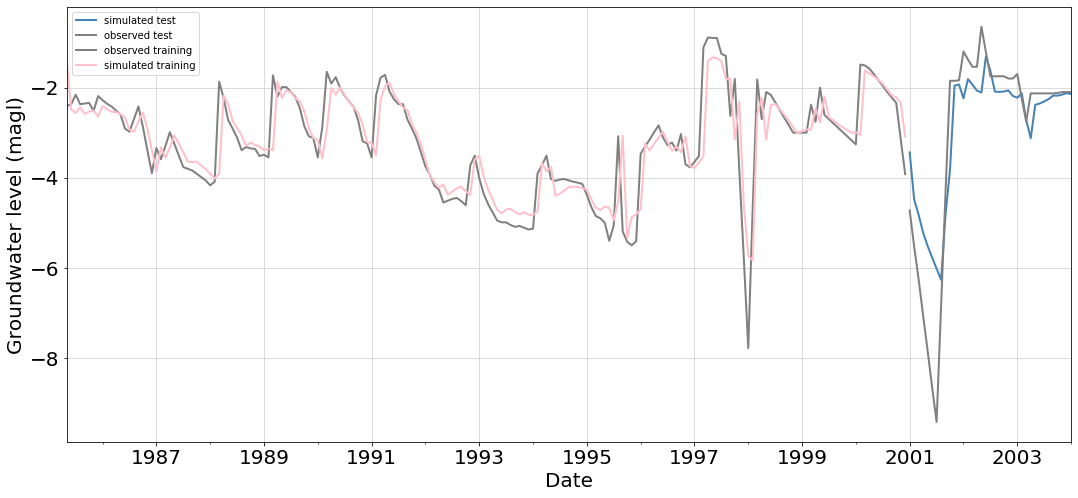

In [74]:
mse_gru = summary['mse_gru'].mean(axis=0)
rmse_gru= summary['rmse_gru'].mean(axis=0)
mae_gru = summary['mae_gru'].mean(axis=0)
r2_gru  = summary['r2_gru'].mean(axis=0)
stdv_gru= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gru, 3))
print("Mean squared error is:",round(mse_gru,3))
print("Root mean squared error is:",round(rmse_gru, 3))
print("Mean absolute error is:",round(mae_gru,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[188:225].index)
df1['observed test']      = pima.iloc[188:225, 0].values

df2 = pd.DataFrame(pima.iloc[0:188, 0].values, columns = ['observed training'],index =pima.iloc[0:188].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [75]:
y_gru = out_df['simulated test']

### FFNN

In [76]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(37, 6)

    #running function
    gwl = -1.11517948
    test_forecast = X_test
    steps_ahead = 37
    y_ff = forecast(model, test_forecast, gwl, steps_ahead)
    y_ff = np.array(y_ff)

     #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(188, 6)
Train on 188 samples, validate on 37 samples
Epoch 1/1000
 96/188 [==============>...............] - ETA: 2s - loss: 0.6323 - mean_squared_error: 0.6323
Epoch 00001: val_loss improved from inf to 2.34572, saving model to model.h5
188/188 [==============================] - 8s 41ms/sample - loss: 0.5691 - mean_squared_error: 0.5691 - val_loss: 2.3457 - val_mean_squared_error: 2.3457
Epoch 2/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3945 - mean_squared_error: 0.3945
Epoch 00002: val_loss improved from 2.34572 to 2.17445, saving model to model.h5
188/188 [==============================] - 0s 246us/sample - loss: 0.4685 - mean_squared_error: 0.4685 - val_loss: 2.1744 - val_mean_squared_error: 2.1744
Epoch 3/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4336 - mean_squared_error: 0.4336
Epoch 00003: val_loss improved from 2.17445 to 2.04270, saving model to model.h5
188/188 [==============================] - 0s 248us/sample 

Epoch 25/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1864 - mean_squared_error: 0.1864
Epoch 00025: val_loss did not improve from 1.08139
188/188 [==============================] - 0s 94us/sample - loss: 0.1876 - mean_squared_error: 0.1876 - val_loss: 1.0984 - val_mean_squared_error: 1.0984
Epoch 26/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1964 - mean_squared_error: 0.1964
Epoch 00026: val_loss did not improve from 1.08139
188/188 [==============================] - 0s 93us/sample - loss: 0.1967 - mean_squared_error: 0.1967 - val_loss: 1.1024 - val_mean_squared_error: 1.1024
Epoch 27/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2071 - mean_squared_error: 0.2071
Epoch 00027: val_loss improved from 1.08139 to 1.04205, saving model to model.h5
188/188 [==============================] - 0s 226us/sample - loss: 0.1869 - mean_squared_error: 0.1869 - val_loss: 1.0420 - val_mean_squared_error: 1.0420
Epoch 28/1000
 96/188 [====

Epoch 51/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1367 - mean_squared_error: 0.1367
Epoch 00051: val_loss improved from 1.01810 to 1.01787, saving model to model.h5
188/188 [==============================] - 0s 252us/sample - loss: 0.1624 - mean_squared_error: 0.1624 - val_loss: 1.0179 - val_mean_squared_error: 1.0179
Epoch 52/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2037 - mean_squared_error: 0.2037
Epoch 00052: val_loss did not improve from 1.01787
188/188 [==============================] - 0s 87us/sample - loss: 0.1821 - mean_squared_error: 0.1821 - val_loss: 1.0368 - val_mean_squared_error: 1.0368
Epoch 53/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1522 - mean_squared_error: 0.1522
Epoch 00053: val_loss did not improve from 1.01787
188/188 [==============================] - 0s 92us/sample - loss: 0.1724 - mean_squared_error: 0.1724 - val_loss: 1.0385 - val_mean_squared_error: 1.0385
Epoch 54/1000
 96/188 [====

Epoch 77/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1668 - mean_squared_error: 0.1668
Epoch 00077: val_loss did not improve from 0.99102
188/188 [==============================] - 0s 95us/sample - loss: 0.1685 - mean_squared_error: 0.1685 - val_loss: 1.0803 - val_mean_squared_error: 1.0803
Epoch 78/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1658 - mean_squared_error: 0.1658
Epoch 00078: val_loss did not improve from 0.99102
188/188 [==============================] - 0s 90us/sample - loss: 0.1784 - mean_squared_error: 0.1784 - val_loss: 1.0717 - val_mean_squared_error: 1.0717
Epoch 79/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1659 - mean_squared_error: 0.1659
Epoch 00079: val_loss did not improve from 0.99102
188/188 [==============================] - 0s 99us/sample - loss: 0.1590 - mean_squared_error: 0.1590 - val_loss: 1.0804 - val_mean_squared_error: 1.0804
Epoch 80/1000
 96/188 [==============>...............] - E

 96/188 [==============>...............] - ETA: 0s - loss: 0.1144 - mean_squared_error: 0.1144
Epoch 00103: val_loss did not improve from 0.99102
188/188 [==============================] - 0s 94us/sample - loss: 0.1647 - mean_squared_error: 0.1647 - val_loss: 1.2025 - val_mean_squared_error: 1.2025
Epoch 104/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1859 - mean_squared_error: 0.1859
Epoch 00104: val_loss did not improve from 0.99102
188/188 [==============================] - 0s 101us/sample - loss: 0.1549 - mean_squared_error: 0.1549 - val_loss: 1.1917 - val_mean_squared_error: 1.1917
Epoch 105/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2193 - mean_squared_error: 0.2193
Epoch 00105: val_loss did not improve from 0.99102
188/188 [==============================] - 0s 99us/sample - loss: 0.1588 - mean_squared_error: 0.1588 - val_loss: 1.1992 - val_mean_squared_error: 1.1992
Epoch 106/1000
 96/188 [==============>...............] - ETA: 0s - l

Epoch 129/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1510 - mean_squared_error: 0.1510
Epoch 00129: val_loss did not improve from 0.99102
188/188 [==============================] - 0s 118us/sample - loss: 0.1573 - mean_squared_error: 0.1573 - val_loss: 1.3777 - val_mean_squared_error: 1.3777
Epoch 130/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1161 - mean_squared_error: 0.1161
Epoch 00130: val_loss did not improve from 0.99102
188/188 [==============================] - 0s 103us/sample - loss: 0.1540 - mean_squared_error: 0.1540 - val_loss: 1.3901 - val_mean_squared_error: 1.3901
Epoch 131/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1576 - mean_squared_error: 0.1576
Epoch 00131: val_loss did not improve from 0.99102
188/188 [==============================] - 0s 107us/sample - loss: 0.1619 - mean_squared_error: 0.1619 - val_loss: 1.4000 - val_mean_squared_error: 1.4000
Epoch 132/1000
 96/188 [==============>.............

Epoch 155/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1892 - mean_squared_error: 0.1892
Epoch 00155: val_loss did not improve from 0.99102
188/188 [==============================] - 0s 112us/sample - loss: 0.1515 - mean_squared_error: 0.1515 - val_loss: 1.5210 - val_mean_squared_error: 1.5210
Epoch 156/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1226 - mean_squared_error: 0.1226
Epoch 00156: val_loss did not improve from 0.99102
188/188 [==============================] - 0s 102us/sample - loss: 0.1564 - mean_squared_error: 0.1564 - val_loss: 1.5319 - val_mean_squared_error: 1.5319
Epoch 157/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1725 - mean_squared_error: 0.1725
Epoch 00157: val_loss did not improve from 0.99102
188/188 [==============================] - 0s 118us/sample - loss: 0.1541 - mean_squared_error: 0.1541 - val_loss: 1.5735 - val_mean_squared_error: 1.5735
Epoch 158/1000
 96/188 [==============>.............

 96/188 [==============>...............] - ETA: 0s - loss: 0.1754 - mean_squared_error: 0.1754
Epoch 00020: val_loss did not improve from 1.30980
188/188 [==============================] - 0s 95us/sample - loss: 0.1731 - mean_squared_error: 0.1731 - val_loss: 1.3107 - val_mean_squared_error: 1.3107
Epoch 21/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1649 - mean_squared_error: 0.1649
Epoch 00021: val_loss improved from 1.30980 to 1.27662, saving model to model.h5
188/188 [==============================] - 0s 296us/sample - loss: 0.1758 - mean_squared_error: 0.1758 - val_loss: 1.2766 - val_mean_squared_error: 1.2766
Epoch 22/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2167 - mean_squared_error: 0.2167
Epoch 00022: val_loss did not improve from 1.27662
188/188 [==============================] - 0s 101us/sample - loss: 0.1734 - mean_squared_error: 0.1734 - val_loss: 1.2843 - val_mean_squared_error: 1.2843
Epoch 23/1000
 96/188 [==============>..

Epoch 46/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1168 - mean_squared_error: 0.1168
Epoch 00046: val_loss did not improve from 1.21525
188/188 [==============================] - 0s 115us/sample - loss: 0.1547 - mean_squared_error: 0.1547 - val_loss: 1.3002 - val_mean_squared_error: 1.3002
Epoch 47/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 00047: val_loss did not improve from 1.21525
188/188 [==============================] - 0s 101us/sample - loss: 0.1535 - mean_squared_error: 0.1535 - val_loss: 1.2933 - val_mean_squared_error: 1.2933
Epoch 48/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1384 - mean_squared_error: 0.1384
Epoch 00048: val_loss did not improve from 1.21525
188/188 [==============================] - 0s 107us/sample - loss: 0.1558 - mean_squared_error: 0.1558 - val_loss: 1.2553 - val_mean_squared_error: 1.2553
Epoch 49/1000
 96/188 [==============>...............] 

 96/188 [==============>...............] - ETA: 0s - loss: 0.0897 - mean_squared_error: 0.0897
Epoch 00072: val_loss did not improve from 1.21525
188/188 [==============================] - 0s 107us/sample - loss: 0.1436 - mean_squared_error: 0.1436 - val_loss: 1.4282 - val_mean_squared_error: 1.4282
Epoch 73/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1388 - mean_squared_error: 0.1388
Epoch 00073: val_loss did not improve from 1.21525
188/188 [==============================] - 0s 102us/sample - loss: 0.1486 - mean_squared_error: 0.1486 - val_loss: 1.4575 - val_mean_squared_error: 1.4575
Epoch 74/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1750 - mean_squared_error: 0.1750
Epoch 00074: val_loss did not improve from 1.21525
188/188 [==============================] - 0s 103us/sample - loss: 0.1634 - mean_squared_error: 0.1634 - val_loss: 1.4451 - val_mean_squared_error: 1.4451
Epoch 75/1000
 96/188 [==============>...............] - ETA: 0s - lo

 96/188 [==============>...............] - ETA: 0s - loss: 0.1341 - mean_squared_error: 0.1341
Epoch 00098: val_loss did not improve from 1.21525
188/188 [==============================] - 0s 110us/sample - loss: 0.1550 - mean_squared_error: 0.1550 - val_loss: 1.5819 - val_mean_squared_error: 1.5819
Epoch 99/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1304 - mean_squared_error: 0.1304
Epoch 00099: val_loss did not improve from 1.21525
188/188 [==============================] - 0s 114us/sample - loss: 0.1440 - mean_squared_error: 0.1440 - val_loss: 1.5914 - val_mean_squared_error: 1.5914
Epoch 100/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1237 - mean_squared_error: 0.1237
Epoch 00100: val_loss did not improve from 1.21525
188/188 [==============================] - 0s 115us/sample - loss: 0.1435 - mean_squared_error: 0.1435 - val_loss: 1.5861 - val_mean_squared_error: 1.5861
Epoch 101/1000
 96/188 [==============>...............] - ETA: 0s - 

Epoch 124/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1435 - mean_squared_error: 0.1435
Epoch 00124: val_loss did not improve from 1.21525
188/188 [==============================] - 0s 122us/sample - loss: 0.1396 - mean_squared_error: 0.1396 - val_loss: 1.6915 - val_mean_squared_error: 1.6915
Epoch 125/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1246 - mean_squared_error: 0.1246
Epoch 00125: val_loss did not improve from 1.21525
188/188 [==============================] - 0s 127us/sample - loss: 0.1340 - mean_squared_error: 0.1340 - val_loss: 1.6794 - val_mean_squared_error: 1.6794
Epoch 126/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1221 - mean_squared_error: 0.1221
Epoch 00126: val_loss did not improve from 1.21525
188/188 [==============================] - 0s 124us/sample - loss: 0.1573 - mean_squared_error: 0.1573 - val_loss: 1.6759 - val_mean_squared_error: 1.6759
Epoch 127/1000
 96/188 [==============>.............

Epoch 13/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2551 - mean_squared_error: 0.2551
Epoch 00013: val_loss improved from 2.13352 to 2.05230, saving model to model.h5
188/188 [==============================] - 0s 394us/sample - loss: 0.2924 - mean_squared_error: 0.2924 - val_loss: 2.0523 - val_mean_squared_error: 2.0523
Epoch 14/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3164 - mean_squared_error: 0.3164
Epoch 00014: val_loss improved from 2.05230 to 1.97950, saving model to model.h5
188/188 [==============================] - 0s 450us/sample - loss: 0.2794 - mean_squared_error: 0.2794 - val_loss: 1.9795 - val_mean_squared_error: 1.9795
Epoch 15/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2176 - mean_squared_error: 0.2176
Epoch 00015: val_loss improved from 1.97950 to 1.91632, saving model to model.h5
188/188 [==============================] - 0s 466us/sample - loss: 0.2620 - mean_squared_error: 0.2620 - val_loss: 1.916

Epoch 38/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1446 - mean_squared_error: 0.1446
Epoch 00038: val_loss did not improve from 1.42404
188/188 [==============================] - 0s 109us/sample - loss: 0.1542 - mean_squared_error: 0.1542 - val_loss: 1.4338 - val_mean_squared_error: 1.4338
Epoch 39/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1193 - mean_squared_error: 0.1193
Epoch 00039: val_loss did not improve from 1.42404
188/188 [==============================] - 0s 107us/sample - loss: 0.1472 - mean_squared_error: 0.1472 - val_loss: 1.5353 - val_mean_squared_error: 1.5353
Epoch 40/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1251 - mean_squared_error: 0.1251
Epoch 00040: val_loss did not improve from 1.42404
188/188 [==============================] - 0s 115us/sample - loss: 0.1453 - mean_squared_error: 0.1453 - val_loss: 1.5215 - val_mean_squared_error: 1.5215
Epoch 41/1000
 96/188 [==============>...............] 

 96/188 [==============>...............] - ETA: 0s - loss: 0.0841 - mean_squared_error: 0.0841
Epoch 00064: val_loss did not improve from 1.42404
188/188 [==============================] - 0s 113us/sample - loss: 0.1571 - mean_squared_error: 0.1571 - val_loss: 1.6780 - val_mean_squared_error: 1.6780
Epoch 65/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1727 - mean_squared_error: 0.1727
Epoch 00065: val_loss did not improve from 1.42404
188/188 [==============================] - 0s 120us/sample - loss: 0.1571 - mean_squared_error: 0.1571 - val_loss: 1.6526 - val_mean_squared_error: 1.6526
Epoch 66/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1630 - mean_squared_error: 0.1630
Epoch 00066: val_loss did not improve from 1.42404
188/188 [==============================] - 0s 114us/sample - loss: 0.1454 - mean_squared_error: 0.1454 - val_loss: 1.6978 - val_mean_squared_error: 1.6978
Epoch 67/1000
 96/188 [==============>...............] - ETA: 0s - lo

 96/188 [==============>...............] - ETA: 0s - loss: 0.1094 - mean_squared_error: 0.1094
Epoch 00090: val_loss did not improve from 1.42404
188/188 [==============================] - 0s 118us/sample - loss: 0.1559 - mean_squared_error: 0.1559 - val_loss: 1.6994 - val_mean_squared_error: 1.6994
Epoch 91/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1270 - mean_squared_error: 0.1270
Epoch 00091: val_loss did not improve from 1.42404
188/188 [==============================] - 0s 124us/sample - loss: 0.1347 - mean_squared_error: 0.1347 - val_loss: 1.6913 - val_mean_squared_error: 1.6913
Epoch 92/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1292 - mean_squared_error: 0.1292
Epoch 00092: val_loss did not improve from 1.42404
188/188 [==============================] - 0s 129us/sample - loss: 0.1577 - mean_squared_error: 0.1577 - val_loss: 1.6618 - val_mean_squared_error: 1.6618
Epoch 93/1000
 96/188 [==============>...............] - ETA: 0s - lo

 96/188 [==============>...............] - ETA: 0s - loss: 0.1695 - mean_squared_error: 0.1695
Epoch 00116: val_loss did not improve from 1.42404
188/188 [==============================] - 0s 136us/sample - loss: 0.1578 - mean_squared_error: 0.1578 - val_loss: 1.7676 - val_mean_squared_error: 1.7676
Epoch 117/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1355 - mean_squared_error: 0.1355
Epoch 00117: val_loss did not improve from 1.42404
188/188 [==============================] - 0s 122us/sample - loss: 0.1477 - mean_squared_error: 0.1477 - val_loss: 1.7464 - val_mean_squared_error: 1.7464
Epoch 118/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1374 - mean_squared_error: 0.1374
Epoch 00118: val_loss did not improve from 1.42404
188/188 [==============================] - 0s 126us/sample - loss: 0.1507 - mean_squared_error: 0.1507 - val_loss: 1.7605 - val_mean_squared_error: 1.7605
Epoch 119/1000
 96/188 [==============>...............] - ETA: 0s -

 96/188 [==============>...............] - ETA: 0s - loss: 0.4179 - mean_squared_error: 0.4179
Epoch 00009: val_loss improved from 2.44894 to 2.35573, saving model to model.h5
188/188 [==============================] - 0s 444us/sample - loss: 0.3933 - mean_squared_error: 0.3933 - val_loss: 2.3557 - val_mean_squared_error: 2.3557
Epoch 10/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4249 - mean_squared_error: 0.4249
Epoch 00010: val_loss improved from 2.35573 to 2.28171, saving model to model.h5
188/188 [==============================] - 0s 508us/sample - loss: 0.3548 - mean_squared_error: 0.3548 - val_loss: 2.2817 - val_mean_squared_error: 2.2817
Epoch 11/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2862 - mean_squared_error: 0.2862
Epoch 00011: val_loss improved from 2.28171 to 2.22864, saving model to model.h5
188/188 [==============================] - 0s 470us/sample - loss: 0.3257 - mean_squared_error: 0.3257 - val_loss: 2.2286 - val_mean_s

Epoch 34/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 00034: val_loss improved from 1.73997 to 1.71035, saving model to model.h5
188/188 [==============================] - 0s 434us/sample - loss: 0.1432 - mean_squared_error: 0.1432 - val_loss: 1.7103 - val_mean_squared_error: 1.7103
Epoch 35/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.0793 - mean_squared_error: 0.0793
Epoch 00035: val_loss did not improve from 1.71035
188/188 [==============================] - 0s 119us/sample - loss: 0.1383 - mean_squared_error: 0.1383 - val_loss: 1.7631 - val_mean_squared_error: 1.7631
Epoch 36/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1345 - mean_squared_error: 0.1345
Epoch 00036: val_loss did not improve from 1.71035
188/188 [==============================] - 0s 115us/sample - loss: 0.1479 - mean_squared_error: 0.1479 - val_loss: 1.8079 - val_mean_squared_error: 1.8079
Epoch 37/1000
 96/188 [==

Epoch 60/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1300 - mean_squared_error: 0.1300
Epoch 00060: val_loss did not improve from 1.70238
188/188 [==============================] - 0s 122us/sample - loss: 0.1405 - mean_squared_error: 0.1405 - val_loss: 1.8002 - val_mean_squared_error: 1.8002
Epoch 61/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1366 - mean_squared_error: 0.1366
Epoch 00061: val_loss did not improve from 1.70238
188/188 [==============================] - 0s 141us/sample - loss: 0.1390 - mean_squared_error: 0.1390 - val_loss: 1.7522 - val_mean_squared_error: 1.7522
Epoch 62/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1760 - mean_squared_error: 0.1760
Epoch 00062: val_loss did not improve from 1.70238
188/188 [==============================] - 0s 138us/sample - loss: 0.1352 - mean_squared_error: 0.1352 - val_loss: 1.7535 - val_mean_squared_error: 1.7535
Epoch 63/1000
 96/188 [==============>...............] 

 96/188 [==============>...............] - ETA: 0s - loss: 0.1923 - mean_squared_error: 0.1923
Epoch 00086: val_loss did not improve from 1.70238
188/188 [==============================] - 0s 147us/sample - loss: 0.1432 - mean_squared_error: 0.1432 - val_loss: 1.7647 - val_mean_squared_error: 1.7647
Epoch 87/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1443 - mean_squared_error: 0.1443
Epoch 00087: val_loss did not improve from 1.70238
188/188 [==============================] - 0s 152us/sample - loss: 0.1524 - mean_squared_error: 0.1524 - val_loss: 1.7857 - val_mean_squared_error: 1.7857
Epoch 88/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1657 - mean_squared_error: 0.1657
Epoch 00088: val_loss did not improve from 1.70238
188/188 [==============================] - 0s 162us/sample - loss: 0.1409 - mean_squared_error: 0.1409 - val_loss: 1.8173 - val_mean_squared_error: 1.8173
Epoch 89/1000
 96/188 [==============>...............] - ETA: 0s - lo

 96/188 [==============>...............] - ETA: 0s - loss: 0.1602 - mean_squared_error: 0.1602
Epoch 00112: val_loss did not improve from 1.70238
188/188 [==============================] - 0s 130us/sample - loss: 0.1474 - mean_squared_error: 0.1474 - val_loss: 1.7767 - val_mean_squared_error: 1.7767
Epoch 113/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1737 - mean_squared_error: 0.1737
Epoch 00113: val_loss did not improve from 1.70238
188/188 [==============================] - 0s 149us/sample - loss: 0.1431 - mean_squared_error: 0.1431 - val_loss: 1.8051 - val_mean_squared_error: 1.8051
Epoch 114/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1329 - mean_squared_error: 0.1329
Epoch 00114: val_loss did not improve from 1.70238
188/188 [==============================] - 0s 146us/sample - loss: 0.1423 - mean_squared_error: 0.1423 - val_loss: 1.8599 - val_mean_squared_error: 1.8599
Epoch 115/1000
 96/188 [==============>...............] - ETA: 0s -

Epoch 138/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1469 - mean_squared_error: 0.1469
Epoch 00138: val_loss did not improve from 1.70238
188/188 [==============================] - 0s 133us/sample - loss: 0.1462 - mean_squared_error: 0.1462 - val_loss: 1.8193 - val_mean_squared_error: 1.8193
Epoch 139/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1396 - mean_squared_error: 0.1396
Epoch 00139: val_loss did not improve from 1.70238
188/188 [==============================] - 0s 133us/sample - loss: 0.1347 - mean_squared_error: 0.1347 - val_loss: 1.8348 - val_mean_squared_error: 1.8348
Epoch 140/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1416 - mean_squared_error: 0.1416
Epoch 00140: val_loss did not improve from 1.70238
188/188 [==============================] - 0s 136us/sample - loss: 0.1323 - mean_squared_error: 0.1323 - val_loss: 1.8404 - val_mean_squared_error: 1.8404
Epoch 141/1000
 96/188 [==============>.............

Epoch 22/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1236 - mean_squared_error: 0.1236
Epoch 00022: val_loss did not improve from 1.63094
188/188 [==============================] - 0s 125us/sample - loss: 0.1480 - mean_squared_error: 0.1480 - val_loss: 1.7017 - val_mean_squared_error: 1.7017
Epoch 23/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1502 - mean_squared_error: 0.1502
Epoch 00023: val_loss did not improve from 1.63094
188/188 [==============================] - 0s 119us/sample - loss: 0.1384 - mean_squared_error: 0.1384 - val_loss: 1.7890 - val_mean_squared_error: 1.7890
Epoch 24/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1622 - mean_squared_error: 0.1622
Epoch 00024: val_loss did not improve from 1.63094
188/188 [==============================] - 0s 133us/sample - loss: 0.1394 - mean_squared_error: 0.1394 - val_loss: 1.7571 - val_mean_squared_error: 1.7571
Epoch 25/1000
 96/188 [==============>...............] 

 96/188 [==============>...............] - ETA: 0s - loss: 0.1720 - mean_squared_error: 0.1720
Epoch 00048: val_loss did not improve from 1.63094
188/188 [==============================] - 0s 128us/sample - loss: 0.1375 - mean_squared_error: 0.1375 - val_loss: 1.8811 - val_mean_squared_error: 1.8811
Epoch 49/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1452 - mean_squared_error: 0.1452
Epoch 00049: val_loss did not improve from 1.63094
188/188 [==============================] - 0s 129us/sample - loss: 0.1282 - mean_squared_error: 0.1282 - val_loss: 1.8181 - val_mean_squared_error: 1.8181
Epoch 50/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2035 - mean_squared_error: 0.2035
Epoch 00050: val_loss did not improve from 1.63094
188/188 [==============================] - 0s 128us/sample - loss: 0.1479 - mean_squared_error: 0.1479 - val_loss: 1.8427 - val_mean_squared_error: 1.8427
Epoch 51/1000
 96/188 [==============>...............] - ETA: 0s - lo

 96/188 [==============>...............] - ETA: 0s - loss: 0.1795 - mean_squared_error: 0.1795
Epoch 00074: val_loss did not improve from 1.63094
188/188 [==============================] - 0s 163us/sample - loss: 0.1474 - mean_squared_error: 0.1474 - val_loss: 1.8620 - val_mean_squared_error: 1.8620
Epoch 75/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1217 - mean_squared_error: 0.1217
Epoch 00075: val_loss did not improve from 1.63094
188/188 [==============================] - 0s 143us/sample - loss: 0.1256 - mean_squared_error: 0.1256 - val_loss: 1.8596 - val_mean_squared_error: 1.8596
Epoch 76/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1107 - mean_squared_error: 0.1107
Epoch 00076: val_loss did not improve from 1.63094
188/188 [==============================] - 0s 133us/sample - loss: 0.1353 - mean_squared_error: 0.1353 - val_loss: 1.8997 - val_mean_squared_error: 1.8997
Epoch 77/1000
 96/188 [==============>...............] - ETA: 0s - lo

 96/188 [==============>...............] - ETA: 0s - loss: 0.1885 - mean_squared_error: 0.1885
Epoch 00100: val_loss did not improve from 1.63094
188/188 [==============================] - 0s 146us/sample - loss: 0.1352 - mean_squared_error: 0.1352 - val_loss: 1.8808 - val_mean_squared_error: 1.8808
Epoch 101/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1523 - mean_squared_error: 0.1523
Epoch 00101: val_loss did not improve from 1.63094
188/188 [==============================] - 0s 147us/sample - loss: 0.1415 - mean_squared_error: 0.1415 - val_loss: 1.8719 - val_mean_squared_error: 1.8719
Epoch 102/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1620 - mean_squared_error: 0.1620
Epoch 00102: val_loss did not improve from 1.63094
188/188 [==============================] - 0s 137us/sample - loss: 0.1382 - mean_squared_error: 0.1382 - val_loss: 1.9108 - val_mean_squared_error: 1.9108
Epoch 103/1000
 96/188 [==============>...............] - ETA: 0s -

 96/188 [==============>...............] - ETA: 0s - loss: 0.1213 - mean_squared_error: 0.1213
Epoch 00011: val_loss did not improve from 1.72799
188/188 [==============================] - 0s 160us/sample - loss: 0.1429 - mean_squared_error: 0.1429 - val_loss: 1.8232 - val_mean_squared_error: 1.8232
Epoch 12/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1696 - mean_squared_error: 0.1696
Epoch 00012: val_loss did not improve from 1.72799
188/188 [==============================] - 0s 153us/sample - loss: 0.1493 - mean_squared_error: 0.1493 - val_loss: 1.8773 - val_mean_squared_error: 1.8773
Epoch 13/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1764 - mean_squared_error: 0.1764
Epoch 00013: val_loss improved from 1.72799 to 1.71452, saving model to model.h5
188/188 [==============================] - 0s 614us/sample - loss: 0.1417 - mean_squared_error: 0.1417 - val_loss: 1.7145 - val_mean_squared_error: 1.7145
Epoch 14/1000
 96/188 [==============>.

Epoch 37/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1311 - mean_squared_error: 0.1311
Epoch 00037: val_loss did not improve from 1.71452
188/188 [==============================] - 0s 141us/sample - loss: 0.1484 - mean_squared_error: 0.1484 - val_loss: 1.9159 - val_mean_squared_error: 1.9159
Epoch 38/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2047 - mean_squared_error: 0.2047
Epoch 00038: val_loss did not improve from 1.71452
188/188 [==============================] - 0s 183us/sample - loss: 0.1415 - mean_squared_error: 0.1415 - val_loss: 1.8379 - val_mean_squared_error: 1.8379
Epoch 39/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1406 - mean_squared_error: 0.1406
Epoch 00039: val_loss did not improve from 1.71452
188/188 [==============================] - 0s 134us/sample - loss: 0.1334 - mean_squared_error: 0.1334 - val_loss: 1.8272 - val_mean_squared_error: 1.8272
Epoch 40/1000
 96/188 [==============>...............] 

 96/188 [==============>...............] - ETA: 0s - loss: 0.1760 - mean_squared_error: 0.1760
Epoch 00063: val_loss did not improve from 1.71452
188/188 [==============================] - 0s 145us/sample - loss: 0.1373 - mean_squared_error: 0.1373 - val_loss: 1.8872 - val_mean_squared_error: 1.8872
Epoch 64/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1096 - mean_squared_error: 0.1096
Epoch 00064: val_loss did not improve from 1.71452
188/188 [==============================] - 0s 150us/sample - loss: 0.1337 - mean_squared_error: 0.1337 - val_loss: 1.8600 - val_mean_squared_error: 1.8600
Epoch 65/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1599 - mean_squared_error: 0.1599
Epoch 00065: val_loss did not improve from 1.71452
188/188 [==============================] - 0s 152us/sample - loss: 0.1402 - mean_squared_error: 0.1402 - val_loss: 1.9376 - val_mean_squared_error: 1.9376
Epoch 66/1000
 96/188 [==============>...............] - ETA: 0s - lo

 96/188 [==============>...............] - ETA: 0s - loss: 0.1484 - mean_squared_error: 0.1484
Epoch 00089: val_loss did not improve from 1.71452
188/188 [==============================] - 0s 159us/sample - loss: 0.1573 - mean_squared_error: 0.1573 - val_loss: 1.8545 - val_mean_squared_error: 1.8545
Epoch 90/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1116 - mean_squared_error: 0.1116
Epoch 00090: val_loss did not improve from 1.71452
188/188 [==============================] - 0s 160us/sample - loss: 0.1325 - mean_squared_error: 0.1325 - val_loss: 1.9090 - val_mean_squared_error: 1.9090
Epoch 91/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1542 - mean_squared_error: 0.1542
Epoch 00091: val_loss did not improve from 1.71452
188/188 [==============================] - 0s 153us/sample - loss: 0.1431 - mean_squared_error: 0.1431 - val_loss: 1.8367 - val_mean_squared_error: 1.8367
Epoch 92/1000
 96/188 [==============>...............] - ETA: 0s - lo

Epoch 2/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3856 - mean_squared_error: 0.3856
Epoch 00002: val_loss improved from 2.51455 to 2.30357, saving model to model.h5
188/188 [==============================] - 0s 702us/sample - loss: 0.3459 - mean_squared_error: 0.3459 - val_loss: 2.3036 - val_mean_squared_error: 2.3036
Epoch 3/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3360 - mean_squared_error: 0.3360
Epoch 00003: val_loss improved from 2.30357 to 2.28684, saving model to model.h5
188/188 [==============================] - 0s 703us/sample - loss: 0.2796 - mean_squared_error: 0.2796 - val_loss: 2.2868 - val_mean_squared_error: 2.2868
Epoch 4/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2626 - mean_squared_error: 0.2626
Epoch 00004: val_loss improved from 2.28684 to 2.08585, saving model to model.h5
188/188 [==============================] - 0s 693us/sample - loss: 0.2453 - mean_squared_error: 0.2453 - val_loss: 2.0858 -

Epoch 28/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1567 - mean_squared_error: 0.1567
Epoch 00028: val_loss did not improve from 1.81047
188/188 [==============================] - 0s 214us/sample - loss: 0.1436 - mean_squared_error: 0.1436 - val_loss: 1.9275 - val_mean_squared_error: 1.9275
Epoch 29/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1312 - mean_squared_error: 0.1312
Epoch 00029: val_loss did not improve from 1.81047
188/188 [==============================] - 0s 200us/sample - loss: 0.1288 - mean_squared_error: 0.1288 - val_loss: 1.8517 - val_mean_squared_error: 1.8517
Epoch 30/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1312 - mean_squared_error: 0.1312
Epoch 00030: val_loss did not improve from 1.81047
188/188 [==============================] - 0s 152us/sample - loss: 0.1483 - mean_squared_error: 0.1483 - val_loss: 1.8821 - val_mean_squared_error: 1.8821
Epoch 31/1000
 96/188 [==============>...............] 

 96/188 [==============>...............] - ETA: 0s - loss: 0.1698 - mean_squared_error: 0.1698
Epoch 00054: val_loss did not improve from 1.81047
188/188 [==============================] - 0s 165us/sample - loss: 0.1374 - mean_squared_error: 0.1374 - val_loss: 1.8898 - val_mean_squared_error: 1.8898
Epoch 55/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 00055: val_loss did not improve from 1.81047
188/188 [==============================] - 0s 156us/sample - loss: 0.1330 - mean_squared_error: 0.1330 - val_loss: 1.8993 - val_mean_squared_error: 1.8993
Epoch 56/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1370 - mean_squared_error: 0.1370
Epoch 00056: val_loss did not improve from 1.81047
188/188 [==============================] - 0s 155us/sample - loss: 0.1438 - mean_squared_error: 0.1438 - val_loss: 1.8847 - val_mean_squared_error: 1.8847
Epoch 57/1000
 96/188 [==============>...............] - ETA: 0s - lo

 96/188 [==============>...............] - ETA: 0s - loss: 0.1646 - mean_squared_error: 0.1646
Epoch 00080: val_loss did not improve from 1.81047
188/188 [==============================] - 0s 164us/sample - loss: 0.1321 - mean_squared_error: 0.1321 - val_loss: 1.8712 - val_mean_squared_error: 1.8712
Epoch 81/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1165 - mean_squared_error: 0.1165
Epoch 00081: val_loss did not improve from 1.81047
188/188 [==============================] - 0s 163us/sample - loss: 0.1316 - mean_squared_error: 0.1316 - val_loss: 1.9202 - val_mean_squared_error: 1.9202
Epoch 82/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1363 - mean_squared_error: 0.1363
Epoch 00082: val_loss did not improve from 1.81047
188/188 [==============================] - 0s 156us/sample - loss: 0.1489 - mean_squared_error: 0.1489 - val_loss: 1.9348 - val_mean_squared_error: 1.9348
Epoch 83/1000
 96/188 [==============>...............] - ETA: 0s - lo

 96/188 [==============>...............] - ETA: 0s - loss: 0.1170 - mean_squared_error: 0.1170
Epoch 00106: val_loss did not improve from 1.81047
188/188 [==============================] - 0s 179us/sample - loss: 0.1413 - mean_squared_error: 0.1413 - val_loss: 1.9119 - val_mean_squared_error: 1.9119
Epoch 107/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1184 - mean_squared_error: 0.1184
Epoch 00107: val_loss did not improve from 1.81047
188/188 [==============================] - 0s 170us/sample - loss: 0.1343 - mean_squared_error: 0.1343 - val_loss: 1.9129 - val_mean_squared_error: 1.9129
Epoch 108/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 00108: val_loss did not improve from 1.81047
188/188 [==============================] - 0s 168us/sample - loss: 0.1276 - mean_squared_error: 0.1276 - val_loss: 1.9463 - val_mean_squared_error: 1.9463
Epoch 109/1000
 96/188 [==============>...............] - ETA: 0s -

Epoch 17/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.4135 - mean_squared_error: 0.4135
Epoch 00017: val_loss did not improve from 2.08186
188/188 [==============================] - 0s 149us/sample - loss: 0.3797 - mean_squared_error: 0.3797 - val_loss: 2.1031 - val_mean_squared_error: 2.1031
Epoch 18/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.2958 - mean_squared_error: 0.2958
Epoch 00018: val_loss improved from 2.08186 to 2.06599, saving model to model.h5
188/188 [==============================] - 0s 762us/sample - loss: 0.3612 - mean_squared_error: 0.3612 - val_loss: 2.0660 - val_mean_squared_error: 2.0660
Epoch 19/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.3384 - mean_squared_error: 0.3384
Epoch 00019: val_loss improved from 2.06599 to 2.03760, saving model to model.h5
188/188 [==============================] - 0s 925us/sample - loss: 0.3452 - mean_squared_error: 0.3452 - val_loss: 2.0376 - val_mean_squared_error: 2.

 96/188 [==============>...............] - ETA: 0s - loss: 0.1430 - mean_squared_error: 0.1430
Epoch 00042: val_loss did not improve from 1.74599
188/188 [==============================] - 0s 175us/sample - loss: 0.1486 - mean_squared_error: 0.1486 - val_loss: 1.7993 - val_mean_squared_error: 1.7993
Epoch 43/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1650 - mean_squared_error: 0.1650
Epoch 00043: val_loss did not improve from 1.74599
188/188 [==============================] - 0s 187us/sample - loss: 0.1321 - mean_squared_error: 0.1321 - val_loss: 1.8124 - val_mean_squared_error: 1.8124
Epoch 44/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.0955 - mean_squared_error: 0.0955
Epoch 00044: val_loss did not improve from 1.74599
188/188 [==============================] - 0s 206us/sample - loss: 0.1265 - mean_squared_error: 0.1265 - val_loss: 1.8628 - val_mean_squared_error: 1.8628
Epoch 45/1000
 96/188 [==============>...............] - ETA: 0s - lo

 96/188 [==============>...............] - ETA: 0s - loss: 0.0937 - mean_squared_error: 0.0937
Epoch 00068: val_loss did not improve from 1.74599
188/188 [==============================] - 0s 223us/sample - loss: 0.1448 - mean_squared_error: 0.1448 - val_loss: 1.8730 - val_mean_squared_error: 1.8730
Epoch 69/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.0867 - mean_squared_error: 0.0867
Epoch 00069: val_loss did not improve from 1.74599
188/188 [==============================] - 0s 175us/sample - loss: 0.1299 - mean_squared_error: 0.1299 - val_loss: 1.8358 - val_mean_squared_error: 1.8358
Epoch 70/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1182 - mean_squared_error: 0.1182
Epoch 00070: val_loss did not improve from 1.74599
188/188 [==============================] - 0s 176us/sample - loss: 0.1429 - mean_squared_error: 0.1429 - val_loss: 1.8131 - val_mean_squared_error: 1.8131
Epoch 71/1000
 96/188 [==============>...............] - ETA: 0s - lo

 96/188 [==============>...............] - ETA: 0s - loss: 0.1587 - mean_squared_error: 0.1587
Epoch 00094: val_loss did not improve from 1.74599
188/188 [==============================] - 0s 181us/sample - loss: 0.1399 - mean_squared_error: 0.1399 - val_loss: 1.9281 - val_mean_squared_error: 1.9281
Epoch 95/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.0896 - mean_squared_error: 0.0896
Epoch 00095: val_loss did not improve from 1.74599
188/188 [==============================] - 0s 188us/sample - loss: 0.1343 - mean_squared_error: 0.1343 - val_loss: 1.9841 - val_mean_squared_error: 1.9841
Epoch 96/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1598 - mean_squared_error: 0.1598
Epoch 00096: val_loss did not improve from 1.74599
188/188 [==============================] - 0s 176us/sample - loss: 0.1311 - mean_squared_error: 0.1311 - val_loss: 1.9424 - val_mean_squared_error: 1.9424
Epoch 97/1000
 96/188 [==============>...............] - ETA: 0s - lo

Epoch 120/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1514 - mean_squared_error: 0.1514
Epoch 00120: val_loss did not improve from 1.74599
188/188 [==============================] - 0s 213us/sample - loss: 0.1370 - mean_squared_error: 0.1370 - val_loss: 1.9935 - val_mean_squared_error: 1.9935
Epoch 121/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.0929 - mean_squared_error: 0.0929
Epoch 00121: val_loss did not improve from 1.74599
188/188 [==============================] - 0s 225us/sample - loss: 0.1495 - mean_squared_error: 0.1495 - val_loss: 2.0299 - val_mean_squared_error: 2.0299
Epoch 122/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1350 - mean_squared_error: 0.1350
Epoch 00122: val_loss did not improve from 1.74599
188/188 [==============================] - 0s 238us/sample - loss: 0.1339 - mean_squared_error: 0.1339 - val_loss: 1.9700 - val_mean_squared_error: 1.9700
Epoch 123/1000
 96/188 [==============>.............

Epoch 18/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1737 - mean_squared_error: 0.1737
Epoch 00018: val_loss did not improve from 1.91578
188/188 [==============================] - 0s 263us/sample - loss: 0.1542 - mean_squared_error: 0.1542 - val_loss: 1.9429 - val_mean_squared_error: 1.9429
Epoch 19/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1780 - mean_squared_error: 0.1780
Epoch 00019: val_loss did not improve from 1.91578
188/188 [==============================] - 0s 221us/sample - loss: 0.1555 - mean_squared_error: 0.1555 - val_loss: 1.9427 - val_mean_squared_error: 1.9427
Epoch 20/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1175 - mean_squared_error: 0.1175
Epoch 00020: val_loss did not improve from 1.91578
188/188 [==============================] - 0s 185us/sample - loss: 0.1362 - mean_squared_error: 0.1362 - val_loss: 1.9903 - val_mean_squared_error: 1.9903
Epoch 21/1000
 96/188 [==============>...............] 

Epoch 44/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1650 - mean_squared_error: 0.1650
Epoch 00044: val_loss did not improve from 1.91260
188/188 [==============================] - 0s 252us/sample - loss: 0.1472 - mean_squared_error: 0.1472 - val_loss: 2.0055 - val_mean_squared_error: 2.0055
Epoch 45/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1250 - mean_squared_error: 0.1250
Epoch 00045: val_loss did not improve from 1.91260
188/188 [==============================] - 0s 332us/sample - loss: 0.1477 - mean_squared_error: 0.1477 - val_loss: 2.0341 - val_mean_squared_error: 2.0341
Epoch 46/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1725 - mean_squared_error: 0.1725
Epoch 00046: val_loss did not improve from 1.91260
188/188 [==============================] - 0s 217us/sample - loss: 0.1385 - mean_squared_error: 0.1385 - val_loss: 2.0325 - val_mean_squared_error: 2.0325
Epoch 47/1000
 96/188 [==============>...............] 

Epoch 70/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1488 - mean_squared_error: 0.1488
Epoch 00070: val_loss did not improve from 1.88553
188/188 [==============================] - 0s 209us/sample - loss: 0.1407 - mean_squared_error: 0.1407 - val_loss: 1.9895 - val_mean_squared_error: 1.9895
Epoch 71/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1302 - mean_squared_error: 0.1302
Epoch 00071: val_loss did not improve from 1.88553
188/188 [==============================] - 0s 457us/sample - loss: 0.1294 - mean_squared_error: 0.1294 - val_loss: 1.9750 - val_mean_squared_error: 1.9750
Epoch 72/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1382 - mean_squared_error: 0.1382
Epoch 00072: val_loss did not improve from 1.88553
188/188 [==============================] - 0s 225us/sample - loss: 0.1321 - mean_squared_error: 0.1321 - val_loss: 1.9800 - val_mean_squared_error: 1.9800
Epoch 73/1000
 96/188 [==============>...............] 

 96/188 [==============>...............] - ETA: 0s - loss: 0.1565 - mean_squared_error: 0.1565
Epoch 00096: val_loss did not improve from 1.88553
188/188 [==============================] - 0s 345us/sample - loss: 0.1383 - mean_squared_error: 0.1383 - val_loss: 2.0627 - val_mean_squared_error: 2.0627
Epoch 97/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 00097: val_loss did not improve from 1.88553
188/188 [==============================] - 0s 266us/sample - loss: 0.1450 - mean_squared_error: 0.1450 - val_loss: 2.0646 - val_mean_squared_error: 2.0646
Epoch 98/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1474 - mean_squared_error: 0.1474
Epoch 00098: val_loss did not improve from 1.88553
188/188 [==============================] - 0s 193us/sample - loss: 0.1308 - mean_squared_error: 0.1308 - val_loss: 2.0353 - val_mean_squared_error: 2.0353
Epoch 99/1000
 96/188 [==============>...............] - ETA: 0s - lo

Epoch 122/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1324 - mean_squared_error: 0.1324
Epoch 00122: val_loss did not improve from 1.88553
188/188 [==============================] - 0s 389us/sample - loss: 0.1472 - mean_squared_error: 0.1472 - val_loss: 1.9911 - val_mean_squared_error: 1.9911
Epoch 123/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1578 - mean_squared_error: 0.1578
Epoch 00123: val_loss did not improve from 1.88553
188/188 [==============================] - 0s 243us/sample - loss: 0.1350 - mean_squared_error: 0.1350 - val_loss: 1.9699 - val_mean_squared_error: 1.9699
Epoch 124/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1494 - mean_squared_error: 0.1494
Epoch 00124: val_loss did not improve from 1.88553
188/188 [==============================] - 0s 334us/sample - loss: 0.1383 - mean_squared_error: 0.1383 - val_loss: 1.9773 - val_mean_squared_error: 1.9773
Epoch 125/1000
 96/188 [==============>.............

Epoch 148/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1526 - mean_squared_error: 0.1526
Epoch 00148: val_loss did not improve from 1.88553
188/188 [==============================] - 0s 284us/sample - loss: 0.1453 - mean_squared_error: 0.1453 - val_loss: 1.9905 - val_mean_squared_error: 1.9905
Epoch 149/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1551 - mean_squared_error: 0.1551
Epoch 00149: val_loss did not improve from 1.88553
188/188 [==============================] - 0s 280us/sample - loss: 0.1299 - mean_squared_error: 0.1299 - val_loss: 1.9709 - val_mean_squared_error: 1.9709
Epoch 150/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1411 - mean_squared_error: 0.1411
Epoch 00150: val_loss did not improve from 1.88553
188/188 [==============================] - 0s 249us/sample - loss: 0.1300 - mean_squared_error: 0.1300 - val_loss: 1.9787 - val_mean_squared_error: 1.9787
Epoch 151/1000
 96/188 [==============>.............

 96/188 [==============>...............] - ETA: 0s - loss: 0.1058 - mean_squared_error: 0.1058
Epoch 00020: val_loss did not improve from 1.83278
188/188 [==============================] - 0s 167us/sample - loss: 0.1252 - mean_squared_error: 0.1252 - val_loss: 1.9978 - val_mean_squared_error: 1.9978
Epoch 21/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1441 - mean_squared_error: 0.1441
Epoch 00021: val_loss did not improve from 1.83278
188/188 [==============================] - 0s 173us/sample - loss: 0.1286 - mean_squared_error: 0.1286 - val_loss: 1.9870 - val_mean_squared_error: 1.9870
Epoch 22/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1067 - mean_squared_error: 0.1067
Epoch 00022: val_loss did not improve from 1.83278
188/188 [==============================] - 0s 169us/sample - loss: 0.1409 - mean_squared_error: 0.1409 - val_loss: 1.8686 - val_mean_squared_error: 1.8686
Epoch 23/1000
 96/188 [==============>...............] - ETA: 0s - lo

 96/188 [==============>...............] - ETA: 0s - loss: 0.1426 - mean_squared_error: 0.1426
Epoch 00046: val_loss did not improve from 1.83278
188/188 [==============================] - 0s 160us/sample - loss: 0.1240 - mean_squared_error: 0.1240 - val_loss: 1.9675 - val_mean_squared_error: 1.9675
Epoch 47/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1419 - mean_squared_error: 0.1419
Epoch 00047: val_loss did not improve from 1.83278
188/188 [==============================] - 0s 173us/sample - loss: 0.1301 - mean_squared_error: 0.1301 - val_loss: 1.9909 - val_mean_squared_error: 1.9909
Epoch 48/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1488 - mean_squared_error: 0.1488
Epoch 00048: val_loss did not improve from 1.83278
188/188 [==============================] - 0s 165us/sample - loss: 0.1379 - mean_squared_error: 0.1379 - val_loss: 2.0260 - val_mean_squared_error: 2.0260
Epoch 49/1000
 96/188 [==============>...............] - ETA: 0s - lo

 96/188 [==============>...............] - ETA: 0s - loss: 0.0937 - mean_squared_error: 0.0937
Epoch 00072: val_loss did not improve from 1.83278
188/188 [==============================] - 0s 192us/sample - loss: 0.1442 - mean_squared_error: 0.1442 - val_loss: 2.0464 - val_mean_squared_error: 2.0464
Epoch 73/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 00073: val_loss did not improve from 1.83278
188/188 [==============================] - 0s 191us/sample - loss: 0.1390 - mean_squared_error: 0.1390 - val_loss: 2.0218 - val_mean_squared_error: 2.0218
Epoch 74/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1318 - mean_squared_error: 0.1318
Epoch 00074: val_loss did not improve from 1.83278
188/188 [==============================] - 0s 187us/sample - loss: 0.1277 - mean_squared_error: 0.1277 - val_loss: 1.9806 - val_mean_squared_error: 1.9806
Epoch 75/1000
 96/188 [==============>...............] - ETA: 0s - lo

 96/188 [==============>...............] - ETA: 0s - loss: 0.1110 - mean_squared_error: 0.1110
Epoch 00098: val_loss did not improve from 1.83278
188/188 [==============================] - 0s 202us/sample - loss: 0.1469 - mean_squared_error: 0.1469 - val_loss: 1.9655 - val_mean_squared_error: 1.9655
Epoch 99/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.1805 - mean_squared_error: 0.1805
Epoch 00099: val_loss did not improve from 1.83278
188/188 [==============================] - 0s 200us/sample - loss: 0.1587 - mean_squared_error: 0.1587 - val_loss: 2.0002 - val_mean_squared_error: 2.0002
Epoch 100/1000
 96/188 [==============>...............] - ETA: 0s - loss: 0.0953 - mean_squared_error: 0.0953
Epoch 00100: val_loss did not improve from 1.83278
188/188 [==============================] - 0s 195us/sample - loss: 0.1287 - mean_squared_error: 0.1287 - val_loss: 2.0113 - val_mean_squared_error: 2.0113
Epoch 101/1000
 96/188 [==============>...............] - ETA: 0s - 

In [77]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   0.607    0.779  0.778   0.486
1   Iteration_2   0.607    0.779  0.778   0.486
2   Iteration_3   0.607    0.779  0.778   0.486
3   Iteration_4   0.607    0.779  0.778   0.486
4   Iteration_5   0.607    0.779  0.778   0.486
5   Iteration_6   0.607    0.779  0.778   0.486
6   Iteration_7   0.607    0.779  0.778   0.486
7   Iteration_8   0.607    0.779  0.778   0.486
8   Iteration_9   0.607    0.779  0.778   0.486
9  Iteration_10   0.607    0.779  0.778   0.486

In [78]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:188, 6].values

In [79]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[188:225, 6].values


In [80]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:188]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[188:225]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.112
Root mean squared error is: 0.335
Mean absolute error is: 0.222
R^2 score is:  0.829

The model performance for the test set
--------------------------------------
R^2 score is:  0.778
Mean squared error is: 0.607
Root mean squared error is: 0.779
Mean absolute error is: 0.486


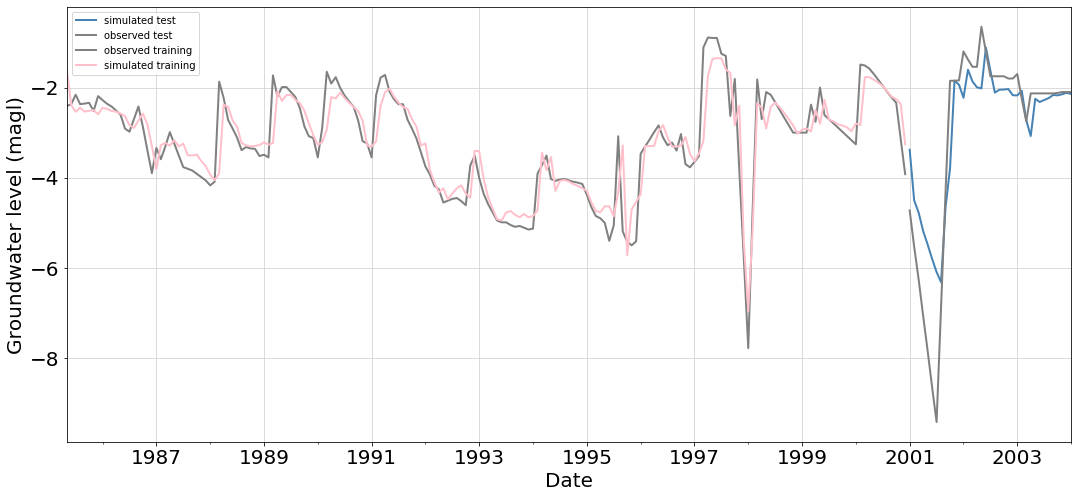

In [81]:
mse_ff = summary['mse_ff'].mean(axis=0)
rmse_ff= summary['rmse_ff'].mean(axis=0)
mae_ff = summary['mae_ff'].mean(axis=0)
r2_ff  = summary['r2_ff'].mean(axis=0)
stdv_ff= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[188:225].index)
df1['observed test']      = pima.iloc[188:225, 0].values

df2 = pd.DataFrame(pima.iloc[0:188, 0].values, columns = ['observed training'],index =pima.iloc[0:188].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [82]:
y_ff = out_df['simulated test']

## Static Models

In [83]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0687']]

In [84]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['D4N0687'].values
y = y.reshape(-1,1)

In [85]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(188, 6) (188, 1)
(37, 6) (37, 1)


In [86]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [87]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(188, 6)
Running fold 2
(188, 6)
Running fold 3
(188, 6)
Running fold 4
(188, 6)
Running fold 5
(188, 6)
Running fold 6
(188, 6)
Running fold 7
(188, 6)
Running fold 8
(188, 6)
Running fold 9
(188, 6)
Running fold 10
(188, 6)


In [88]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   2.320    1.523  0.552   1.026
1   Iteration_2   2.539    1.593  0.510   1.088
2   Iteration_3   2.483    1.576  0.521   1.086
3   Iteration_4   2.389    1.546  0.539   1.063
4   Iteration_5   2.320    1.523  0.552   1.040
5   Iteration_6   2.683    1.638  0.482   1.148
6   Iteration_7   2.675    1.636  0.483   1.142
7   Iteration_8   2.570    1.603  0.504   1.128
8   Iteration_9   2.427    1.558  0.531   1.067
9  Iteration_10   1.834    1.354  0.646   0.952

In [89]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:188, 6].values

In [90]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  0.532
Mean squared error is: 2.424
Root mean squared error is: 1.555
Mean absolute error is: 1.074


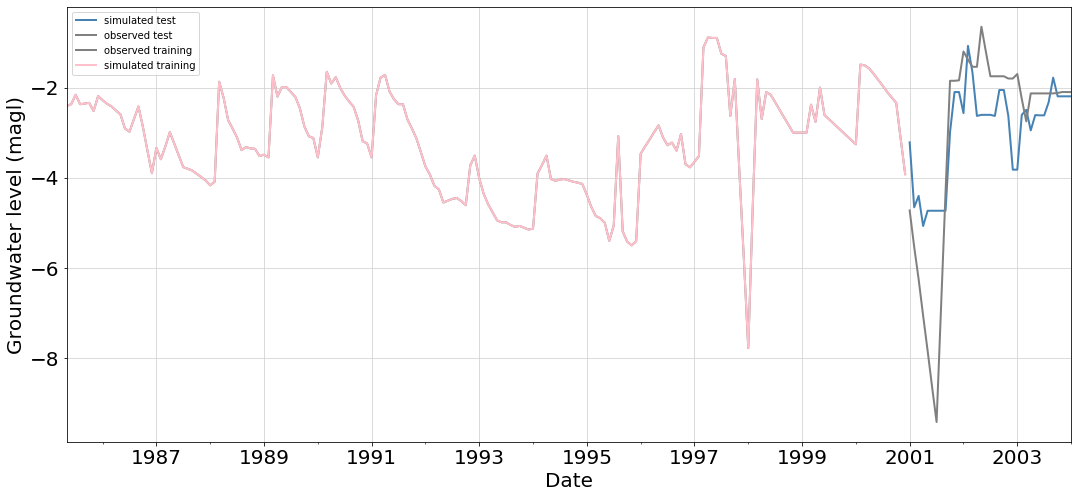

In [91]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[188:225].index)
df1['observed test']      = pima.iloc[188:225, 0].values

df2 = pd.DataFrame(pima.iloc[0:188, 0].values, columns = ['observed training'],index =pima.iloc[0:188].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [92]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(188, 6)
Running fold 2
(188, 6)
Running fold 3
(188, 6)
Running fold 4
(188, 6)
Running fold 5
(188, 6)
Running fold 6
(188, 6)
Running fold 7
(188, 6)
Running fold 8
(188, 6)
Running fold 9
(188, 6)
Running fold 10
(188, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [93]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1    2.561       1.6   0.506    0.853
1   Iteration_2    2.561       1.6   0.506    0.853
2   Iteration_3    2.561       1.6   0.506    0.853
3   Iteration_4    2.561       1.6   0.506    0.853
4   Iteration_5    2.561       1.6   0.506    0.853
5   Iteration_6    2.561       1.6   0.506    0.853
6   Iteration_7    2.561       1.6   0.506    0.853
7   Iteration_8    2.561       1.6   0.506    0.853
8   Iteration_9    2.561       1.6   0.506    0.853
9  Iteration_10    2.561       1.6   0.506    0.853

In [94]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:188, 6].values

In [95]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.301
Root mean squared error is: 0.549
Mean absolute error is: 0.301
R^2 score is:  0.758

The model performance for the test set
--------------------------------------
R^2 score is:  0.506
Mean squared error is: 2.561
Root mean squared error is: 1.6
Mean absolute error is: 0.853


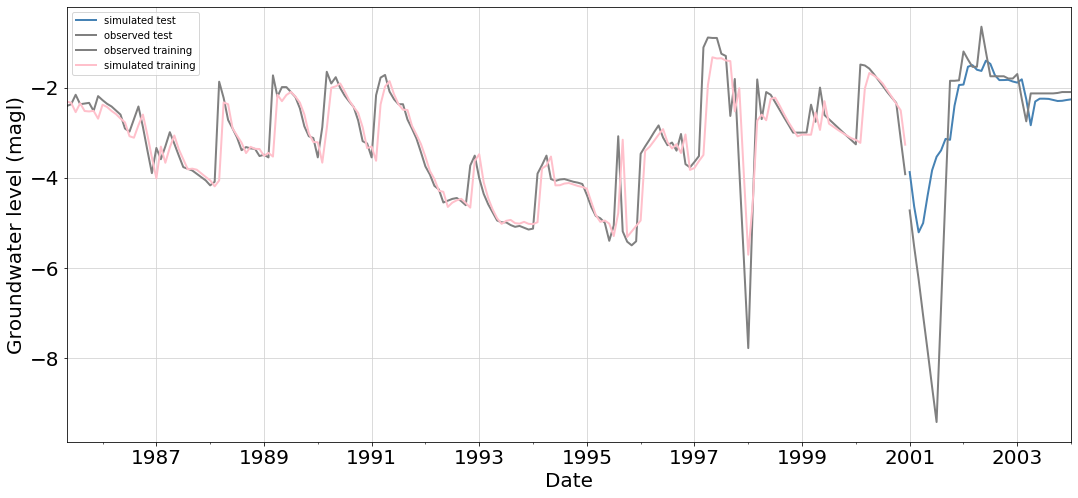

In [96]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[188:225].index)
df1['observed test']      = pima.iloc[188:225, 0].values

df2 = pd.DataFrame(pima.iloc[0:188, 0].values, columns = ['observed training'],index =pima.iloc[0:188].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(188, 6)
Running fold 2
(188, 6)
Running fold 3
(188, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 4
(188, 6)
Running fold 5
(188, 6)
Running fold 6
(188, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 7
(188, 6)
Running fold 8
(188, 6)
Running fold 9
(188, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 10
(188, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [98]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   2.997    1.731  0.421   1.025
1   Iteration_2   2.973    1.724  0.426   1.016
2   Iteration_3   3.099    1.760  0.402   1.044
3   Iteration_4   3.286    1.813  0.365   1.064
4   Iteration_5   3.030    1.741  0.415   1.027
5   Iteration_6   3.157    1.777  0.390   1.039
6   Iteration_7   3.168    1.780  0.388   1.062
7   Iteration_8   3.326    1.824  0.358   1.075
8   Iteration_9   3.081    1.755  0.405   1.035
9  Iteration_10   3.383    1.839  0.347   1.088

In [99]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:188, 6].values

In [100]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.028
Root mean squared error is: 0.167
Mean absolute error is: 0.119
R^2 score is:  0.978

The model performance for the test set
--------------------------------------
R^2 score is:  0.392
Mean squared error is: 3.15
Root mean squared error is: 1.774
Mean absolute error is: 1.048


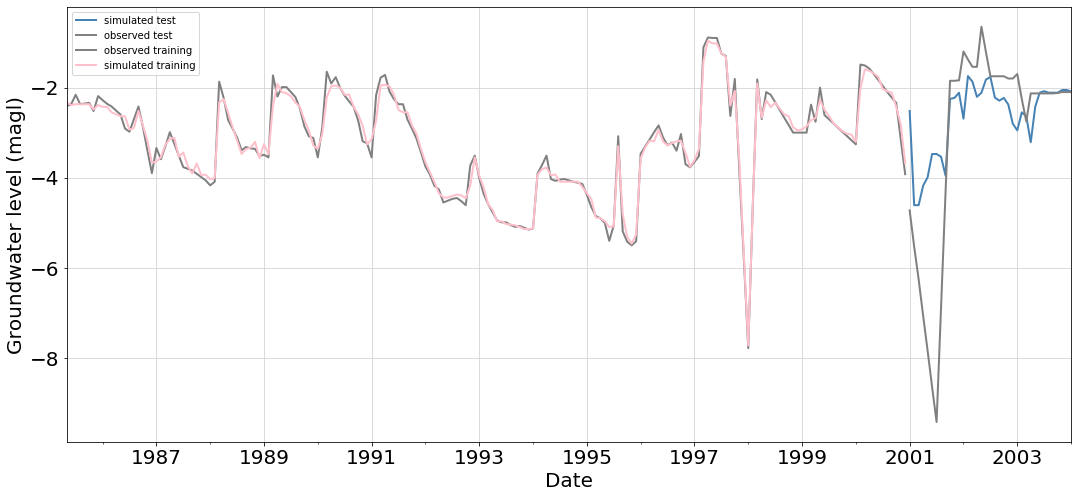

In [101]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[188:225].index)
df1['observed test']      = pima.iloc[188:225, 0].values

df2 = pd.DataFrame(pima.iloc[0:188, 0].values, columns = ['observed training'],index =pima.iloc[0:188].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [102]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(188, 6)
Running fold 2
(188, 6)
Running fold 3
(188, 6)
Running fold 4
(188, 6)
Running fold 5
(188, 6)
Running fold 6
(188, 6)
Running fold 7
(188, 6)
Running fold 8
(188, 6)
Running fold 9
(188, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

Running fold 10
(188, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [103]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   2.132    1.460  0.588   0.900
1   Iteration_2   2.255    1.502  0.565   0.917
2   Iteration_3   2.677    1.636  0.483   0.921
3   Iteration_4   1.984    1.409  0.617   0.930
4   Iteration_5   1.777    1.333  0.657   0.774
5   Iteration_6   2.174    1.474  0.580   0.888
6   Iteration_7   1.704    1.305  0.671   0.834
7   Iteration_8   2.792    1.671  0.461   1.062
8   Iteration_9   2.366    1.538  0.543   0.900
9  Iteration_10   1.991    1.411  0.616   0.882

In [104]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:188, 6].values

In [105]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.028
Root mean squared error is: 0.167
Mean absolute error is: 0.119
R^2 score is:  0.978

The model performance for the test set
--------------------------------------
R^2 score is:  0.578
Mean squared error is: 2.185
Root mean squared error is: 1.474
Mean absolute error is: 0.901


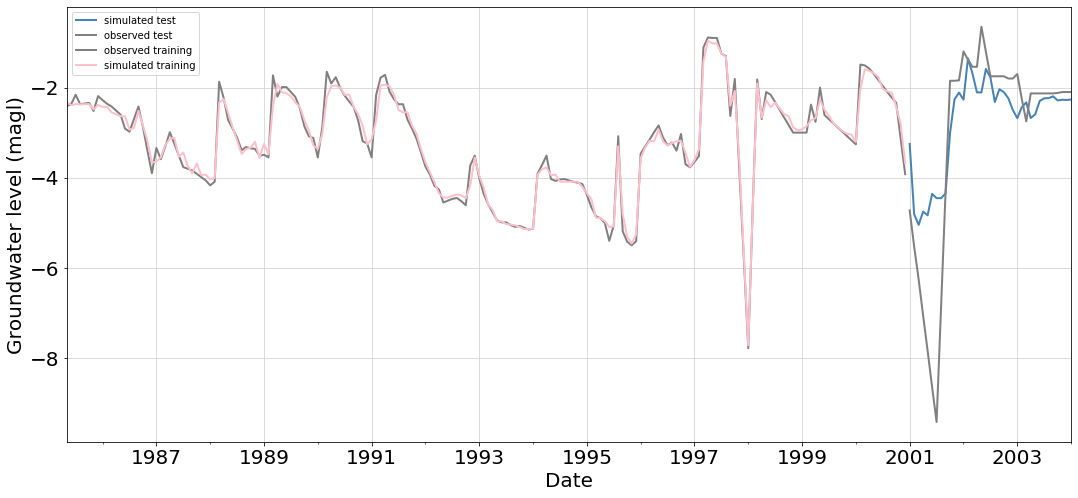

In [106]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[188:225].index)
df1['observed test']      = pima.iloc[188:225, 0].values

df2 = pd.DataFrame(pima.iloc[0:188, 0].values, columns = ['observed training'],index =pima.iloc[0:188].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [107]:
vs = pd.DataFrame(pima.iloc[188:225, 0].values, columns = ['Observed'],index =pima.iloc[188:225].index)
vs['SVR'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru
vs['FFNN'] = y_ff

Text(0, 0.5, 'Groundwater levels (magl)')

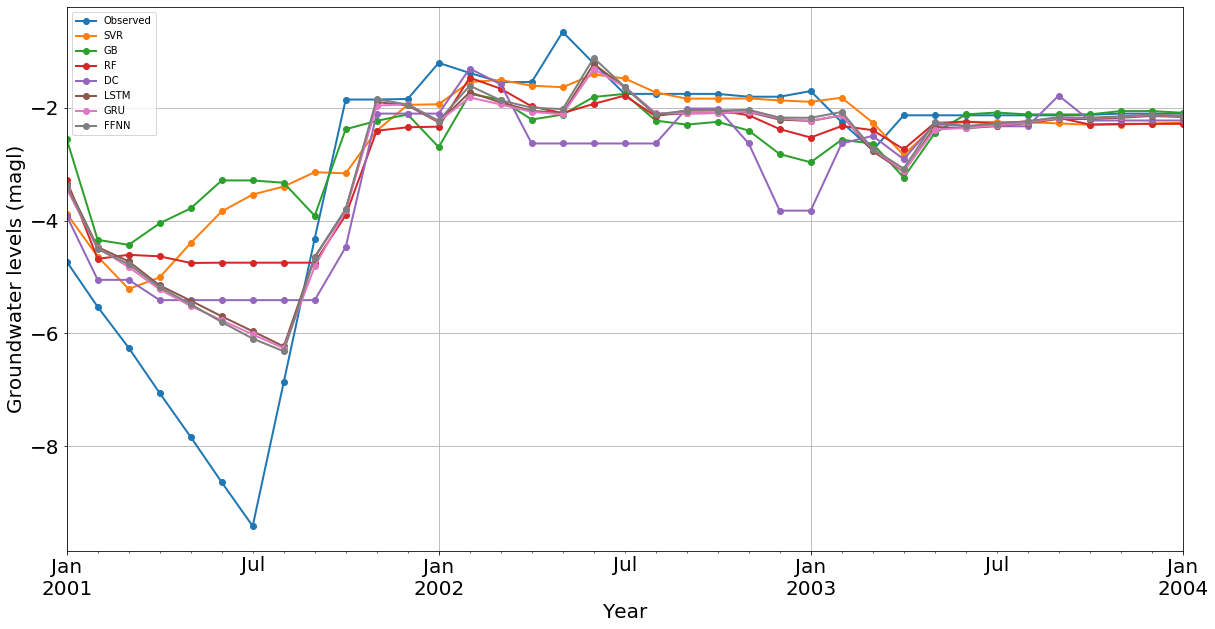

In [108]:
vs.plot(figsize=(20,10), linewidth=2, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)